# Dataset Preparation

**Imports**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
# File Paths
mass_train_path = "/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv"
mass_test_path = "/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv"
calc_train_path = "/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv"
calc_test_path = "/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_test_set.csv"

dicom_info_path = "/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv"
meta_path = "/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/meta.csv"

## General Info on Datasets

### **Focus on Meta and Dicom Datasets**

In [4]:
# Read the CSV file into a DataFrame
df_meta = pd.read_csv(meta_path)

# Display the DataFrame
df_meta.head(10)

SeriesInstanceUID  \
0  1.3.6.1.4.1.9590.100.1.2.117041576511324414842...   
1  1.3.6.1.4.1.9590.100.1.2.438738396107617880132...   
2  1.3.6.1.4.1.9590.100.1.2.767416741131676463382...   
3  1.3.6.1.4.1.9590.100.1.2.296931352612305599800...   
4  1.3.6.1.4.1.9590.100.1.2.436657670120353100077...   
5  1.3.6.1.4.1.9590.100.1.2.245633900110007082034...   
6  1.3.6.1.4.1.9590.100.1.2.451316277131445824242...   
7  1.3.6.1.4.1.9590.100.1.2.321062807811123845106...   
8  1.3.6.1.4.1.9590.100.1.2.203989029910964209440...   
9  1.3.6.1.4.1.9590.100.1.2.593316452127229649195...   

                                    StudyInstanceUID Modality  \
0  1.3.6.1.4.1.9590.100.1.2.229361142710768138411...       MG   
1  1.3.6.1.4.1.9590.100.1.2.195593486612988388325...       MG   
2  1.3.6.1.4.1.9590.100.1.2.257901172612530623323...       MG   
3  1.3.6.1.4.1.9590.100.1.2.109468616710242115222...       MG   
4  1.3.6.1.4.1.9590.100.1.2.380627129513562450304...       MG   
5  1.3.6.1.4.1.9590.100.1.2.143790815011189157220...       MG   
6  1.3.6.1.4.1.9590.100.1.2.310228111811303452111...       MG   
7  1.3.6.1.4.1.9590.100.1.2.195655760513031195523...       MG   
8  1.3.6.1.4.1.9590.100.1.2.222512969612930058132...       MG   
9  1.3.6.1.4.1.9590.100.1.2.407538725111828839342...       MG   

  SeriesDescription BodyPartExamined  SeriesNumber Collection  Visibility  \
0   ROI mask images           BREAST             1  CBIS-DDSM           1   
1   ROI mask images           BREAST             1  CBIS-DDSM           1   
2   ROI mask images           BREAST             1  CBIS-DDSM           1   
3   ROI mask images           BREAST             1  CBIS-DDSM           1   
4   ROI mask images           BREAST             1  CBIS-DDSM           1   
5   ROI mask images           BREAST             1  CBIS-DDSM           1   
6   ROI mask images           BREAST             1  CBIS-DDSM           1   
7    cropped images           BREAST             1  CBIS-DDSM           1   
8   ROI mask images           BREAST             1  CBIS-DDSM           1   
9   ROI mask images           BREAST             1  CBIS-DDSM           1   

   ImageCount  
0           2  
1           2  
2           2  
3           2  
4           2  
5           2  
6           2  
7           1  
8           1  
9           2

In [5]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SeriesInstanceUID  6775 non-null   object
 1   StudyInstanceUID   6775 non-null   object
 2   Modality           6775 non-null   object
 3   SeriesDescription  6775 non-null   object
 4   BodyPartExamined   6775 non-null   object
 5   SeriesNumber       6775 non-null   int64 
 6   Collection         6775 non-null   object
 7   Visibility         6775 non-null   int64 
 8   ImageCount         6775 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 476.5+ KB


**Meta Fields Description**

| **Field Name**          | **Description**                                                                                                 |
|--------------------------|---------------------------------------------------------------------------------------------------------------|
| `SeriesInstanceUID`      | A unique identifier for the image series within a study. Each series corresponds to a set of related images, such as a mammogram captured from the same angle or technique. |
| `StudyInstanceUID`       | A unique identifier for the study or examination. Each study may contain multiple series (e.g., different views or sequences of the mammography). |
| `Modality`               | Specifies the imaging modality or type of equipment used to acquire the images (e.g., "MG" for mammography). |
| `SeriesDescription`      | A textual description of the series, typically indicating the type of images in the series (e.g., "CC" for craniocaudal view, "MLO" for mediolateral oblique view). |
| `BodyPartExamined`       | Specifies the part of the body that was imaged. For mammography datasets, this is typically "BREAST." |
| `SeriesNumber`           | An integer indicating the order of the series within the study. For example, different imaging views or techniques may be labeled with sequential numbers. |
| `Collection`             | Indicates the collection or source of the data (e.g., the institution or database contributing the dataset). |
| `Visibility`             | Likely indicates whether the series is visible or included in the dataset for analysis. A binary or integer flag where 1 may indicate "visible" and 0 "not visible." |
| `ImageCount`             | The number of images in the series. For mammography, this could include both the full-field images and cropped regions of interest. |

In [6]:
df_meta.nunique()

# SeriesInstanceUID  and StudyInstanceUID can be both primary keys for merging

SeriesInstanceUID    6775
StudyInstanceUID     6775
Modality                1
SeriesDescription       3
BodyPartExamined        1
SeriesNumber            1
Collection              1
Visibility              1
ImageCount              2
dtype: int64

In [7]:
df_meta = df_meta.loc[:, df_meta.nunique() > 1]
# No need to keep columns where no info is provided

# Just to keep the info in mind
# All modality are mammography
# SeriesNumber and Visibility just display 1
# Collection is the df itself CBIS-DDSM, if we need to merge diff one we'll make this feature by urself

In [8]:
# Read the CSV file into a DataFrame
df_dicom = pd.read_csv(dicom_info_path)

# Display the DataFrame
df_dicom.head(10)

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
5  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...   
6  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...   
7  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...   
8  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...   
9  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
5  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...              NaN   
6  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...              NaN   
7  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...              NaN   
8  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...              NaN   
9  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   
5              8           8           BREAST     1981     20160503   
6             16          16           BREAST      393     20160503   
7             16          16           BREAST      611     20160503   
8              8           8           BREAST     3571     20160503   
9              8           8           BREAST     2371     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   
5   111620.055            WSD  ...   
6   111620.055            WSD  ...   
7   122938.838            WSD  ...   
8   122938.838            WSD  ...   
9   131321.302            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   
5                                       MATLAB        ROI mask images   
6                                       MATLAB         cropped images   
7                                       MATLAB         cropped images   
8                                       MATLAB        ROI mask images   
9                                       MATLAB        ROI mask images   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
5  1.3.6.1.4.1.9590.100.1.2.153339052913121382622...            1   
6  1.3.6.1.4.1.9590.100.1.2.153339052913121382622...            1   
7  1.3.6.1.4.1.9590.100.1.2.178994714611485132105...            1

In [9]:
df_dicom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

**Dicom Fields Description**

| **Field Name**                                | **Description**                                                                                             |
|-----------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| `file_path`                                   | The file path to the original image file on the system.                                                     |
| `image_path`                                  | Likely a path to a processed or standardized version of the image.                                          |
| `AccessionNumber`                             | Unique identifier for a patient's study in a hospital's radiology system. All values are missing.           |
| `BitsAllocated`                               | The number of bits allocated per pixel in the image (e.g., 8 or 16). Indicates the image's bit depth.       |
| `BitsStored`                                  | The number of bits actually used to store pixel values. Typically less than or equal to `BitsAllocated`.    |
| `BodyPartExamined`                            | The part of the body being imaged (e.g., "BREAST").                                                         |
| `Columns`                                     | The number of columns (width) in the image matrix.                                                          |
| `ContentDate`                                 | The date the image was created or processed.                                                                |
| `ContentTime`                                 | The time the image was created or processed.                                                                |
| `ConversionType`                              | Describes the type of conversion applied to the image (e.g., "SYN" for synthetic images).                   |
| `HighBit`                                     | The highest bit position used for storing pixel data (zero-indexed).                                        |
| `InstanceNumber`                              | A sequential number identifying the instance (e.g., the image) within the series.                           |
| `LargestImagePixelValue`                      | The maximum pixel intensity value in the image.                                                             |
| `Laterality`                                  | Specifies the side of the body imaged (e.g., "L" for left, "R" for right). Some values are missing.          |
| `Modality`                                    | The imaging modality used (e.g., "MG" for mammography).                                                     |
| `PatientBirthDate`                            | The patient's birth date. All values are missing.                                                           |
| `PatientID`                                   | A unique identifier for the patient.                                                                        |
| `PatientName`                                 | A unique identifier for anonymized patient data (not actual names).                                         |
| `PatientOrientation`                          | Specifies the patient's orientation relative to the imaging device (e.g., "HFS" for head-first supine).     |
| `PatientSex`                                  | The patient's sex. All values are missing.                                                                  |
| `PhotometricInterpretation`                   | Describes how pixel data should be interpreted (e.g., "MONOCHROME2" for grayscale images).                  |
| `PixelRepresentation`                         | Specifies whether pixel values are signed or unsigned integers (0: unsigned, 1: signed).                    |
| `ReferringPhysicianName`                      | The name of the referring physician. All values are missing.                                                |
| `Rows`                                        | The number of rows (height) in the image matrix.                                                            |
| `SOPClassUID`                                 | A unique identifier for the type of DICOM object (e.g., images, reports).                                   |
| `SOPInstanceUID`                              | A unique identifier for this specific image instance in the DICOM standard.                                 |
| `SamplesPerPixel`                             | The number of samples per pixel. Typically, 1 for grayscale images.                                         |
| `SecondaryCaptureDeviceManufacturer`          | Manufacturer of the device used for secondary image capture.                                                |
| `SecondaryCaptureDeviceManufacturerModelName` | Model name of the secondary capture device.                                                                 |
| `SeriesDescription`                           | A textual description of the image series. Some values are missing.                                         |
| `SeriesInstanceUID`                           | Already seen (redundant field).                                                                             |
| `SeriesNumber`                                | A number indicating the position of the series in the study.                                                |
| `SmallestImagePixelValue`                     | The minimum pixel intensity value in the image.                                                             |
| `SpecificCharacterSet`                        | Specifies the character encoding used (e.g., "ISO_IR 100" for Latin alphabet).                              |
| `StudyDate`                                   | The date when the study was performed. Some values are missing.                                             |
| `StudyID`                                     | A unique identifier for the study.                                                                          |
| `StudyInstanceUID`                            | Already seen (redundant field).                                                                             |
| `StudyTime`                                   | The time when the study was performed. Some values are missing.                                             |

In [10]:
df_dicom.nunique()

file_path                                      10237
image_path                                     10237
AccessionNumber                                    0
BitsAllocated                                      2
BitsStored                                         2
BodyPartExamined                                   3
Columns                                         1208
ContentDate                                        5
ContentTime                                     6774
ConversionType                                     1
HighBit                                            2
InstanceNumber                                     1
LargestImagePixelValue                           235
Laterality                                         2
Modality                                           1
PatientBirthDate                                   0
PatientID                                       6990
PatientName                                     6575
PatientOrientation                            

In [11]:
df_dicom = df_dicom.loc[:, df_dicom.nunique() > 1]
# AccessionNumber, PatientBirthDate, PatientSex, ReferringPhysicianName are Missing
# We also removed value = 1 that doesn't provide us any information

# There are a few more that may be deleted but can be usefull later, we'll see

# PatientID can't be used as a primary key (multiple images are associated with many patients, indicating repeated studies)
# SOPInstanceUID may be PK

In [12]:
missing_dicom = df_dicom.isnull().sum()
missing_dicom

file_path                               0
image_path                              0
BitsAllocated                           0
BitsStored                              0
BodyPartExamined                        0
Columns                                 0
ContentDate                             0
ContentTime                             0
HighBit                                 0
LargestImagePixelValue                  0
Laterality                            566
PatientID                               0
PatientName                             0
PatientOrientation                      0
Rows                                    0
SOPInstanceUID                          0
SecondaryCaptureDeviceManufacturer      0
SeriesDescription                     566
SeriesInstanceUID                       0
SmallestImagePixelValue                 0
StudyDate                             566
StudyInstanceUID                        0
StudyTime                             566
dtype: int64

In [13]:
# They are complitely different values, there is no common values
study_in_sop_count = df_meta['StudyInstanceUID'].isin(df_dicom['SOPInstanceUID']).sum()
series_in_sop_count = df_meta['SeriesInstanceUID'].isin(df_dicom['SOPInstanceUID']).sum()

study_in_sop_count, series_in_sop_count

# SOPInstanceUID as well can't be used in any scenario

(0, 0)

In [14]:
df_dicom = df_dicom.drop(columns=['SOPInstanceUID'])

# We can just drop it

In [15]:
study_in_study2_count = df_meta['StudyInstanceUID'].isin(df_dicom['StudyInstanceUID']).sum()
series_in_series2_count = df_meta['SeriesInstanceUID'].isin(df_dicom['SeriesInstanceUID']).sum()

study_in_study2_count, series_in_series2_count

(6774, 6774)

In [16]:
meta_duplicates = df_meta['StudyInstanceUID'].duplicated().sum()
dicom_duplicates = df_dicom['StudyInstanceUID'].duplicated().sum()

print("Duplicates in df_meta['StudyInstanceUID']:", meta_duplicates)
print("Duplicates in df_dicom['StudyInstanceUID']:", dicom_duplicates)

Duplicates in df_meta['StudyInstanceUID']: 0
Duplicates in df_dicom['StudyInstanceUID']: 3463


**Sources**:
- DICOM: What's the point of SOPInstanceUID tag?: https://stackoverflow.com/questions/1434918/dicom-whats-the-point-of-sopinstanceuid-tag

According to this source StudyInstanceUID can be used as Primary Key.

In [17]:
# Perform the merge with df_dicom_deduplicated as the left DataFrame
merged_meta_dicom = df_dicom.merge(
    df_meta,
    on='StudyInstanceUID',
    how='outer'
    #,indicator=True
)

duplicate_columns = ['SeriesDescription_x', 'SeriesInstanceUID_x', 'SeriesDescription_y', 'SeriesInstanceUID_y']

merged_meta_dicom['SeriesDescription'] = merged_meta_dicom['SeriesDescription_x'].combine_first(merged_meta_dicom['SeriesDescription_y'])
merged_meta_dicom['SeriesInstanceUID'] = merged_meta_dicom['SeriesInstanceUID_x'].combine_first(merged_meta_dicom['SeriesInstanceUID_y'])

merged_meta_dicom.drop(columns=duplicate_columns, inplace=True, errors='ignore')

print(f"Shape of merged_meta_dicom: {merged_meta_dicom.shape}")
#print(merged_meta_dicom['_merge'].value_counts())
merged_meta_dicom.head()


Shape of merged_meta_dicom: (10238, 23)


file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12202...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12202...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26853...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.23869...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.23869...   

                                          image_path  BitsAllocated  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.122021...            8.0   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.122021...           16.0   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.268533...           16.0   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.238692...            8.0   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.238692...           16.0   

   BitsStored BodyPartExamined  Columns  ContentDate  ContentTime  HighBit  \
0         8.0     Right Breast   4088.0   20160503.0   124241.143      7.0   
1        16.0           BREAST    233.0   20160503.0   124241.143     15.0   
2        16.0           BREAST   2011.0   20160503.0   125015.878     15.0   
3         8.0           BREAST   4064.0   20160426.0   130134.962      7.0   
4        16.0           BREAST    258.0   20160426.0   130134.962     15.0   

   LargestImagePixelValue  ... PatientOrientation    Rows  \
0                   255.0  ...                MLO  5816.0   
1                 65535.0  ...                MLO   241.0   
2                 65535.0  ...                 CC  4501.0   
3                   255.0  ...                 CC  5776.0   
4                 65535.0  ...                 CC   274.0   

  SecondaryCaptureDeviceManufacturer SmallestImagePixelValue   StudyDate  \
0                          MathWorks                     0.0         NaN   
1                          MathWorks                 42965.0  20170829.0   
2                          MathWorks                     0.0  20160807.0   
3                          MathWorks                     0.0  20160721.0   
4                          MathWorks                 33051.0  20160720.0   

                                    StudyInstanceUID  StudyTime  ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.100052171312354035019...        NaN           2   
1  1.3.6.1.4.1.9590.100.1.2.100052171312354035019...   180126.0           2   
2  1.3.6.1.4.1.9590.100.1.2.100079897611795347840...   165852.0           1   
3  1.3.6.1.4.1.9590.100.1.2.100098988611658610916...    85806.0           2   
4  1.3.6.1.4.1.9590.100.1.2.100098988611658610916...   214934.0           2   

       SeriesDescription                                  SeriesInstanceUID  
0        ROI mask images  1.3.6.1.4.1.9590.100.1.2.122021886313853636738...  
1         cropped images  1.3.6.1.4.1.9590.100.1.2.122021886313853636738...  
2  full mammogram images  1.3.6.1.4.1.9590.100.1.2.268533536011607229841...  
3        ROI mask images  1.3.6.1.4.1.9590.100.1.2.238692425413084528531...  
4         cropped images  1.3.6.1.4.1.9590.100.1.2.238692425413084528531...  

[5 rows x 23 columns]

In [18]:
merged_meta_dicom.columns

Index(['file_path', 'image_path', 'BitsAllocated', 'BitsStored',
       'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime', 'HighBit',
       'LargestImagePixelValue', 'Laterality', 'PatientID', 'PatientName',
       'PatientOrientation', 'Rows', 'SecondaryCaptureDeviceManufacturer',
       'SmallestImagePixelValue', 'StudyDate', 'StudyInstanceUID', 'StudyTime',
       'ImageCount', 'SeriesDescription', 'SeriesInstanceUID'],
      dtype='object')

In [19]:
missing_merged = merged_meta_dicom.isnull().sum()
missing_merged

# it keeps the same missing + one row not allocated maybe, if needed we'll deal with it later

file_path                               1
image_path                              1
BitsAllocated                           1
BitsStored                              1
BodyPartExamined                        1
Columns                                 1
ContentDate                             1
ContentTime                             1
HighBit                                 1
LargestImagePixelValue                  1
Laterality                            567
PatientID                               1
PatientName                             1
PatientOrientation                      1
Rows                                    1
SecondaryCaptureDeviceManufacturer      1
SmallestImagePixelValue                 1
StudyDate                             567
StudyInstanceUID                        0
StudyTime                             567
ImageCount                              0
SeriesDescription                       0
SeriesInstanceUID                       0
dtype: int64

### **Focus on Mass and Calc Dataset**

In [20]:
# Read the CSV file into a DataFrame
df_mass_train = pd.read_csv(mass_train_path)

# Display the DataFrame
df_mass_train.head(10)

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   
5    P_00009               3                RIGHT         CC               1   
6    P_00009               3                RIGHT        MLO               1   
7    P_00015               3                 LEFT        MLO               1   
8    P_00018               2                RIGHT         CC               1   
9    P_00018               2                RIGHT        MLO               1   

  abnormality type                          mass shape  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   
2             mass            ARCHITECTURAL_DISTORTION   
3             mass            ARCHITECTURAL_DISTORTION   
4             mass                                OVAL   
5             mass                                OVAL   
6             mass                                OVAL   
7             mass                           IRREGULAR   
8             mass                                OVAL   
9             mass                                OVAL   

             mass margins  assessment  pathology  subtlety  \
0              SPICULATED           4  MALIGNANT         4   
1              SPICULATED           4  MALIGNANT         4   
2             ILL_DEFINED           4     BENIGN         3   
3             ILL_DEFINED           4     BENIGN         3   
4           CIRCUMSCRIBED           4     BENIGN         5   
5             ILL_DEFINED           4  MALIGNANT         4   
6             ILL_DEFINED           4  MALIGNANT         4   
7  ILL_DEFINED-SPICULATED           4  MALIGNANT         4   
8           CIRCUMSCRIBED           4     BENIGN         5   
9           CIRCUMSCRIBED           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   
5  Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.959...   
6  Mass-Training_P_00009_RIGHT_MLO/1.3.6.1.4.1.95...   
7  Mass-Training_P_00015_LEFT_MLO/1.3.6.1.4.1.959...   
8  Mass-Training_P_00018_RIGHT_CC/1.3.6.1.4.1.959...   
9  Mass-Training_P_00018_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   
5  Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...   
6  Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....   
7  Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...   
8  Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...   
9  Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....  
5  Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...  
6  Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....  
7  Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...  
8  Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...  
9  Mass-Trainin

In [21]:
df_mass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

**Mass Fields Description**

| **Field Name**             | **Description**                                                                                              | **Type**       |
|-----------------------------|-------------------------------------------------------------------------------------------------------------|----------------|
| `patient_id`               | Unique identifier for each patient in the dataset. This is used to track images and abnormalities associated with a particular patient. | String         |
| `breast_density`           | A measure of breast tissue density, typically classified on a scale (e.g., 1 to 4). Higher values indicate denser breast tissue, which can make abnormalities harder to detect. | Integer/Float  |
| `left or right breast`     | Indicates which breast the image corresponds to: "left" or "right."                                         | String         |
| `image view`               | Specifies the imaging view, such as "CC" (craniocaudal) or "MLO" (mediolateral oblique), representing different angles of mammographic imaging. | String         |
| `abnormality id`           | A unique identifier for each abnormality in the dataset. A patient may have multiple abnormalities, each with a distinct ID. | String/Integer |
| `abnormality type`         | The type of abnormality detected in the mammogram, such as "mass," "calcification," or other pathology types. | String         |
| `mass shape`               | Describes the shape of the detected mass (e.g., "oval," "round," "irregular"). Indicates characteristics of the abnormality. | String         |
| `mass margins`             | Describes the margins of the mass (e.g., "circumscribed," "spiculated," "ill-defined"). Margin features are important for determining malignancy. | String         |
| `assessment`               | A score reflecting the radiologist's confidence in the diagnosis. Often linked to BI-RADS categories, ranging from benign to highly suspicious. | Integer/Float  |
| `pathology`                | The confirmed pathology of the abnormality, such as "benign" or "malignant." This is the ground truth label. | String         |
| `subtlety`                 | A rating of how difficult the abnormality is to detect on the mammogram, usually on a scale (e.g., 1 for obvious, 5 for subtle). | Integer        |
| `image file path`          | The file path to the full mammogram image corresponding to the record.                                       | String         |
| `cropped image file path`  | The file path to a cropped version of the mammogram, focusing on the region of interest (ROI) where the abnormality is located. | String         |
| `ROI mask file path`       | The file path to the mask image representing the exact location of the abnormality. Used for segmentation tasks. | String         |
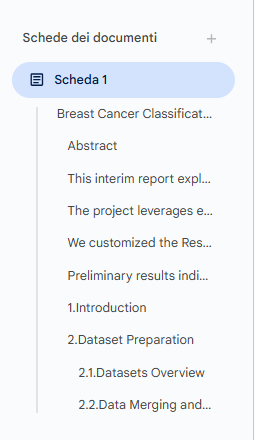

In [22]:
df_mass_train.nunique()

patient_id                  691
breast_density                4
left or right breast          2
image view                    2
abnormality id                6
abnormality type              1
mass shape                   18
mass margins                 15
assessment                    6
pathology                     3
subtlety                      6
image file path            1231
cropped image file path    1318
ROI mask file path         1318
dtype: int64

In [23]:
df_mass_train = df_mass_train.loc[:, df_mass_train.nunique() > 1]
# it just remove abnormality type

# image file path is not unique

In [24]:
cropped_path =  df_mass_train['cropped image file path'].iloc[0]
#'Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000000.dcm'
extracted_uid = cropped_path.split('/')[2] 

is_study = extracted_uid in df_meta['StudyInstanceUID'].values
is_series = extracted_uid in df_meta['SeriesInstanceUID'].values

print("Extracted UID:", extracted_uid)
print("Is StudyInstanceUID:", is_study)
print("Is SeriesInstanceUID:", is_series)


Extracted UID: 1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650
Is StudyInstanceUID: False
Is SeriesInstanceUID: True


In [25]:
def calculate_overlap(df, meta_dicom, path_column, uid_column, meta_uid_column):
    """
    Calculates the overlap between a UID extracted from a specified column in df_test
    and the UIDs present in meta_dicom.
    """
    # Extract SeriesInstanceUID from the file path
    df_test[uid_column] = df_test[path_column].apply(
        lambda x: x.split('/')[2] if isinstance(x, str) else None
    )
    
    # Calculate overlap
    overlap_count = df_test[uid_column].isin(meta_dicom[meta_uid_column]).sum()
    
    return overlap_count

In [26]:
meta_uid_column = 'SeriesInstanceUID'
path_column_cropped = 'cropped image file path'
uid_column_cropped = 'SeriesInstanceUID_cropped'
path_column_roi = 'ROI mask file path'
uid_column_roi = 'SeriesInstanceUID_ROI'
path_column_img = 'image file path'
uid_column_img = 'SeriesInstanceUID_img'

#overlap_cropped = calculate_overlap(df_mass_train, merged_meta_dicom, path_column, uid_column, meta_uid_column)
#print(overlap_cropped)

In [27]:
df_mass_train['SeriesInstanceUID_cropped'] = df_mass_train['cropped image file path'].apply(
    lambda x: x.split('/')[2] if isinstance(x, str) else None
)

overlap_cropped = df_mass_train['SeriesInstanceUID_cropped'].isin(merged_meta_dicom['SeriesInstanceUID']).sum()

# df_mass_train[['cropped image file path', 'SeriesInstanceUID_cropped']].head()
print(overlap_cropped)

1318


In [28]:
path_column = 'cropped image file path'
uid_column_roi = 'SeriesInstanceUID_ROI'
meta_uid_column = 'SeriesInstanceUID'

#overlap_cropped = calculate_overlap(df_mass_train, merged_meta_dicom, path_column, uid_column, meta_uid_column)

#print(overlap_cropped)

In [29]:
df_mass_train['SeriesInstanceUID_ROI'] = df_mass_train['ROI mask file path'].apply(
    lambda x: x.split('/')[2] if isinstance(x, str) else None
)

overlap_ROI = df_mass_train['SeriesInstanceUID_ROI'].isin(merged_meta_dicom['SeriesInstanceUID']).sum()

# df_mass_train[['ROI mask file path', 'SeriesInstanceUID_ROI']].head()
print(overlap_ROI)

1318


In [30]:
df_mass_train['SeriesInstanceUID_img'] = df_mass_train['image file path'].apply(
    lambda x: x.split('/')[2] if isinstance(x, str) else None
)

overlap_img = df_mass_train['SeriesInstanceUID_img'].isin(merged_meta_dicom['SeriesInstanceUID']).sum()

# df_mass_train[['image file path', 'SeriesInstanceUID_img']].head()
print(overlap_img)

1318


In [31]:
df_mass_train[['SeriesInstanceUID_cropped', 'SeriesInstanceUID_ROI', 'SeriesInstanceUID_img']].head()

SeriesInstanceUID_cropped  \
0  1.3.6.1.4.1.9590.100.1.2.296736403313792599626...   
1  1.3.6.1.4.1.9590.100.1.2.227955274711225756835...   
2  1.3.6.1.4.1.9590.100.1.2.429120414011832984817...   
3  1.3.6.1.4.1.9590.100.1.2.115134232113001553100...   
4  1.3.6.1.4.1.9590.100.1.2.128573663126257012032...   

                               SeriesInstanceUID_ROI  \
0  1.3.6.1.4.1.9590.100.1.2.296736403313792599626...   
1  1.3.6.1.4.1.9590.100.1.2.227955274711225756835...   
2  1.3.6.1.4.1.9590.100.1.2.429120414011832984817...   
3  1.3.6.1.4.1.9590.100.1.2.115134232113001553100...   
4  1.3.6.1.4.1.9590.100.1.2.128573663126257012032...   

                               SeriesInstanceUID_img  
0  1.3.6.1.4.1.9590.100.1.2.342386194811267636608...  
1  1.3.6.1.4.1.9590.100.1.2.359308329312397897125...  
2  1.3.6.1.4.1.9590.100.1.2.891800462110225318343...  
3  1.3.6.1.4.1.9590.100.1.2.295360926313492745441...  
4  1.3.6.1.4.1.9590.100.1.2.410524754913057908920...

In [32]:
combined_series_instance_uids = pd.concat([
    df_mass_train['SeriesInstanceUID_cropped'],
    df_mass_train['SeriesInstanceUID_ROI'],
    df_mass_train['SeriesInstanceUID_img']
])
unique_series_instance_uids_count_df_mass_train = combined_series_instance_uids.nunique()

print("Total unique SeriesInstanceUID values across all columns:", unique_series_instance_uids_count_df_mass_train)

Total unique SeriesInstanceUID values across all columns: 2641


In [33]:
# Perform the merge using only 'SeriesInstanceUID_cropped' that are in 'SeriesInstanceUID'
merged_mass_meta_dicom_cropped_train = df_mass_train[df_mass_train['SeriesInstanceUID_cropped'].isin(merged_meta_dicom['SeriesInstanceUID'])].merge(
    merged_meta_dicom,
    left_on='SeriesInstanceUID_cropped',
    right_on='SeriesInstanceUID',
    how='inner'
   # ,indicator=True
)

# print(merged_mass_meta_dicom_cropped_train['_merge'].value_counts())

In [34]:
merged_mass_meta_dicom_cropped_train.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT         CC               1   
2    P_00001               3                 LEFT        MLO               1   
3    P_00001               3                 LEFT        MLO               1   
4    P_00004               3                 LEFT         CC               1   

                           mass shape mass margins  assessment  pathology  \
0  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED           4  MALIGNANT   
1  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED           4  MALIGNANT   
2  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED           4  MALIGNANT   
3  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED           4  MALIGNANT   
4            ARCHITECTURAL_DISTORTION  ILL_DEFINED           4     BENIGN   

   subtlety  ... PatientOrientation    Rows  \
0         4  ...                 CC  4808.0   
1         4  ...                 CC   515.0   
2         4  ...                MLO  4800.0   
3         4  ...                MLO   292.0   
4         3  ...                 CC  5491.0   

  SecondaryCaptureDeviceManufacturer SmallestImagePixelValue   StudyDate  \
0                          MathWorks                     0.0  20160721.0   
1                          MathWorks                 25814.0  20160720.0   
2                          MathWorks                     0.0  20160721.0   
3                          MathWorks                 37679.0  20160720.0   
4                          MathWorks                     0.0  20160721.0   

                                    StudyInstanceUID StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.108268213011361124203...   82651.0          2   
1  1.3.6.1.4.1.9590.100.1.2.108268213011361124203...  214643.0          2   
2  1.3.6.1.4.1.9590.100.1.2.188473874511440575807...   82652.0          2   
3  1.3.6.1.4.1.9590.100.1.2.188473874511440575807...  214644.0          2   
4  1.3.6.1.4.1.9590.100.1.2.414182170112396175925...   82653.0          2   

   SeriesDescription                                  SeriesInstanceUID  
0    ROI mask images  1.3.6.1.4.1.9590.100.1.2.296736403313792599626...  
1     cropped images  1.3.6.1.4.1.9590.100.1.2.296736403313792599626...  
2    ROI mask images  1.3.6.1.4.1.9590.100.1.2.227955274711225756835...  
3     cropped images  1.3.6.1.4.1.9590.100.1.2.227955274711225756835...  
4    ROI mask images  1.3.6.1.4.1.9590.100.1.2.429120414011832984817...  

[5 rows x 39 columns]

In [35]:
# Perform the merge using only 'SeriesInstanceUID_cropped' that are in 'SeriesInstanceUID'
merged_mass_meta_dicom_roi_train = df_mass_train[df_mass_train['SeriesInstanceUID_ROI'].isin(merged_meta_dicom['SeriesInstanceUID'])].merge(
    merged_meta_dicom,
    left_on='SeriesInstanceUID_ROI',
    right_on='SeriesInstanceUID',
    how='inner'
    #,indicator=True
)

#print(merged_mass_meta_dicom_roi_train['_merge'].value_counts())

In [36]:
merged_mass_meta_dicom_roi_train.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT         CC               1   
2    P_00001               3                 LEFT        MLO               1   
3    P_00001               3                 LEFT        MLO               1   
4    P_00004               3                 LEFT         CC               1   

                           mass shape mass margins  assessment  pathology  \
0  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED           4  MALIGNANT   
1  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED           4  MALIGNANT   
2  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED           4  MALIGNANT   
3  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED           4  MALIGNANT   
4            ARCHITECTURAL_DISTORTION  ILL_DEFINED           4     BENIGN   

   subtlety  ... PatientOrientation    Rows  \
0         4  ...                 CC  4808.0   
1         4  ...                 CC   515.0   
2         4  ...                MLO  4800.0   
3         4  ...                MLO   292.0   
4         3  ...                 CC  5491.0   

  SecondaryCaptureDeviceManufacturer SmallestImagePixelValue   StudyDate  \
0                          MathWorks                     0.0  20160721.0   
1                          MathWorks                 25814.0  20160720.0   
2                          MathWorks                     0.0  20160721.0   
3                          MathWorks                 37679.0  20160720.0   
4                          MathWorks                     0.0  20160721.0   

                                    StudyInstanceUID StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.108268213011361124203...   82651.0          2   
1  1.3.6.1.4.1.9590.100.1.2.108268213011361124203...  214643.0          2   
2  1.3.6.1.4.1.9590.100.1.2.188473874511440575807...   82652.0          2   
3  1.3.6.1.4.1.9590.100.1.2.188473874511440575807...  214644.0          2   
4  1.3.6.1.4.1.9590.100.1.2.414182170112396175925...   82653.0          2   

   SeriesDescription                                  SeriesInstanceUID  
0    ROI mask images  1.3.6.1.4.1.9590.100.1.2.296736403313792599626...  
1     cropped images  1.3.6.1.4.1.9590.100.1.2.296736403313792599626...  
2    ROI mask images  1.3.6.1.4.1.9590.100.1.2.227955274711225756835...  
3     cropped images  1.3.6.1.4.1.9590.100.1.2.227955274711225756835...  
4    ROI mask images  1.3.6.1.4.1.9590.100.1.2.429120414011832984817...  

[5 rows x 39 columns]

In [37]:
# Perform the merge using only 'SeriesInstanceUID_cropped' that are in 'SeriesInstanceUID'
merged_mass_meta_dicom_img_train = df_mass_train[df_mass_train['SeriesInstanceUID_img'].isin(merged_meta_dicom['SeriesInstanceUID'])].merge(
    merged_meta_dicom,
    left_on='SeriesInstanceUID_img',
    right_on='SeriesInstanceUID',
    how='inner'
   # ,indicator=True
)

# print(merged_mass_meta_dicom_img_train['_merge'].value_counts())

In [38]:
merged_mass_meta_dicom_img_train.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

                           mass shape   mass margins  assessment  pathology  \
0  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED           4  MALIGNANT   
1  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED           4  MALIGNANT   
2            ARCHITECTURAL_DISTORTION    ILL_DEFINED           4     BENIGN   
3            ARCHITECTURAL_DISTORTION    ILL_DEFINED           4     BENIGN   
4                                OVAL  CIRCUMSCRIBED           4     BENIGN   

   subtlety  ... PatientOrientation    Rows  \
0         4  ...                 CC  4808.0   
1         4  ...                MLO  4800.0   
2         3  ...                 CC  5491.0   
3         3  ...                MLO  5491.0   
4         5  ...                MLO  5491.0   

  SecondaryCaptureDeviceManufacturer SmallestImagePixelValue   StudyDate  \
0                          MathWorks                     0.0  20160720.0   
1                          MathWorks                     0.0  20160720.0   
2                          MathWorks                     0.0  20160720.0   
3                          MathWorks                     0.0  20160720.0   
4                          MathWorks                     0.0  20160720.0   

                                    StudyInstanceUID StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.422112722213189649807...  181327.0          1   
1  1.3.6.1.4.1.9590.100.1.2.319478999311971442426...  181329.0          1   
2  1.3.6.1.4.1.9590.100.1.2.347107867812656628709...  181330.0          1   
3  1.3.6.1.4.1.9590.100.1.2.272600286511817402806...  181332.0          1   
4  1.3.6.1.4.1.9590.100.1.2.174047308712169195014...  181336.0          1   

       SeriesDescription                                  SeriesInstanceUID  
0  full mammogram images  1.3.6.1.4.1.9590.100.1.2.342386194811267636608...  
1  full mammogram images  1.3.6.1.4.1.9590.100.1.2.359308329312397897125...  
2  full mammogram images  1.3.6.1.4.1.9590.100.1.2.891800462110225318343...  
3  full mammogram images  1.3.6.1.4.1.9590.100.1.2.295360926313492745441...  
4  full mammogram images  1.3.6.1.4.1.9590.100.1.2.410524754913057908920...  

[5 rows x 39 columns]

In [39]:
merged_mass_meta_dicom_all_train = pd.concat(
    [merged_mass_meta_dicom_cropped_train, merged_mass_meta_dicom_img_train, merged_mass_meta_dicom_roi_train],
    axis=0,
    ignore_index=True
)

merged_mass_meta_dicom_all_train = merged_mass_meta_dicom_all_train.drop(
    columns=['SeriesInstanceUID_cropped', 'SeriesInstanceUID_ROI', 'SeriesInstanceUID_img'], errors='ignore'
)

merged_mass_meta_dicom_all_train = merged_mass_meta_dicom_all_train.drop_duplicates()

print("Shape of the combined DataFrame:", merged_mass_meta_dicom_all_train.shape)
merged_mass_meta_dicom_all_train.head()


Shape of the combined DataFrame: (3954, 36)


patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT         CC               1   
2    P_00001               3                 LEFT        MLO               1   
3    P_00001               3                 LEFT        MLO               1   
4    P_00004               3                 LEFT         CC               1   

                           mass shape mass margins  assessment  pathology  \
0  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED           4  MALIGNANT   
1  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED           4  MALIGNANT   
2  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED           4  MALIGNANT   
3  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED           4  MALIGNANT   
4            ARCHITECTURAL_DISTORTION  ILL_DEFINED           4     BENIGN   

   subtlety  ... PatientOrientation    Rows  \
0         4  ...                 CC  4808.0   
1         4  ...                 CC   515.0   
2         4  ...                MLO  4800.0   
3         4  ...                MLO   292.0   
4         3  ...                 CC  5491.0   

  SecondaryCaptureDeviceManufacturer SmallestImagePixelValue   StudyDate  \
0                          MathWorks                     0.0  20160721.0   
1                          MathWorks                 25814.0  20160720.0   
2                          MathWorks                     0.0  20160721.0   
3                          MathWorks                 37679.0  20160720.0   
4                          MathWorks                     0.0  20160721.0   

                                    StudyInstanceUID  StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.108268213011361124203...    82651.0          2   
1  1.3.6.1.4.1.9590.100.1.2.108268213011361124203...   214643.0          2   
2  1.3.6.1.4.1.9590.100.1.2.188473874511440575807...    82652.0          2   
3  1.3.6.1.4.1.9590.100.1.2.188473874511440575807...   214644.0          2   
4  1.3.6.1.4.1.9590.100.1.2.414182170112396175925...    82653.0          2   

   SeriesDescription                                  SeriesInstanceUID  
0    ROI mask images  1.3.6.1.4.1.9590.100.1.2.296736403313792599626...  
1     cropped images  1.3.6.1.4.1.9590.100.1.2.296736403313792599626...  
2    ROI mask images  1.3.6.1.4.1.9590.100.1.2.227955274711225756835...  
3     cropped images  1.3.6.1.4.1.9590.100.1.2.227955274711225756835...  
4    ROI mask images  1.3.6.1.4.1.9590.100.1.2.429120414011832984817...  

[5 rows x 36 columns]

In [40]:
merged_mass_meta_dicom_all_train.nunique()

patient_id                             691
breast_density                           4
left or right breast                     2
image view                               2
abnormality id                           6
mass shape                              18
mass margins                            15
assessment                               6
pathology                                3
subtlety                                 6
image file path                       1231
cropped image file path               1318
ROI mask file path                    1318
file_path                             3867
image_path                            3867
BitsAllocated                            2
BitsStored                               2
BodyPartExamined                         1
Columns                                847
ContentDate                              3
ContentTime                           2641
HighBit                                  2
LargestImagePixelValue                  96
Laterality 

In [41]:
primary_key_columns = ['file_path']  
duplicates = merged_mass_meta_dicom_all_train.duplicated(subset=primary_key_columns, keep=False)

duplicate_rows = merged_mass_meta_dicom_all_train[duplicates]
print(f"Number of duplicate rows based on primary key: {duplicate_rows.shape[0]}")
# There are some duplicates so we get ride of it

Number of duplicate rows based on primary key: 145


In [42]:
merged_mass_meta_dicom_all_train_aggregated = merged_mass_meta_dicom_all_train.groupby(primary_key_columns).first().reset_index()

print("Shape after aggregation:", merged_mass_meta_dicom_all_train_aggregated.shape)


Shape after aggregation: (3867, 36)


In [43]:
merged_mass_meta_dicom_all_train_aggregated.columns

Index(['file_path', 'patient_id', 'breast_density', 'left or right breast',
       'image view', 'abnormality id', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path', 'image_path',
       'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns',
       'ContentDate', 'ContentTime', 'HighBit', 'LargestImagePixelValue',
       'Laterality', 'PatientID', 'PatientName', 'PatientOrientation', 'Rows',
       'SecondaryCaptureDeviceManufacturer', 'SmallestImagePixelValue',
       'StudyDate', 'StudyInstanceUID', 'StudyTime', 'ImageCount',
       'SeriesDescription', 'SeriesInstanceUID'],
      dtype='object')

In [44]:
merged_mass_meta_dicom_all_train_aggregated.isnull().sum()

file_path                               0
patient_id                              0
breast_density                          0
left or right breast                    0
image view                              0
abnormality id                          0
mass shape                             10
mass margins                          124
assessment                              0
pathology                               0
subtlety                                0
image file path                         0
cropped image file path                 0
ROI mask file path                      0
image_path                              0
BitsAllocated                           0
BitsStored                              0
BodyPartExamined                        0
Columns                                 0
ContentDate                             0
ContentTime                             0
HighBit                                 0
LargestImagePixelValue                  0
Laterality                        

In [45]:
# Read the CSV file into a DataFrame
df_mass_test= pd.read_csv(mass_test_path)
df_mass_test = df_mass_test.loc[:, df_mass_test.nunique() > 1] # since we removed on train

# Display the DataFrame
df_mass_test.head(10)

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   
5    P_00032               3                RIGHT        MLO               1   
6    P_00037               3                RIGHT         CC               1   
7    P_00037               3                RIGHT        MLO               1   
8    P_00056               3                 LEFT        MLO               1   
9    P_00066               4                 LEFT         CC               1   

  mass shape   mass margins  assessment  pathology  subtlety  \
0  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4      ROUND       OBSCURED           0     BENIGN         2   
5      ROUND       OBSCURED           0     BENIGN         2   
6      ROUND     SPICULATED           5  MALIGNANT         5   
7  IRREGULAR     SPICULATED           5  MALIGNANT         5   
8  LOBULATED  CIRCUMSCRIBED           3     BENIGN         4   
9  IRREGULAR     SPICULATED           4  MALIGNANT         3   

                                     image file path  \
0  Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...   
3  Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...   
4  Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...   
5  Mass-Test_P_00032_RIGHT_MLO/1.3.6.1.4.1.9590.1...   
6  Mass-Test_P_00037_RIGHT_CC/1.3.6.1.4.1.9590.10...   
7  Mass-Test_P_00037_RIGHT_MLO/1.3.6.1.4.1.9590.1...   
8  Mass-Test_P_00056_LEFT_MLO/1.3.6.1.4.1.9590.10...   
9  Mass-Test_P_00066_LEFT_CC/1.3.6.1.4.1.9590.100...   

                             cropped image file path  \
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....   
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....   
5  Mass-Test_P_00032_RIGHT_MLO_1/1.3.6.1.4.1.9590...   
6  Mass-Test_P_00037_RIGHT_CC_1/1.3.6.1.4.1.9590....   
7  Mass-Test_P_00037_RIGHT_MLO_1/1.3.6.1.4.1.9590...   
8  Mass-Test_P_00056_LEFT_MLO_1/1.3.6.1.4.1.9590....   
9  Mass-Test_P_00066_LEFT_CC_1/1.3.6.1.4.1.9590.1...   

                                  ROI mask file path  
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....  
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....  
5  Mass-Test_P_00032_RIGHT_MLO_1/1.3.6.1.4.1.9590...  
6  Mass-Test_P_00037_RIGHT_CC_1/1.3.6.1.4.1.9590....  
7  Mass-Test_P_00037_RIGHT_MLO_1/1.3.6.1.4.1.9590...  
8  Mass-Test_P_00056_LEFT_MLO_1/1.3.6.1.4.1.9590....  
9  Mass-Test_P_00066_LEFT_CC_1/1.3.6.1.4.1.9590.1...

In [46]:
df_mass_test.info() 

# image file_path is not unique here either

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               378 non-null    object
 1   breast_density           378 non-null    int64 
 2   left or right breast     378 non-null    object
 3   image view               378 non-null    object
 4   abnormality id           378 non-null    int64 
 5   mass shape               378 non-null    object
 6   mass margins             361 non-null    object
 7   assessment               378 non-null    int64 
 8   pathology                378 non-null    object
 9   subtlety                 378 non-null    int64 
 10  image file path          378 non-null    object
 11  cropped image file path  378 non-null    object
 12  ROI mask file path       378 non-null    object
dtypes: int64(4), object(9)
memory usage: 38.5+ KB


In [47]:
df_mass_test['SeriesInstanceUID_cropped'] = df_mass_test['cropped image file path'].apply(
    lambda x: x.split('/')[2] if isinstance(x, str) else None
)

overlap_cropped = df_mass_test['SeriesInstanceUID_cropped'].isin(merged_meta_dicom['SeriesInstanceUID']).sum()

# df_mass_test[['cropped image file path', 'SeriesInstanceUID_cropped']].head()
print(overlap_cropped)

378


In [48]:
df_mass_test['SeriesInstanceUID_ROI'] = df_mass_test['ROI mask file path'].apply(
    lambda x: x.split('/')[2] if isinstance(x, str) else None
)

overlap_ROI = df_mass_test['SeriesInstanceUID_ROI'].isin(merged_meta_dicom['SeriesInstanceUID']).sum()

# df_mass_test[['ROI mask file path', 'SeriesInstanceUID_ROI']].head()
print(overlap_ROI)

378


In [49]:
df_mass_test['SeriesInstanceUID_img'] = df_mass_test['image file path'].apply(
    lambda x: x.split('/')[2] if isinstance(x, str) else None
)

overlap_img = df_mass_test['SeriesInstanceUID_img'].isin(merged_meta_dicom['SeriesInstanceUID']).sum()

# df_mass_test[['image file path', 'SeriesInstanceUID_img']].head()
print(overlap_img)

378


In [50]:
combined_series_instance_uids = pd.concat([
    df_mass_test['SeriesInstanceUID_cropped'],
    df_mass_test['SeriesInstanceUID_ROI'],
    df_mass_test['SeriesInstanceUID_img']
])
unique_series_instance_uids_count_df_mass_test = combined_series_instance_uids.nunique()

print("Total unique SeriesInstanceUID values across all columns:", unique_series_instance_uids_count_df_mass_test)

Total unique SeriesInstanceUID values across all columns: 750


In [51]:
# Perform the merge using only 'SeriesInstanceUID_cropped' that are in 'SeriesInstanceUID'
merged_mass_meta_dicom_cropped_test = df_mass_test[df_mass_test['SeriesInstanceUID_cropped'].isin(merged_meta_dicom['SeriesInstanceUID'])].merge(
    merged_meta_dicom,
    left_on='SeriesInstanceUID_cropped',
    right_on='SeriesInstanceUID',
    how='inner'
   # ,indicator=True
)

# print(merged_mass_meta_dicom_cropped_test['_merge'].value_counts())

In [52]:
merged_mass_meta_dicom_cropped_test.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT         CC               1   
2    P_00016               4                 LEFT        MLO               1   
3    P_00016               4                 LEFT        MLO               1   
4    P_00017               2                 LEFT         CC               1   

  mass shape   mass margins  assessment  pathology  subtlety  ...  \
0  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
1  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
2  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
3  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
4      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4  ...   

  PatientOrientation    Rows SecondaryCaptureDeviceManufacturer  \
0                 CC  4006.0                          MathWorks   
1                 CC   384.0                          MathWorks   
2                MLO  5491.0                          MathWorks   
3                MLO   369.0                          MathWorks   
4                 CC   214.0                          MathWorks   

  SmallestImagePixelValue   StudyDate  \
0                     0.0  20161004.0   
1                 21187.0  20161004.0   
2                     0.0  20161004.0   
3                 42597.0  20161004.0   
4                 41353.0  20161004.0   

                                    StudyInstanceUID StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.259596319110047779433...  151235.0          2   
1  1.3.6.1.4.1.9590.100.1.2.259596319110047779433...  152816.0          2   
2  1.3.6.1.4.1.9590.100.1.2.207144238612220754118...  151236.0          2   
3  1.3.6.1.4.1.9590.100.1.2.207144238612220754118...  152816.0          2   
4  1.3.6.1.4.1.9590.100.1.2.265130777712709757209...  152816.0          2   

   SeriesDescription                                  SeriesInstanceUID  
0    ROI mask images  1.3.6.1.4.1.9590.100.1.2.308205863110625704423...  
1     cropped images  1.3.6.1.4.1.9590.100.1.2.308205863110625704423...  
2    ROI mask images  1.3.6.1.4.1.9590.100.1.2.381440141511137044327...  
3     cropped images  1.3.6.1.4.1.9590.100.1.2.381440141511137044327...  
4     cropped images  1.3.6.1.4.1.9590.100.1.2.212143028513012144941...  

[5 rows x 39 columns]

In [53]:
# Perform the merge using only 'SeriesInstanceUID_cropped' that are in 'SeriesInstanceUID'
merged_mass_meta_dicom_roi_test = df_mass_test[df_mass_test['SeriesInstanceUID_ROI'].isin(merged_meta_dicom['SeriesInstanceUID'])].merge(
    merged_meta_dicom,
    left_on='SeriesInstanceUID_ROI',
    right_on='SeriesInstanceUID',
    how='inner'
   # ,indicator=True
)

# print(merged_mass_meta_dicom_roi_test['_merge'].value_counts())

In [54]:
merged_mass_meta_dicom_roi_test.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT         CC               1   
2    P_00016               4                 LEFT        MLO               1   
3    P_00016               4                 LEFT        MLO               1   
4    P_00017               2                 LEFT         CC               1   

  mass shape   mass margins  assessment  pathology  subtlety  ...  \
0  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
1  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
2  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
3  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
4      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4  ...   

  PatientOrientation    Rows SecondaryCaptureDeviceManufacturer  \
0                 CC  4006.0                          MathWorks   
1                 CC   384.0                          MathWorks   
2                MLO  5491.0                          MathWorks   
3                MLO   369.0                          MathWorks   
4                 CC   214.0                          MathWorks   

  SmallestImagePixelValue   StudyDate  \
0                     0.0  20161004.0   
1                 21187.0  20161004.0   
2                     0.0  20161004.0   
3                 42597.0  20161004.0   
4                 41353.0  20161004.0   

                                    StudyInstanceUID StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.259596319110047779433...  151235.0          2   
1  1.3.6.1.4.1.9590.100.1.2.259596319110047779433...  152816.0          2   
2  1.3.6.1.4.1.9590.100.1.2.207144238612220754118...  151236.0          2   
3  1.3.6.1.4.1.9590.100.1.2.207144238612220754118...  152816.0          2   
4  1.3.6.1.4.1.9590.100.1.2.265130777712709757209...  152816.0          2   

   SeriesDescription                                  SeriesInstanceUID  
0    ROI mask images  1.3.6.1.4.1.9590.100.1.2.308205863110625704423...  
1     cropped images  1.3.6.1.4.1.9590.100.1.2.308205863110625704423...  
2    ROI mask images  1.3.6.1.4.1.9590.100.1.2.381440141511137044327...  
3     cropped images  1.3.6.1.4.1.9590.100.1.2.381440141511137044327...  
4     cropped images  1.3.6.1.4.1.9590.100.1.2.212143028513012144941...  

[5 rows x 39 columns]

In [55]:
# Perform the merge using only 'SeriesInstanceUID_cropped' that are in 'SeriesInstanceUID'
merged_mass_meta_dicom_img_test = df_mass_test[df_mass_test['SeriesInstanceUID_img'].isin(merged_meta_dicom['SeriesInstanceUID'])].merge(
    merged_meta_dicom,
    left_on='SeriesInstanceUID_img',
    right_on='SeriesInstanceUID',
    how='inner'
   # ,indicator=True
)

# print(merged_mass_meta_dicom_img_test['_merge'].value_counts())

In [56]:
merged_mass_meta_dicom_img_test.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  mass shape   mass margins  assessment  pathology  subtlety  ...  \
0  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
1  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
2      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4  ...   
3      ROUND    ILL_DEFINED           4  MALIGNANT         4  ...   
4      ROUND       OBSCURED           0     BENIGN         2  ...   

  PatientOrientation    Rows SecondaryCaptureDeviceManufacturer  \
0                 CC  4006.0                          MathWorks   
1                MLO  5491.0                          MathWorks   
2                 CC  5904.0                          MathWorks   
3                MLO  5952.0                          MathWorks   
4                 CC  5116.0                          MathWorks   

  SmallestImagePixelValue   StudyDate  \
0                     0.0  20161004.0   
1                     0.0  20161004.0   
2                     0.0  20161004.0   
3                     0.0  20161004.0   
4                     0.0  20161004.0   

                                    StudyInstanceUID StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.416403281812750683720...  131617.0          1   
1  1.3.6.1.4.1.9590.100.1.2.125010935311829990124...  131619.0          1   
2  1.3.6.1.4.1.9590.100.1.2.289610447411344525237...  131622.0          1   
3  1.3.6.1.4.1.9590.100.1.2.223780641109314646327...  131626.0          1   
4  1.3.6.1.4.1.9590.100.1.2.304236983211992984124...  131629.0          1   

       SeriesDescription                                  SeriesInstanceUID  
0  full mammogram images  1.3.6.1.4.1.9590.100.1.2.245063149211255120613...  
1  full mammogram images  1.3.6.1.4.1.9590.100.1.2.859522146111705060178...  
2  full mammogram images  1.3.6.1.4.1.9590.100.1.2.221311896128932948279...  
3  full mammogram images  1.3.6.1.4.1.9590.100.1.2.239949064412092068706...  
4  full mammogram images  1.3.6.1.4.1.9590.100.1.2.215081818713600536113...  

[5 rows x 39 columns]

In [57]:
merged_mass_meta_dicom_all_test = pd.concat(
    [merged_mass_meta_dicom_cropped_test, merged_mass_meta_dicom_img_test, merged_mass_meta_dicom_roi_test],
    axis=0,
    ignore_index=True
)
merged_mass_meta_dicom_all_test = merged_mass_meta_dicom_all_test.drop(
    columns=['SeriesInstanceUID_cropped', 'SeriesInstanceUID_ROI', 'SeriesInstanceUID_img'], errors='ignore'
)

merged_mass_meta_dicom_all_test = merged_mass_meta_dicom_all_test.drop_duplicates()

print("Shape of the combined DataFrame:", merged_mass_meta_dicom_all_test.shape)
merged_mass_meta_dicom_all_test.head()


Shape of the combined DataFrame: (1134, 36)


patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT         CC               1   
2    P_00016               4                 LEFT        MLO               1   
3    P_00016               4                 LEFT        MLO               1   
4    P_00017               2                 LEFT         CC               1   

  mass shape   mass margins  assessment  pathology  subtlety  ...  \
0  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
1  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
2  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
3  IRREGULAR     SPICULATED           5  MALIGNANT         5  ...   
4      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4  ...   

  PatientOrientation    Rows SecondaryCaptureDeviceManufacturer  \
0                 CC  4006.0                          MathWorks   
1                 CC   384.0                          MathWorks   
2                MLO  5491.0                          MathWorks   
3                MLO   369.0                          MathWorks   
4                 CC   214.0                          MathWorks   

  SmallestImagePixelValue   StudyDate  \
0                     0.0  20161004.0   
1                 21187.0  20161004.0   
2                     0.0  20161004.0   
3                 42597.0  20161004.0   
4                 41353.0  20161004.0   

                                    StudyInstanceUID  StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.259596319110047779433...   151235.0          2   
1  1.3.6.1.4.1.9590.100.1.2.259596319110047779433...   152816.0          2   
2  1.3.6.1.4.1.9590.100.1.2.207144238612220754118...   151236.0          2   
3  1.3.6.1.4.1.9590.100.1.2.207144238612220754118...   152816.0          2   
4  1.3.6.1.4.1.9590.100.1.2.265130777712709757209...   152816.0          2   

   SeriesDescription                                  SeriesInstanceUID  
0    ROI mask images  1.3.6.1.4.1.9590.100.1.2.308205863110625704423...  
1     cropped images  1.3.6.1.4.1.9590.100.1.2.308205863110625704423...  
2    ROI mask images  1.3.6.1.4.1.9590.100.1.2.381440141511137044327...  
3     cropped images  1.3.6.1.4.1.9590.100.1.2.381440141511137044327...  
4     cropped images  1.3.6.1.4.1.9590.100.1.2.212143028513012144941...  

[5 rows x 36 columns]

In [58]:
merged_mass_meta_dicom_all_test.nunique()

patient_id                             201
breast_density                           4
left or right breast                     2
image view                               2
abnormality id                           4
mass shape                              13
mass margins                            16
assessment                               6
pathology                                3
subtlety                                 5
image file path                        361
cropped image file path                378
ROI mask file path                     378
file_path                             1117
image_path                            1117
BitsAllocated                            2
BitsStored                               2
BodyPartExamined                         1
Columns                                468
ContentDate                              3
ContentTime                            750
HighBit                                  2
LargestImagePixelValue                  43
Laterality 

In [59]:
primary_key_columns = ['file_path']  
duplicates = merged_mass_meta_dicom_all_test.duplicated(subset=primary_key_columns, keep=False)

duplicate_rows = merged_mass_meta_dicom_all_test[duplicates]
print(f"Number of duplicate rows based on primary key: {duplicate_rows.shape[0]}")
# There are some duplicates so we get ride of it

Number of duplicate rows based on primary key: 30


In [60]:
merged_mass_meta_dicom_all_test_aggregated = merged_mass_meta_dicom_all_test.groupby(primary_key_columns).first().reset_index()

print("Shape after aggregation:", merged_mass_meta_dicom_all_test_aggregated.shape)


Shape after aggregation: (1117, 36)


In [61]:
merged_mass_meta_dicom_all_test_aggregated.isnull().sum()

file_path                              0
patient_id                             0
breast_density                         0
left or right breast                   0
image view                             0
abnormality id                         0
mass shape                             0
mass margins                          46
assessment                             0
pathology                              0
subtlety                               0
image file path                        0
cropped image file path                0
ROI mask file path                     0
image_path                             0
BitsAllocated                          0
BitsStored                             0
BodyPartExamined                       0
Columns                                0
ContentDate                            0
ContentTime                            0
HighBit                                0
LargestImagePixelValue                 0
Laterality                             0
PatientID       

In [62]:
# Read the CSV file into a DataFrame
df_calc_train= pd.read_csv(calc_train_path)

# Display the DataFrame
df_calc_train.head(10)


patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   
5    P_00008               1                 LEFT         CC               2   
6    P_00008               1                 LEFT         CC               3   
7    P_00008               1                 LEFT        MLO               1   
8    P_00008               1                 LEFT        MLO               2   
9    P_00008               1                 LEFT        MLO               3   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   
5    calcification          NaN          REGIONAL           2   
6    calcification          NaN          REGIONAL           2   
7    calcification          NaN          REGIONAL           2   
8    calcification          NaN          REGIONAL           2   
9    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   
5  BENIGN_WITHOUT_CALLBACK         3   
6  BENIGN_WITHOUT_CALLBACK         3   
7  BENIGN_WITHOUT_CALLBACK         3   
8  BENIGN_WITHOUT_CALLBACK         3   
9  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   
5  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   
6  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   
7  Calc-Training_P_00008_LEFT_MLO/1.3.6.1.4.1.959...   
8  Calc-Training_P_00008_LEFT_MLO/1.3.6.1.4.1.959...   
9  Calc-Training_P_00008_LEFT_MLO/1.3.6.1.4.1.959...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   
5  Calc-Training_P_00008_LEFT_CC_2/1.3.6.1.4.1.95...   
6  Calc-Training_P_00008_LEFT_CC_3/1.3.6.1.4.1.95...   
7  Calc-Training_P_00008_LEFT_MLO_1/1.3.6.1.4.1.9...   
8  Calc-Training_P_00008_LEFT_MLO_2/1.3.6.1.4.1.9...   
9  Calc-Training_P_00008_LEFT_MLO_3/1.3.6.1.4.1.9...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...  
5  Calc-Training_P_00008_LEFT_CC_2/1.3.6.1.4.1.95...  
6  Calc-Training_P_00008_LEFT_CC_3/1.3.6.1.4.1.95...  
7  Calc-Training_P_00008_LEFT_MLO_1/1.3.6.1.4.1.9...  
8  Calc-Training_P_00008_LEFT_MLO_2/1.3.6.1.4.1.9...  
9  Calc-Training_P_00008_LEFT_MLO_3/1.3.6.1.4.1.9...

In [63]:
df_calc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

**Calc Fields Description**

| **Field Name**      | **Description**                                                                                                       | **Type**       |
|----------------------|-----------------------------------------------------------------------------------------------------------------------|----------------|
| `calc type`         | Describes the type of calcification (e.g., "pleomorphic," "fine linear"). Specific types of calcifications are associated with benign or malignant pathologies. | String         |
| `calc distribution` | Pattern of calcifications, such as "Diffuse" or "Segmental." Distribution patterns provide diagnostic clues about potential malignancy. | String         |
| `assessment`        | Radiologist-assigned score reflecting the likelihood of malignancy. Often linked to BI-RADS categories, where: 1 is Negative, while 5 is Highly suspicious for malignancy. | Integer        |

In [64]:
df_calc_train.nunique()

patient_id                  602
breast density                4
left or right breast          2
image view                    2
abnormality id                7
abnormality type              1
calc type                    45
calc distribution             9
assessment                    5
pathology                     3
subtlety                      5
image file path            1227
cropped image file path    1546
ROI mask file path         1546
dtype: int64

In [65]:
df_calc_train = df_calc_train.loc[:, df_calc_train.nunique() > 1]
# it just remove abnormality type

# image file path is not unique either

In [66]:
df_calc_train['SeriesInstanceUID_cropped'] = df_calc_train['cropped image file path'].apply(
    lambda x: x.split('/')[2] if isinstance(x, str) else None
)

overlap_cropped = df_calc_train['SeriesInstanceUID_cropped'].isin(merged_meta_dicom['SeriesInstanceUID']).sum()

# df_calc_train[['cropped image file path', 'SeriesInstanceUID_cropped']].head()
print(overlap_cropped)

1546


In [67]:
df_calc_train['SeriesInstanceUID_ROI'] = df_calc_train['ROI mask file path'].apply(
    lambda x: x.split('/')[2] if isinstance(x, str) else None
)

overlap_ROI = df_calc_train['SeriesInstanceUID_ROI'].isin(merged_meta_dicom['SeriesInstanceUID']).sum()

# df_calc_train[['ROI mask file path', 'SeriesInstanceUID_ROI']].head()
print(overlap_ROI)

1546


In [68]:
df_calc_train['SeriesInstanceUID_img'] = df_calc_train['image file path'].apply(
    lambda x: x.split('/')[2] if isinstance(x, str) else None
)

overlap_img = df_calc_train['SeriesInstanceUID_img'].isin(merged_meta_dicom['SeriesInstanceUID']).sum()

# df_calc_train[['image file path', 'SeriesInstanceUID_img']].head()
print(overlap_img)

1546


In [69]:
combined_series_instance_uids = pd.concat([
    df_calc_train['SeriesInstanceUID_cropped'],
    df_calc_train['SeriesInstanceUID_ROI'],
    df_calc_train['SeriesInstanceUID_img']
])
unique_series_instance_uids_count_df_calc_train = combined_series_instance_uids.nunique()

print("Total unique SeriesInstanceUID values across all columns:", unique_series_instance_uids_count_df_calc_train)

Total unique SeriesInstanceUID values across all columns: 2774


In [70]:
# Perform the merge using only 'SeriesInstanceUID_cropped' that are in 'SeriesInstanceUID'
merged_calc_meta_dicom_cropped_train = df_calc_train[df_calc_train['SeriesInstanceUID_cropped'].isin(merged_meta_dicom['SeriesInstanceUID'])].merge(
    merged_meta_dicom,
    left_on='SeriesInstanceUID_cropped',
    right_on='SeriesInstanceUID',
    how='inner'
   # ,indicator=True
)

# print(merged_calc_meta_dicom_cropped_train['_merge'].value_counts())

In [71]:
merged_calc_meta_dicom_cropped_train.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT         CC               1   
2    P_00005               3                RIGHT        MLO               1   
3    P_00005               3                RIGHT        MLO               1   
4    P_00007               4                 LEFT         CC               1   

     calc type calc distribution  assessment  pathology  subtlety  ...  \
0    AMORPHOUS         CLUSTERED           3  MALIGNANT         3  ...   
1    AMORPHOUS         CLUSTERED           3  MALIGNANT         3  ...   
2    AMORPHOUS         CLUSTERED           3  MALIGNANT         3  ...   
3    AMORPHOUS         CLUSTERED           3  MALIGNANT         3  ...   
4  PLEOMORPHIC            LINEAR           4     BENIGN         4  ...   

  PatientOrientation    Rows SecondaryCaptureDeviceManufacturer  \
0                 CC  5056.0                          MathWorks   
1                 CC   589.0                          MathWorks   
2                MLO  5386.0                          MathWorks   
3                MLO   549.0                          MathWorks   
4                 CC   681.0                          MathWorks   

  SmallestImagePixelValue   StudyDate  \
0                     0.0  20170906.0   
1                 20012.0  20170830.0   
2                     0.0  20170906.0   
3                 26145.0  20170830.0   
4                     0.0  20170830.0   

                                    StudyInstanceUID StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.328778919012412769218...   82235.0          2   
1  1.3.6.1.4.1.9590.100.1.2.328778919012412769218...  214955.0          2   
2  1.3.6.1.4.1.9590.100.1.2.675123622103196361081...   82237.0          2   
3  1.3.6.1.4.1.9590.100.1.2.675123622103196361081...  214955.0          2   
4  1.3.6.1.4.1.9590.100.1.2.241202057913673145232...  214957.0          2   

   SeriesDescription                                  SeriesInstanceUID  
0    ROI mask images  1.3.6.1.4.1.9590.100.1.2.393344010211719049419...  
1     cropped images  1.3.6.1.4.1.9590.100.1.2.393344010211719049419...  
2    ROI mask images  1.3.6.1.4.1.9590.100.1.2.296281207812130400303...  
3     cropped images  1.3.6.1.4.1.9590.100.1.2.296281207812130400303...  
4     cropped images  1.3.6.1.4.1.9590.100.1.2.314135871111943890422...  

[5 rows x 39 columns]

In [72]:
# Perform the merge using only 'SeriesInstanceUID_cropped' that are in 'SeriesInstanceUID'
merged_calc_meta_dicom_roi_train = df_calc_train[df_calc_train['SeriesInstanceUID_ROI'].isin(merged_meta_dicom['SeriesInstanceUID'])].merge(
    merged_meta_dicom,
    left_on='SeriesInstanceUID_ROI',
    right_on='SeriesInstanceUID',
    how='inner'
   # ,indicator=True
)

# print(merged_calc_meta_dicom_roi_train['_merge'].value_counts())

In [73]:
merged_calc_meta_dicom_roi_train.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT         CC               1   
2    P_00005               3                RIGHT        MLO               1   
3    P_00005               3                RIGHT        MLO               1   
4    P_00007               4                 LEFT         CC               1   

     calc type calc distribution  assessment  pathology  subtlety  ...  \
0    AMORPHOUS         CLUSTERED           3  MALIGNANT         3  ...   
1    AMORPHOUS         CLUSTERED           3  MALIGNANT         3  ...   
2    AMORPHOUS         CLUSTERED           3  MALIGNANT         3  ...   
3    AMORPHOUS         CLUSTERED           3  MALIGNANT         3  ...   
4  PLEOMORPHIC            LINEAR           4     BENIGN         4  ...   

  PatientOrientation    Rows SecondaryCaptureDeviceManufacturer  \
0                 CC  5056.0                          MathWorks   
1                 CC   589.0                          MathWorks   
2                MLO  5386.0                          MathWorks   
3                MLO   549.0                          MathWorks   
4                 CC   681.0                          MathWorks   

  SmallestImagePixelValue   StudyDate  \
0                     0.0  20170906.0   
1                 20012.0  20170830.0   
2                     0.0  20170906.0   
3                 26145.0  20170830.0   
4                     0.0  20170830.0   

                                    StudyInstanceUID StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.328778919012412769218...   82235.0          2   
1  1.3.6.1.4.1.9590.100.1.2.328778919012412769218...  214955.0          2   
2  1.3.6.1.4.1.9590.100.1.2.675123622103196361081...   82237.0          2   
3  1.3.6.1.4.1.9590.100.1.2.675123622103196361081...  214955.0          2   
4  1.3.6.1.4.1.9590.100.1.2.241202057913673145232...  214957.0          2   

   SeriesDescription                                  SeriesInstanceUID  
0    ROI mask images  1.3.6.1.4.1.9590.100.1.2.393344010211719049419...  
1     cropped images  1.3.6.1.4.1.9590.100.1.2.393344010211719049419...  
2    ROI mask images  1.3.6.1.4.1.9590.100.1.2.296281207812130400303...  
3     cropped images  1.3.6.1.4.1.9590.100.1.2.296281207812130400303...  
4     cropped images  1.3.6.1.4.1.9590.100.1.2.314135871111943890422...  

[5 rows x 39 columns]

In [74]:
# Perform the merge using only 'SeriesInstanceUID_cropped' that are in 'SeriesInstanceUID'
merged_calc_meta_dicom_img_train = df_calc_train[df_calc_train['SeriesInstanceUID_img'].isin(merged_meta_dicom['SeriesInstanceUID'])].merge(
    merged_meta_dicom,
    left_on='SeriesInstanceUID_img',
    right_on='SeriesInstanceUID',
    how='inner'
   # ,indicator=True
)

# print(merged_calc_meta_dicom_img_train['_merge'].value_counts())

In [75]:
merged_calc_meta_dicom_img_train.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

     calc type calc distribution  assessment                pathology  \
0    AMORPHOUS         CLUSTERED           3                MALIGNANT   
1    AMORPHOUS         CLUSTERED           3                MALIGNANT   
2  PLEOMORPHIC            LINEAR           4                   BENIGN   
3  PLEOMORPHIC            LINEAR           4                   BENIGN   
4          NaN          REGIONAL           2  BENIGN_WITHOUT_CALLBACK   

   subtlety  ... PatientOrientation    Rows  \
0         3  ...                 CC  5056.0   
1         3  ...                MLO  5386.0   
2         4  ...                 CC  5356.0   
3         4  ...                MLO  5491.0   
4         3  ...                 CC  4568.0   

  SecondaryCaptureDeviceManufacturer SmallestImagePixelValue   StudyDate  \
0                          MathWorks                     0.0  20160807.0   
1                          MathWorks                     0.0  20160807.0   
2                          MathWorks                     0.0  20160807.0   
3                          MathWorks                     0.0  20160807.0   
4                          MathWorks                     0.0  20160807.0   

                                    StudyInstanceUID StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.408909860712120272633...  161037.0          1   
1  1.3.6.1.4.1.9590.100.1.2.427517897311902339923...  161039.0          1   
2  1.3.6.1.4.1.9590.100.1.2.201322325113694962619...  161042.0          1   
3  1.3.6.1.4.1.9590.100.1.2.370479499712916693322...  161045.0          1   
4  1.3.6.1.4.1.9590.100.1.2.162256682111885666305...  161048.0          1   

       SeriesDescription                                  SeriesInstanceUID  
0  full mammogram images  1.3.6.1.4.1.9590.100.1.2.474143160103683865197...  
1  full mammogram images  1.3.6.1.4.1.9590.100.1.2.250596608311207922527...  
2  full mammogram images  1.3.6.1.4.1.9590.100.1.2.228699627313487111012...  
3  full mammogram images  1.3.6.1.4.1.9590.100.1.2.104743410411133110629...  
4  full mammogram images  1.3.6.1.4.1.9590.100.1.2.406725628213826290127...  

[5 rows x 39 columns]

In [76]:
merged_mass_calc_dicom_all_train = pd.concat(
    [merged_calc_meta_dicom_cropped_train, merged_calc_meta_dicom_roi_train, merged_calc_meta_dicom_img_train],
    axis=0,
    ignore_index=True
)
merged_mass_calc_dicom_all_train = merged_mass_calc_dicom_all_train.drop(
    columns=['SeriesInstanceUID_cropped', 'SeriesInstanceUID_ROI', 'SeriesInstanceUID_img'], errors='ignore'
)

merged_mass_calc_dicom_all_train = merged_mass_calc_dicom_all_train.drop_duplicates()

print("Shape of the combined DataFrame:", merged_mass_calc_dicom_all_train.shape)
merged_mass_calc_dicom_all_train.head()


Shape of the combined DataFrame: (4637, 36)


patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT         CC               1   
2    P_00005               3                RIGHT        MLO               1   
3    P_00005               3                RIGHT        MLO               1   
4    P_00007               4                 LEFT         CC               1   

     calc type calc distribution  assessment  pathology  subtlety  ...  \
0    AMORPHOUS         CLUSTERED           3  MALIGNANT         3  ...   
1    AMORPHOUS         CLUSTERED           3  MALIGNANT         3  ...   
2    AMORPHOUS         CLUSTERED           3  MALIGNANT         3  ...   
3    AMORPHOUS         CLUSTERED           3  MALIGNANT         3  ...   
4  PLEOMORPHIC            LINEAR           4     BENIGN         4  ...   

  PatientOrientation    Rows SecondaryCaptureDeviceManufacturer  \
0                 CC  5056.0                          MathWorks   
1                 CC   589.0                          MathWorks   
2                MLO  5386.0                          MathWorks   
3                MLO   549.0                          MathWorks   
4                 CC   681.0                          MathWorks   

  SmallestImagePixelValue   StudyDate  \
0                     0.0  20170906.0   
1                 20012.0  20170830.0   
2                     0.0  20170906.0   
3                 26145.0  20170830.0   
4                     0.0  20170830.0   

                                    StudyInstanceUID  StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.328778919012412769218...    82235.0          2   
1  1.3.6.1.4.1.9590.100.1.2.328778919012412769218...   214955.0          2   
2  1.3.6.1.4.1.9590.100.1.2.675123622103196361081...    82237.0          2   
3  1.3.6.1.4.1.9590.100.1.2.675123622103196361081...   214955.0          2   
4  1.3.6.1.4.1.9590.100.1.2.241202057913673145232...   214957.0          2   

   SeriesDescription                                  SeriesInstanceUID  
0    ROI mask images  1.3.6.1.4.1.9590.100.1.2.393344010211719049419...  
1     cropped images  1.3.6.1.4.1.9590.100.1.2.393344010211719049419...  
2    ROI mask images  1.3.6.1.4.1.9590.100.1.2.296281207812130400303...  
3     cropped images  1.3.6.1.4.1.9590.100.1.2.296281207812130400303...  
4     cropped images  1.3.6.1.4.1.9590.100.1.2.314135871111943890422...  

[5 rows x 36 columns]

In [77]:
merged_mass_calc_dicom_all_train.nunique()

patient_id                             602
breast density                           4
left or right breast                     2
image view                               2
abnormality id                           7
calc type                               45
calc distribution                        9
assessment                               5
pathology                                3
subtlety                                 5
image file path                       1227
cropped image file path               1546
ROI mask file path                    1546
file_path                             4317
image_path                            4317
BitsAllocated                            2
BitsStored                               2
BodyPartExamined                         1
Columns                                726
ContentDate                              2
ContentTime                           2773
HighBit                                  2
LargestImagePixelValue                 120
Laterality 

In [78]:
primary_key_columns = ['file_path']  
duplicates = merged_mass_calc_dicom_all_train.duplicated(subset=primary_key_columns, keep=False)

duplicate_rows = merged_mass_calc_dicom_all_train[duplicates]
print(f"Number of duplicate rows based on primary key: {duplicate_rows.shape[0]}")
# There are some duplicates so we get ride of it

Number of duplicate rows based on primary key: 504


In [79]:
merged_calc_dicom_all_train_aggregated = merged_mass_calc_dicom_all_train.groupby(primary_key_columns).first().reset_index()

print("Shape after aggregation:", merged_calc_dicom_all_train_aggregated.shape)

Shape after aggregation: (4317, 36)


In [80]:
merged_calc_dicom_all_train_aggregated.isnull().sum()

file_path                               0
patient_id                              0
breast density                          0
left or right breast                    0
image view                              0
abnormality id                          0
calc type                              48
calc distribution                     949
assessment                              0
pathology                               0
subtlety                                0
image file path                         0
cropped image file path                 0
ROI mask file path                      0
image_path                              0
BitsAllocated                           0
BitsStored                              0
BodyPartExamined                        0
Columns                                 0
ContentDate                             0
ContentTime                             0
HighBit                                 0
LargestImagePixelValue                  0
Laterality                        

In [81]:
# Read the CSV file into a DataFrame
df_calc_test= pd.read_csv(calc_test_path)
df_calc_test = df_calc_test.loc[:, df_calc_test.nunique() > 1] # since we removed on train

# Display the DataFrame
df_calc_test.head(10)

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT        MLO               1   
2    P_00038               2                RIGHT         CC               1   
3    P_00038               2                RIGHT         CC               2   
4    P_00038               2                RIGHT        MLO               1   
5    P_00038               2                RIGHT        MLO               2   
6    P_00041               1                 LEFT         CC               2   
7    P_00041               1                 LEFT        MLO               2   
8    P_00077               2                 LEFT         CC               1   
9    P_00077               2                 LEFT        MLO               1   

              calc type calc distribution  assessment  \
0  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2              VASCULAR               NaN           2   
3              VASCULAR               NaN           2   
4              VASCULAR               NaN           2   
5              VASCULAR               NaN           2   
6         LUCENT_CENTER               NaN           2   
7         LUCENT_CENTER               NaN           2   
8     ROUND_AND_REGULAR               NaN           2   
9     ROUND_AND_REGULAR               NaN           2   

                 pathology  subtlety  \
0                   BENIGN         2   
1                   BENIGN         2   
2  BENIGN_WITHOUT_CALLBACK         5   
3  BENIGN_WITHOUT_CALLBACK         5   
4  BENIGN_WITHOUT_CALLBACK         5   
5  BENIGN_WITHOUT_CALLBACK         5   
6  BENIGN_WITHOUT_CALLBACK         5   
7  BENIGN_WITHOUT_CALLBACK         5   
8  BENIGN_WITHOUT_CALLBACK         3   
9  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
3  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
4  Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...   
5  Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...   
6  Calc-Test_P_00041_LEFT_CC/1.3.6.1.4.1.9590.100...   
7  Calc-Test_P_00041_LEFT_MLO/1.3.6.1.4.1.9590.10...   
8  Calc-Test_P_00077_LEFT_CC/1.3.6.1.4.1.9590.100...   
9  Calc-Test_P_00077_LEFT_MLO/1.3.6.1.4.1.9590.10...   

                             cropped image file path  \
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....   
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....   
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...   
5  Calc-Test_P_00038_RIGHT_MLO_2/1.3.6.1.4.1.9590...   
6  Calc-Test_P_00041_LEFT_CC_2/1.3.6.1.4.1.9590.1...   
7  Calc-Test_P_00041_LEFT_MLO_2/1.3.6.1.4.1.9590....   
8  Calc-Test_P_00077_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
9  Calc-Test_P_00077_LEFT_MLO_1/1.3.6.1.4.1.9590....   

                                  ROI mask file path  
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....  
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....  
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...  
5  Calc-Test_P_00038_RIGHT_MLO_2/1.3.6.1.4.1.9590...  
6  Calc-Test_P_00041_LEFT_CC_2/1.3.6.1.4.1.9590.1...  
7  Calc-Test_P_00041_LEFT_MLO_2/1.3.6.1.4.1.9590....  
8  Calc-Test_P_00077_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
9  Calc-Test_P_00077_LEFT_MLO_1/1.3.6.1.4.1.9590....

In [82]:
df_calc_test.info()

# also here image_path is not unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               326 non-null    object
 1   breast density           326 non-null    int64 
 2   left or right breast     326 non-null    object
 3   image view               326 non-null    object
 4   abnormality id           326 non-null    int64 
 5   calc type                322 non-null    object
 6   calc distribution        263 non-null    object
 7   assessment               326 non-null    int64 
 8   pathology                326 non-null    object
 9   subtlety                 326 non-null    int64 
 10  image file path          326 non-null    object
 11  cropped image file path  326 non-null    object
 12  ROI mask file path       326 non-null    object
dtypes: int64(4), object(9)
memory usage: 33.2+ KB


In [83]:
df_calc_test['SeriesInstanceUID_cropped'] = df_calc_test['cropped image file path'].apply(
    lambda x: x.split('/')[2] if isinstance(x, str) else None
)

overlap_cropped = df_calc_test['SeriesInstanceUID_cropped'].isin(merged_meta_dicom['SeriesInstanceUID']).sum()

# df_calc_test[['cropped image file path', 'SeriesInstanceUID_cropped']].head()
print(overlap_cropped)

326


In [84]:
df_calc_test['SeriesInstanceUID_ROI'] = df_calc_test['ROI mask file path'].apply(
    lambda x: x.split('/')[2] if isinstance(x, str) else None
)

overlap_ROI = df_calc_test['SeriesInstanceUID_ROI'].isin(merged_meta_dicom['SeriesInstanceUID']).sum()

# df_calc_test[['ROI mask file path', 'SeriesInstanceUID_ROI']].head()
print(overlap_ROI)

326


In [85]:
df_calc_test['SeriesInstanceUID_img'] = df_calc_test['image file path'].apply(
    lambda x: x.split('/')[2] if isinstance(x, str) else None
)

overlap_img = df_calc_test['SeriesInstanceUID_img'].isin(merged_meta_dicom['SeriesInstanceUID']).sum()

# df_calc_test[['image file path', 'SeriesInstanceUID_img']].head()
print(overlap_img)

326


In [86]:
combined_series_instance_uids = pd.concat([
    df_calc_test['SeriesInstanceUID_cropped'],
    df_calc_test['SeriesInstanceUID_ROI'],
    df_calc_test['SeriesInstanceUID_img']
])
unique_series_instance_uids_count_df_calc_test = combined_series_instance_uids.nunique()

print("Total unique SeriesInstanceUID values across all columns:", unique_series_instance_uids_count_df_calc_test)

Total unique SeriesInstanceUID values across all columns: 610


In [87]:
# Perform the merge using only 'SeriesInstanceUID_cropped' that are in 'SeriesInstanceUID'
merged_calc_meta_dicom_cropped_test = df_calc_test[df_calc_test['SeriesInstanceUID_cropped'].isin(merged_meta_dicom['SeriesInstanceUID'])].merge(
    merged_meta_dicom,
    left_on='SeriesInstanceUID_cropped',
    right_on='SeriesInstanceUID',
    how='inner'
   # ,indicator=True
)

# print(merged_calc_meta_dicom_cropped_test['_merge'].value_counts())

In [88]:
merged_calc_meta_dicom_cropped_test.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT         CC               1   
2    P_00038               2                 LEFT        MLO               1   
3    P_00038               2                 LEFT        MLO               1   
4    P_00038               2                RIGHT         CC               1   

              calc type calc distribution  assessment  \
0  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
3  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
4              VASCULAR               NaN           2   

                 pathology  subtlety  ... PatientOrientation    Rows  \
0                   BENIGN         2  ...                 CC   249.0   
1                   BENIGN         2  ...                 CC  4616.0   
2                   BENIGN         2  ...                MLO  4728.0   
3                   BENIGN         2  ...                MLO   265.0   
4  BENIGN_WITHOUT_CALLBACK         5  ...                 CC  4688.0   

  SecondaryCaptureDeviceManufacturer SmallestImagePixelValue   StudyDate  \
0                          MathWorks                 37455.0  20170829.0   
1                          MathWorks                     0.0         NaN   
2                          MathWorks                     0.0         NaN   
3                          MathWorks                  6073.0  20170829.0   
4                          MathWorks                     0.0         NaN   

                                    StudyInstanceUID StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.161465562211359959230...  180052.0          2   
1  1.3.6.1.4.1.9590.100.1.2.161465562211359959230...       NaN          2   
2  1.3.6.1.4.1.9590.100.1.2.291121996131431385353...       NaN          2   
3  1.3.6.1.4.1.9590.100.1.2.291121996131431385353...  180052.0          2   
4  1.3.6.1.4.1.9590.100.1.2.200764632211227648028...       NaN          2   

   SeriesDescription                                  SeriesInstanceUID  
0     cropped images  1.3.6.1.4.1.9590.100.1.2.419081637812053404913...  
1    ROI mask images  1.3.6.1.4.1.9590.100.1.2.419081637812053404913...  
2    ROI mask images  1.3.6.1.4.1.9590.100.1.2.188613955710170417803...  
3     cropped images  1.3.6.1.4.1.9590.100.1.2.188613955710170417803...  
4    ROI mask images  1.3.6.1.4.1.9590.100.1.2.244876997513875090239...  

[5 rows x 39 columns]

In [89]:
# Perform the merge using only 'SeriesInstanceUID_cropped' that are in 'SeriesInstanceUID'
merged_calc_meta_dicom_roi_test = df_calc_test[df_calc_test['SeriesInstanceUID_ROI'].isin(merged_meta_dicom['SeriesInstanceUID'])].merge(
    merged_meta_dicom,
    left_on='SeriesInstanceUID_ROI',
    right_on='SeriesInstanceUID',
    how='inner'
   # ,indicator=True
)

# print(merged_calc_meta_dicom_roi_test['_merge'].value_counts())

In [90]:
merged_calc_meta_dicom_roi_test.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT         CC               1   
2    P_00038               2                 LEFT        MLO               1   
3    P_00038               2                 LEFT        MLO               1   
4    P_00038               2                RIGHT         CC               1   

              calc type calc distribution  assessment  \
0  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
3  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
4              VASCULAR               NaN           2   

                 pathology  subtlety  ... PatientOrientation    Rows  \
0                   BENIGN         2  ...                 CC   249.0   
1                   BENIGN         2  ...                 CC  4616.0   
2                   BENIGN         2  ...                MLO  4728.0   
3                   BENIGN         2  ...                MLO   265.0   
4  BENIGN_WITHOUT_CALLBACK         5  ...                 CC  4688.0   

  SecondaryCaptureDeviceManufacturer SmallestImagePixelValue   StudyDate  \
0                          MathWorks                 37455.0  20170829.0   
1                          MathWorks                     0.0         NaN   
2                          MathWorks                     0.0         NaN   
3                          MathWorks                  6073.0  20170829.0   
4                          MathWorks                     0.0         NaN   

                                    StudyInstanceUID StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.161465562211359959230...  180052.0          2   
1  1.3.6.1.4.1.9590.100.1.2.161465562211359959230...       NaN          2   
2  1.3.6.1.4.1.9590.100.1.2.291121996131431385353...       NaN          2   
3  1.3.6.1.4.1.9590.100.1.2.291121996131431385353...  180052.0          2   
4  1.3.6.1.4.1.9590.100.1.2.200764632211227648028...       NaN          2   

   SeriesDescription                                  SeriesInstanceUID  
0     cropped images  1.3.6.1.4.1.9590.100.1.2.419081637812053404913...  
1    ROI mask images  1.3.6.1.4.1.9590.100.1.2.419081637812053404913...  
2    ROI mask images  1.3.6.1.4.1.9590.100.1.2.188613955710170417803...  
3     cropped images  1.3.6.1.4.1.9590.100.1.2.188613955710170417803...  
4    ROI mask images  1.3.6.1.4.1.9590.100.1.2.244876997513875090239...  

[5 rows x 39 columns]

In [91]:
# Perform the merge using only 'SeriesInstanceUID_cropped' that are in 'SeriesInstanceUID'
merged_calc_meta_dicom_img_test = df_calc_test[df_calc_test['SeriesInstanceUID_img'].isin(merged_meta_dicom['SeriesInstanceUID'])].merge(
    merged_meta_dicom,
    left_on='SeriesInstanceUID_img',
    right_on='SeriesInstanceUID',
    how='inner'
   # ,indicator=True
)

# print(merged_calc_meta_dicom_img_test['_merge'].value_counts())

In [92]:
merged_calc_meta_dicom_img_test.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT        MLO               1   
2    P_00038               2                RIGHT         CC               1   
3    P_00038               2                RIGHT         CC               2   
4    P_00038               2                RIGHT        MLO               1   

              calc type calc distribution  assessment  \
0  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2              VASCULAR               NaN           2   
3              VASCULAR               NaN           2   
4              VASCULAR               NaN           2   

                 pathology  subtlety  ... PatientOrientation    Rows  \
0                   BENIGN         2  ...                 CC  4616.0   
1                   BENIGN         2  ...                MLO  4728.0   
2  BENIGN_WITHOUT_CALLBACK         5  ...                 CC  4688.0   
3  BENIGN_WITHOUT_CALLBACK         5  ...                 CC  4688.0   
4  BENIGN_WITHOUT_CALLBACK         5  ...                MLO  4720.0   

  SecondaryCaptureDeviceManufacturer SmallestImagePixelValue StudyDate  \
0                          MathWorks                     0.0       NaN   
1                          MathWorks                     0.0       NaN   
2                          MathWorks                     0.0       NaN   
3                          MathWorks                     0.0       NaN   
4                          MathWorks                     0.0       NaN   

                                    StudyInstanceUID StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.859354343102033567126...       NaN          1   
1  1.3.6.1.4.1.9590.100.1.2.384159464510350889125...       NaN          1   
2  1.3.6.1.4.1.9590.100.1.2.177706148911820252341...       NaN          1   
3  1.3.6.1.4.1.9590.100.1.2.177706148911820252341...       NaN          1   
4  1.3.6.1.4.1.9590.100.1.2.328421320411501709324...       NaN          1   

       SeriesDescription                                  SeriesInstanceUID  
0  full mammogram images  1.3.6.1.4.1.9590.100.1.2.374115997511889073021...  
1  full mammogram images  1.3.6.1.4.1.9590.100.1.2.174390361112646747718...  
2  full mammogram images  1.3.6.1.4.1.9590.100.1.2.263861248711313923336...  
3  full mammogram images  1.3.6.1.4.1.9590.100.1.2.263861248711313923336...  
4  full mammogram images  1.3.6.1.4.1.9590.100.1.2.442624602111129305133...  

[5 rows x 39 columns]

In [93]:
merged_mass_calc_dicom_all_test = pd.concat(
    [merged_calc_meta_dicom_cropped_test, merged_calc_meta_dicom_roi_test, merged_calc_meta_dicom_img_test],
    axis=0,
    ignore_index=True
)
merged_mass_calc_dicom_all_test = merged_mass_calc_dicom_all_test.drop(
    columns=['SeriesInstanceUID_cropped', 'SeriesInstanceUID_ROI', 'SeriesInstanceUID_img'], errors='ignore'
)

merged_mass_calc_dicom_all_test = merged_mass_calc_dicom_all_test.drop_duplicates()

print("Shape of the combined DataFrame:", merged_mass_calc_dicom_all_test.shape)
merged_mass_calc_dicom_all_test.head()


Shape of the combined DataFrame: (978, 36)


patient_id  breast density left or right breast image view  abnormality id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT         CC               1   
2    P_00038               2                 LEFT        MLO               1   
3    P_00038               2                 LEFT        MLO               1   
4    P_00038               2                RIGHT         CC               1   

              calc type calc distribution  assessment  \
0  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
3  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
4              VASCULAR               NaN           2   

                 pathology  subtlety  ... PatientOrientation    Rows  \
0                   BENIGN         2  ...                 CC   249.0   
1                   BENIGN         2  ...                 CC  4616.0   
2                   BENIGN         2  ...                MLO  4728.0   
3                   BENIGN         2  ...                MLO   265.0   
4  BENIGN_WITHOUT_CALLBACK         5  ...                 CC  4688.0   

  SecondaryCaptureDeviceManufacturer SmallestImagePixelValue   StudyDate  \
0                          MathWorks                 37455.0  20170829.0   
1                          MathWorks                     0.0         NaN   
2                          MathWorks                     0.0         NaN   
3                          MathWorks                  6073.0  20170829.0   
4                          MathWorks                     0.0         NaN   

                                    StudyInstanceUID  StudyTime ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.161465562211359959230...   180052.0          2   
1  1.3.6.1.4.1.9590.100.1.2.161465562211359959230...        NaN          2   
2  1.3.6.1.4.1.9590.100.1.2.291121996131431385353...        NaN          2   
3  1.3.6.1.4.1.9590.100.1.2.291121996131431385353...   180052.0          2   
4  1.3.6.1.4.1.9590.100.1.2.200764632211227648028...        NaN          2   

   SeriesDescription                                  SeriesInstanceUID  
0     cropped images  1.3.6.1.4.1.9590.100.1.2.419081637812053404913...  
1    ROI mask images  1.3.6.1.4.1.9590.100.1.2.419081637812053404913...  
2    ROI mask images  1.3.6.1.4.1.9590.100.1.2.188613955710170417803...  
3     cropped images  1.3.6.1.4.1.9590.100.1.2.188613955710170417803...  
4    ROI mask images  1.3.6.1.4.1.9590.100.1.2.244876997513875090239...  

[5 rows x 36 columns]

In [94]:
merged_mass_calc_dicom_all_test.nunique()

patient_id                            151
breast density                          5
left or right breast                    2
image view                              2
abnormality id                          5
calc type                              20
calc distribution                       7
assessment                              5
pathology                               3
subtlety                                5
image file path                       284
cropped image file path               326
ROI mask file path                    326
file_path                             936
image_path                            936
BitsAllocated                           2
BitsStored                              2
BodyPartExamined                        3
Columns                               325
ContentDate                             1
ContentTime                           610
HighBit                                 2
LargestImagePixelValue                 35
Laterality                        

In [95]:
primary_key_columns = ['file_path']  
duplicates = merged_mass_calc_dicom_all_test.duplicated(subset=primary_key_columns, keep=False)

duplicate_rows = merged_mass_calc_dicom_all_test[duplicates]
print(f"Number of duplicate rows based on primary key: {duplicate_rows.shape[0]}")
# There are some duplicates so we get ride of it

Number of duplicate rows based on primary key: 79


In [96]:
merged_calc_dicom_all_test_aggregated = merged_mass_calc_dicom_all_test.groupby(primary_key_columns).first().reset_index()

print("Shape after aggregation:", merged_calc_dicom_all_test_aggregated.shape)

Shape after aggregation: (936, 36)


In [97]:
merged_calc_dicom_all_test_aggregated.isnull().sum()

file_path                               0
patient_id                              0
breast density                          0
left or right breast                    0
image view                              0
abnormality id                          0
calc type                              12
calc distribution                     167
assessment                              0
pathology                               0
subtlety                                0
image file path                         0
cropped image file path                 0
ROI mask file path                      0
image_path                              0
BitsAllocated                           0
BitsStored                              0
BodyPartExamined                        0
Columns                                 0
ContentDate                             0
ContentTime                             0
HighBit                                 0
LargestImagePixelValue                  0
Laterality                        

##### Check to confirm everything works fine

In [98]:
unique_series_instance_uids_count_df_calc_test + unique_series_instance_uids_count_df_mass_train + unique_series_instance_uids_count_df_mass_test + unique_series_instance_uids_count_df_calc_train
# It worksss, this way they match
# We can merge all the dataset using the unique info provided by SeriesInstanceUID

# Each instance on jpeg folder has either 1 or 2 imgs

6775

In [99]:
merged_calc_dicom_all_test_aggregated.shape[0] + merged_calc_dicom_all_train_aggregated.shape[0] + merged_mass_meta_dicom_all_test_aggregated.shape[0] + merged_mass_meta_dicom_all_train_aggregated.shape[0]

# shape matc

10237

In [100]:
pk_overlap = merged_calc_dicom_all_train_aggregated['SeriesInstanceUID'].isin(
    merged_mass_meta_dicom_all_train_aggregated['SeriesInstanceUID']
).sum()
print(pk_overlap)
# Eventually mass and calc can be concatenated

0


In [101]:
patient_counts = {}

def count_patient_ids(df, name):
    total_count = df['patient_id'].count()
    unique_count = df['patient_id'].nunique()
    return {'total': total_count, 'unique': unique_count}

patient_counts['df_calc_train'] = count_patient_ids(df_calc_train, 'df_calc_train')
patient_counts['df_mass_train'] = count_patient_ids(df_mass_train, 'df_mass_train')
patient_counts['df_calc_test'] = count_patient_ids(df_calc_test, 'df_calc_test')
patient_counts['df_mass_test'] = count_patient_ids(df_mass_test, 'df_mass_test')

patient_counts


{'df_calc_train': {'total': 1546, 'unique': 602},
 'df_mass_train': {'total': 1318, 'unique': 691},
 'df_calc_test': {'total': 326, 'unique': 151},
 'df_mass_test': {'total': 378, 'unique': 201}}

In [102]:
all_patient_ids = pd.concat([
    df_calc_train['patient_id'],
    df_mass_train['patient_id'],
    df_calc_test['patient_id'],
    df_mass_test['patient_id']
])

total_patient_ids = all_patient_ids.count()
unique_patient_ids = all_patient_ids.nunique()

print("Total patient IDs across all datasets:", total_patient_ids)
print("Unique patient IDs across all datasets:", unique_patient_ids)

# It match with the one provided by the Dataset

Total patient IDs across all datasets: 3568
Unique patient IDs across all datasets: 1566


# Feature Engineering

In [103]:
merged_calc_dicom_all_train_aggregated = merged_calc_dicom_all_train_aggregated.drop(
    columns=['SeriesDescription_dicom', 'SeriesInstanceUID_dicom'], errors='ignore'
)

merged_mass_meta_dicom_all_train_aggregated = merged_mass_meta_dicom_all_train_aggregated.drop(
    columns=['SeriesDescription_dicom', 'SeriesInstanceUID_dicom'], errors='ignore'
)

merged_calc_dicom_all_test_aggregated = merged_calc_dicom_all_test_aggregated.drop(
    columns=['SeriesDescription_dicom', 'SeriesInstanceUID_dicom'], errors='ignore'
)
merged_mass_meta_dicom_all_test_aggregated = merged_mass_meta_dicom_all_test_aggregated.drop(
    columns=['SeriesDescription_dicom', 'SeriesInstanceUID_dicom'], errors='ignore'
)

# Those columns were copied during merging, it was redundant information

In [104]:
datasets = {
    "merged_calc_dicom_all_train_aggregated": merged_calc_dicom_all_train_aggregated,
    "merged_mass_meta_dicom_all_train_aggregated": merged_mass_meta_dicom_all_train_aggregated,
    "merged_calc_dicom_all_test_aggregated": merged_calc_dicom_all_test_aggregated,
    "merged_mass_meta_dicom_all_test_aggregated": merged_mass_meta_dicom_all_test_aggregated
}

for name, df in datasets.items():
        consistent_rows = (df['image view'] == df['PatientOrientation']).all()
        differing_rows_count = (df['image view'] != df['PatientOrientation']).sum()
        print(f"Dataset: {name}")
        print(f"Number of rows where they differ: {differing_rows_count}")
        print("-" * 50)



Dataset: merged_calc_dicom_all_train_aggregated
Number of rows where they differ: 0
--------------------------------------------------
Dataset: merged_mass_meta_dicom_all_train_aggregated
Number of rows where they differ: 0
--------------------------------------------------
Dataset: merged_calc_dicom_all_test_aggregated
Number of rows where they differ: 0
--------------------------------------------------
Dataset: merged_mass_meta_dicom_all_test_aggregated
Number of rows where they differ: 1
--------------------------------------------------


In [105]:
breast_to_laterality_map = {
    'LEFT': 'L',
    'RIGHT': 'R'
}

for name, df in datasets.items():
        mapped_breast = df['left or right breast'].map(breast_to_laterality_map)
        
        # Check consistency
        consistent_rows = (mapped_breast == df['Laterality']).all()
        # differing_rows_count = (mapped_breast != df['Laterality']).sum()
        
        print(f"Dataset: {name}")
        print(f"Number of rows where they differ: {differing_rows_count}")
        print("-" * 50)
# on test are missing for some reason

Dataset: merged_calc_dicom_all_train_aggregated
Number of rows where they differ: 1
--------------------------------------------------
Dataset: merged_mass_meta_dicom_all_train_aggregated
Number of rows where they differ: 1
--------------------------------------------------
Dataset: merged_calc_dicom_all_test_aggregated
Number of rows where they differ: 1
--------------------------------------------------
Dataset: merged_mass_meta_dicom_all_test_aggregated
Number of rows where they differ: 1
--------------------------------------------------


In [106]:
# This set up allows dynamic cleaning
columns_to_remove = [
    'BitsAllocated', 'BitsStored', 'Columns', 'ContentDate', 'ContentTime',
    'HighBit', 'LargestImagePixelValue', 'Rows', 'SecondaryCaptureDeviceManufacturer',
    'SmallestImagePixelValue', 'StudyDate', 'StudyTime','Laterality', 'PatientID', 'PatientName', 'PatientOrientation'
    #,'image file path', 'cropped image file path', 'ROI mask file path','file_path'
]

datasets_cleaned = {}
for name, df in datasets.items():
    cleaned_df = df.drop(columns=[col for col in columns_to_remove if col in df.columns], errors='ignore')
    datasets_cleaned[name] = cleaned_df
    print(f"Dataset: {name}_cl. Remaining columns: {cleaned_df.columns.tolist()}")
    print("-" * 50)

Dataset: merged_calc_dicom_all_train_aggregated_cl. Remaining columns: ['file_path', 'patient_id', 'breast density', 'left or right breast', 'image view', 'abnormality id', 'calc type', 'calc distribution', 'assessment', 'pathology', 'subtlety', 'image file path', 'cropped image file path', 'ROI mask file path', 'image_path', 'BodyPartExamined', 'StudyInstanceUID', 'ImageCount', 'SeriesDescription', 'SeriesInstanceUID']
--------------------------------------------------
Dataset: merged_mass_meta_dicom_all_train_aggregated_cl. Remaining columns: ['file_path', 'patient_id', 'breast_density', 'left or right breast', 'image view', 'abnormality id', 'mass shape', 'mass margins', 'assessment', 'pathology', 'subtlety', 'image file path', 'cropped image file path', 'ROI mask file path', 'image_path', 'BodyPartExamined', 'StudyInstanceUID', 'ImageCount', 'SeriesDescription', 'SeriesInstanceUID']
--------------------------------------------------
Dataset: merged_calc_dicom_all_test_aggregated_cl

In [107]:
merged_calc_train = datasets_cleaned.get("merged_calc_dicom_all_train_aggregated", None)
merged_mass_train = datasets_cleaned.get("merged_mass_meta_dicom_all_train_aggregated", None)
merged_calc_test = datasets_cleaned.get("merged_calc_dicom_all_test_aggregated", None)
merged_mass_test = datasets_cleaned.get("merged_mass_meta_dicom_all_test_aggregated", None)

print("Renamed datasets:")
print(f"merged_calc_train: {merged_calc_train.shape if merged_calc_train is not None else 'Not available'}")
print(f"merged_mass_train: {merged_mass_train.shape if merged_mass_train is not None else 'Not available'}")
print(f"merged_calc_test: {merged_calc_test.shape if merged_calc_test is not None else 'Not available'}")
print(f"merged_mass_test: {merged_mass_test.shape if merged_mass_test is not None else 'Not available'}")


Renamed datasets:
merged_calc_train: (4317, 20)
merged_mass_train: (3867, 20)
merged_calc_test: (936, 20)
merged_mass_test: (1117, 20)


In [108]:
merged_calc_train.shape[0] + merged_mass_train.shape[0] + merged_calc_test.shape[0] +  merged_mass_test.shape[0]

10237

The target is to augment the daya for modeling: $10237*4=40948$.

In [109]:
#merged_calc_test.isnull().sum() #until here no problem

## Refactor images paths structure

In [110]:
def replace_path(sample, old_path, new_path):
    return sample.replace(old_path, new_path, regex=True)

In [111]:
cropped_images = df_dicom[df_dicom.SeriesDescription=="cropped images"].image_path
full_mammogram = df_dicom[df_dicom.SeriesDescription=="full mammogram images"].image_path
roi_mask = df_dicom[df_dicom.SeriesDescription=="ROI mask images"].image_path

In [112]:
# Replace the path for cropped_images to the correct directory.
correct_dir = "/kaggle/input/jpeg"
cropped_images = replace_path(cropped_images, "CBIS-DDSM/jpeg", correct_dir)
print('Cropped Images paths:')
print(cropped_images.iloc[0]) # Print to ensure everything looks correct.

Cropped Images paths:
/kaggle/input/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg


In [113]:
# Replace the path for full_mammogram images to the correct directory.
full_mammogram = replace_path(full_mammogram, "CBIS-DDSM/jpeg", correct_dir)
print('\nFull mammo Images paths:')
print(full_mammogram.iloc[0]) # Print to ensure everything looks correct.


Full mammo Images paths:
/kaggle/input/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg


In [114]:
# Replace the path for roi_mask images to the correct directory.
roi_mask = replace_path(roi_mask, "CBIS-DDSM/jpeg", correct_dir)
print('\nROI Mask Images paths:')
print(roi_mask.iloc[0]) # Print to ensure everything looks correct.


ROI Mask Images paths:
/kaggle/input/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [115]:
def get_image_file_name(data, new_dict):
    for dicom in data:
        key = dicom.split('/')[4]
        new_dict[key] = dicom
    print(f"the length of dataset ==> {len(new_dict.keys())}")

In [116]:
cropped_images_dict = dict()
full_mammo_dict = dict()
roi_img_dict = dict()

get_image_file_name(cropped_images, cropped_images_dict)
get_image_file_name(full_mammogram, full_mammo_dict)
get_image_file_name(roi_mask, roi_img_dict)

the length of dataset ==> 3567
the length of dataset ==> 2857
the length of dataset ==> 3247


In [117]:
3567+2857+3247

9671

In [118]:
print(f"Sample keys in full_mammo_dict: {list(full_mammo_dict.keys())[:1]}")
print(f"Sample keys in cropped_images_dict: {list(cropped_images_dict.keys())[:1]}")
print(f"Sample keys in roi_img_dict: {list(roi_img_dict.keys())[:1]}")

Sample keys in full_mammo_dict: ['1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849']
Sample keys in cropped_images_dict: ['1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304']
Sample keys in roi_img_dict: ['1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138']


In [119]:
sample_identifier = "1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849" 
print(f"Exists in full_mammo_dict: {sample_identifier in full_mammo_dict}")
print(f"Exists in cropped_images_dict: {sample_identifier in cropped_images_dict}")
print(f"Exists in roi_img_dict: {sample_identifier in roi_img_dict}")


Exists in full_mammo_dict: True
Exists in cropped_images_dict: False
Exists in roi_img_dict: False


In [120]:
# Check and display 'merged_calc_train'
if isinstance(merged_calc_train, pd.DataFrame):
    print("Dataset: merged_calc_train")
    for column_name in ['image file path', 'cropped image file path', 'ROI mask file path']:
        if column_name in merged_calc_train.columns:
            print(f"Sample values from {column_name}:")
            print(merged_calc_train[column_name].head(10))  # Display the first 10 rows
            print("=" * 50)
else:
    print("merged_calc_train is not a DataFrame.")

# Check and display 'merged_mass_train'
if isinstance(merged_mass_train, pd.DataFrame):
    print("Dataset: merged_mass_train")
    for column_name in ['image file path', 'cropped image file path', 'ROI mask file path']:
        if column_name in merged_mass_train.columns:
            print(f"Sample values from {column_name}:")
            print(merged_mass_train[column_name].head(10))  # Display the first 10 rows
            print("=" * 50)
else:
    print("merged_mass_train is not a DataFrame.")

# Check and display 'merged_calc_test'
if isinstance(merged_calc_test, pd.DataFrame):
    print("Dataset: merged_calc_test")
    for column_name in ['image file path', 'cropped image file path', 'ROI mask file path']:
        if column_name in merged_calc_test.columns:
            print(f"Sample values from {column_name}:")
            print(merged_calc_test[column_name].head(10))  # Display the first 10 rows
            print("=" * 50)
else:
    print("merged_calc_test is not a DataFrame.")

# Check and display 'merged_mass_test'
if isinstance(merged_mass_test, pd.DataFrame):
    print("Dataset: merged_mass_test")
    for column_name in ['image file path', 'cropped image file path', 'ROI mask file path']:
        if column_name in merged_mass_test.columns:
            print(f"Sample values from {column_name}:")
            print(merged_mass_test[column_name].head(10))  # Display the first 10 rows
            print("=" * 50)
else:
    print("merged_mass_test is not a DataFrame.")


Dataset: merged_calc_train
Sample values from image file path:
0    Calc-Training_P_01128_RIGHT_CC/1.3.6.1.4.1.959...
1    Calc-Training_P_01128_RIGHT_CC/1.3.6.1.4.1.959...
2    Calc-Training_P_01107_LEFT_CC/1.3.6.1.4.1.9590...
3    Calc-Training_P_00539_RIGHT_MLO/1.3.6.1.4.1.95...
4    Calc-Training_P_00539_RIGHT_MLO/1.3.6.1.4.1.95...
5    Calc-Training_P_00685_RIGHT_CC/1.3.6.1.4.1.959...
6    Calc-Training_P_01397_LEFT_CC/1.3.6.1.4.1.9590...
7    Calc-Training_P_01392_LEFT_MLO/1.3.6.1.4.1.959...
8    Calc-Training_P_00973_RIGHT_CC/1.3.6.1.4.1.959...
9    Calc-Training_P_01249_LEFT_MLO/1.3.6.1.4.1.959...
Name: image file path, dtype: object
Sample values from cropped image file path:
0    Calc-Training_P_01128_RIGHT_CC_1/1.3.6.1.4.1.9...
1    Calc-Training_P_01128_RIGHT_CC_1/1.3.6.1.4.1.9...
2    Calc-Training_P_01107_LEFT_CC_1/1.3.6.1.4.1.95...
3    Calc-Training_P_00539_RIGHT_MLO_3/1.3.6.1.4.1....
4    Calc-Training_P_00539_RIGHT_MLO_3/1.3.6.1.4.1....
5    Calc-Training_P_00685_RIGH

In [121]:
def fix_image_path(data, full_mammo_dict, cropped_images_dict, roi_img_dict):
    """
    Correct dicom paths to correct image paths using column names.
    Args:
        data (DataFrame): Dataset containing the paths to be fixed.
        full_mammo_dict (dict): Dictionary mapping identifiers to full mammogram paths.
        cropped_images_dict (dict): Dictionary mapping identifiers to cropped image paths.
        roi_img_dict (dict): Dictionary mapping identifiers to ROI mask image paths.
    Returns:
        DataFrame: Updated dataset with fixed image paths.
    """
    # Fix 'image file path'
    if 'image file path' in data.columns:
        for indx, row in data.iterrows():
            img_name = row['image file path'].split('/')[2] if isinstance(row['image file path'], str) else None
            data.at[indx, 'image file path'] = full_mammo_dict.get(img_name, None)
    
    # Fix 'cropped image file path'
    if 'cropped image file path' in data.columns:
        for indx, row in data.iterrows():
            img_name = row['cropped image file path'].split('/')[2] if isinstance(row['cropped image file path'], str) else None
            data.at[indx, 'cropped image file path'] = cropped_images_dict.get(img_name, None)
    
    # Fix 'ROI mask file path'
    if 'ROI mask file path' in data.columns:
        for indx, row in data.iterrows():
            img_name = row['ROI mask file path'].split('/')[2] if isinstance(row['ROI mask file path'], str) else None
            data.at[indx, 'ROI mask file path'] = roi_img_dict.get(img_name, None)
    
    return data

In [122]:
updated_merged_calc_train = fix_image_path(merged_calc_train, full_mammo_dict, cropped_images_dict, roi_img_dict)
updated_merged_mass_train = fix_image_path(merged_mass_train, full_mammo_dict, cropped_images_dict, roi_img_dict)
updated_merged_calc_test = fix_image_path(merged_calc_test, full_mammo_dict, cropped_images_dict, roi_img_dict)
updated_merged_mass_test = fix_image_path(merged_mass_test, full_mammo_dict, cropped_images_dict, roi_img_dict)

In [123]:
updated_merged_calc_test.isnull().sum()

file_path                    0
patient_id                   0
breast density               0
left or right breast         0
image view                   0
abnormality id               0
calc type                   12
calc distribution          167
assessment                   0
pathology                    0
subtlety                     0
image file path            810
cropped image file path      0
ROI mask file path         920
image_path                   0
BodyPartExamined             0
StudyInstanceUID             0
ImageCount                   0
SeriesDescription            0
SeriesInstanceUID            0
dtype: int64

I noticied a mismatch here, or more precisely: our function didn't manage to fix the path cause there was a mismatch in the avaible path, so it returned none. I managed to find about this issues checking for missing data made on this process 
fun thing is that only the calc_test_df had it so it's not about the function itself, let's dive deeper

First of all, to make any discovery we need first to assign the right path to our current path

In [124]:
# Define the correct base directory
base_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

def fix_missing_dataset_name_paths(dataset):
    """
    Fix paths by adding the dataset folder name where it is missing.
    """
    for column in ['image file path', 'cropped image file path', 'ROI mask file path']:
        if column in dataset.columns:
            dataset[column] = dataset[column].apply(
                lambda x: os.path.join(base_dir, '/'.join(x.split('/')[-3:])) if isinstance(x, str) else None
            )
    return dataset

# Apply the fix to all datasets
updated_merged_calc_train = fix_missing_dataset_name_paths(updated_merged_calc_train)
updated_merged_mass_train = fix_missing_dataset_name_paths(updated_merged_mass_train)
updated_merged_calc_test = fix_missing_dataset_name_paths(updated_merged_calc_test)
updated_merged_mass_test = fix_missing_dataset_name_paths(updated_merged_mass_test)


In [125]:
# Ensure datasets and dataset_names are properly initialized
dataset_names = ["merged_calc_train", "merged_mass_train", "merged_calc_test", "merged_mass_test"]
datasets = [merged_calc_train, merged_mass_train, merged_calc_test, merged_mass_test]

# Check the data types to confirm all are DataFrames
for name, dataset in zip(dataset_names, datasets):
    if not isinstance(dataset, pd.DataFrame):
        print(f"Dataset {name} is not a DataFrame. It is of type {type(dataset)}")

In [126]:
# Function to correct paths in your dataset
def fix_repeated_jpeg_path(path):
    if isinstance(path, str) and 'jpeg/jpeg' in path:
        return path.replace('jpeg/jpeg', 'jpeg')
    return path

# Apply the correction to all path columns in each dataset
for dataset_name, dataset in zip(dataset_names, datasets):
    if isinstance(dataset, pd.DataFrame):  # Ensure it is a DataFrame
        for column in ['image file path', 'cropped image file path', 'ROI mask file path']:
            if column in dataset.columns:
                dataset[column] = dataset[column].apply(fix_repeated_jpeg_path)

# Compare the paths again after correction
for dataset_name, dataset in zip(dataset_names, datasets):
    if isinstance(dataset, pd.DataFrame):  # Ensure it is a DataFrame
        print(f"\nDataset: {dataset_name}")
        for column in ['image file path', 'cropped image file path', 'ROI mask file path']:
            if column in dataset.columns:
                print(f"  Column: {column}")
                print(dataset[column].dropna().head(5).tolist())
                print("=" * 50)


Dataset: merged_calc_train
  Column: image file path
['/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.191134379411008523532752949014193653088/1-142.jpg', '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.191134379411008523532752949014193653088/1-142.jpg', '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.100131208110604806117271735422083351547/1-126.jpg', '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.110436357312050857604164123330322578601/1-284.jpg', '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.110436357312050857604164123330322578601/1-284.jpg']
  Column: cropped image file path
['/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.100018879311824535125115145152454291132/1-263.jpg', '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.10001887931182453

**We try to get info from the input itself**

In [127]:
# Base directory where the dataset files are stored
base_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

# Function to extract all file paths from the directory
def get_all_file_paths(directory):
    file_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg'):  # Only include .jpg files
                file_paths.append(os.path.join(root, file))
    return file_paths

# Get all file paths from the dataset directory
all_file_paths = get_all_file_paths(base_dir)

# Convert file paths to a set for faster lookup
all_file_paths_set = set(all_file_paths)

# Print the total number of files in the directory
print(f"Total files in the dataset directory: {len(all_file_paths_set)}")

Total files in the dataset directory: 10237


In [128]:
# dataset files are stored here
base_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

# extract all file paths from the directory
def get_all_file_paths(directory):
    file_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg'):  # Only include .jpg files
                file_paths.append(os.path.join(root, file))
    return file_paths

all_file_paths = get_all_file_paths(base_dir)

all_file_paths_set = set(all_file_paths)

print(f"Total files in the dataset directory: {len(all_file_paths_set)}")

Total files in the dataset directory: 10237


In [129]:
# Function to compare all file paths with dataset paths
def check_all_file_paths_in_datasets(all_file_paths_set, datasets, dataset_names):
    unmatched_files = []
    matched_count = 0
    unmatched_count = 0

    for file_path in all_file_paths_set:
        matched = False
        for dataset, dataset_name in zip(datasets, dataset_names):
            for column in ['image file path', 'cropped image file path', 'ROI mask file path']:
                if column in dataset.columns:
                    dataset_paths = dataset[column].dropna().tolist()
                    if file_path in dataset_paths:
                        matched = True
                        break
            if matched:
                matched_count += 1
                break
        if not matched:
            unmatched_files.append(file_path)
            unmatched_count += 1

    # Print summary
    print("========== SUMMARY ==========")
    print(f"Total files in directory: {len(all_file_paths_set)}")
    print(f"Matched files: {matched_count}")
    print(f"Unmatched files: {unmatched_count}")
    print("=============================")

    return unmatched_files

# Check all file paths against the datasets
datasets = [merged_calc_train, merged_mass_train, merged_calc_test, merged_mass_test]
dataset_names = ['merged_calc_train', 'merged_mass_train', 'merged_calc_test', 'merged_mass_test']

unmatched_files = check_all_file_paths_in_datasets(all_file_paths_set, datasets, dataset_names)

========== SUMMARY ==========
Total files in directory: 10237
Matched files: 9669
Unmatched files: 568


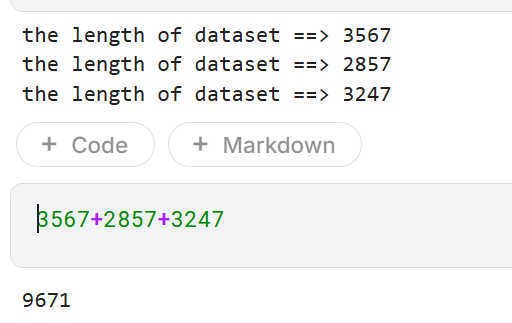

It match here (remember mismatch on first merging of 1 row each)

We found out regarding the mismatch in calc_test. The imgs were not matched into the dictionary cause their file path was not avaible on df_dictom, so from that info we could not retrieve the corrisponding info to our dataset. We decided to remove everything and since now the test could not be used anymore for simplicity we just merge train and test for each one ( so we can re-split later according to our needs)

In [130]:
merged_calc = pd.concat([merged_calc_train, merged_calc_test], axis=0, ignore_index=True)
merged_mass = pd.concat([merged_mass_train, merged_mass_test], axis=0, ignore_index=True)

In [131]:
print(merged_calc.shape)
print(merged_mass.shape)

(5253, 20)
(4984, 20)


In [132]:
# merged_calc.isnull().sum()
required_columns = ['image file path', 'cropped image file path', 'ROI mask file path']
merged_calc = merged_calc.dropna(subset=required_columns)
print(merged_calc.shape)

(4316, 20)


Plotting images for merged_calc...


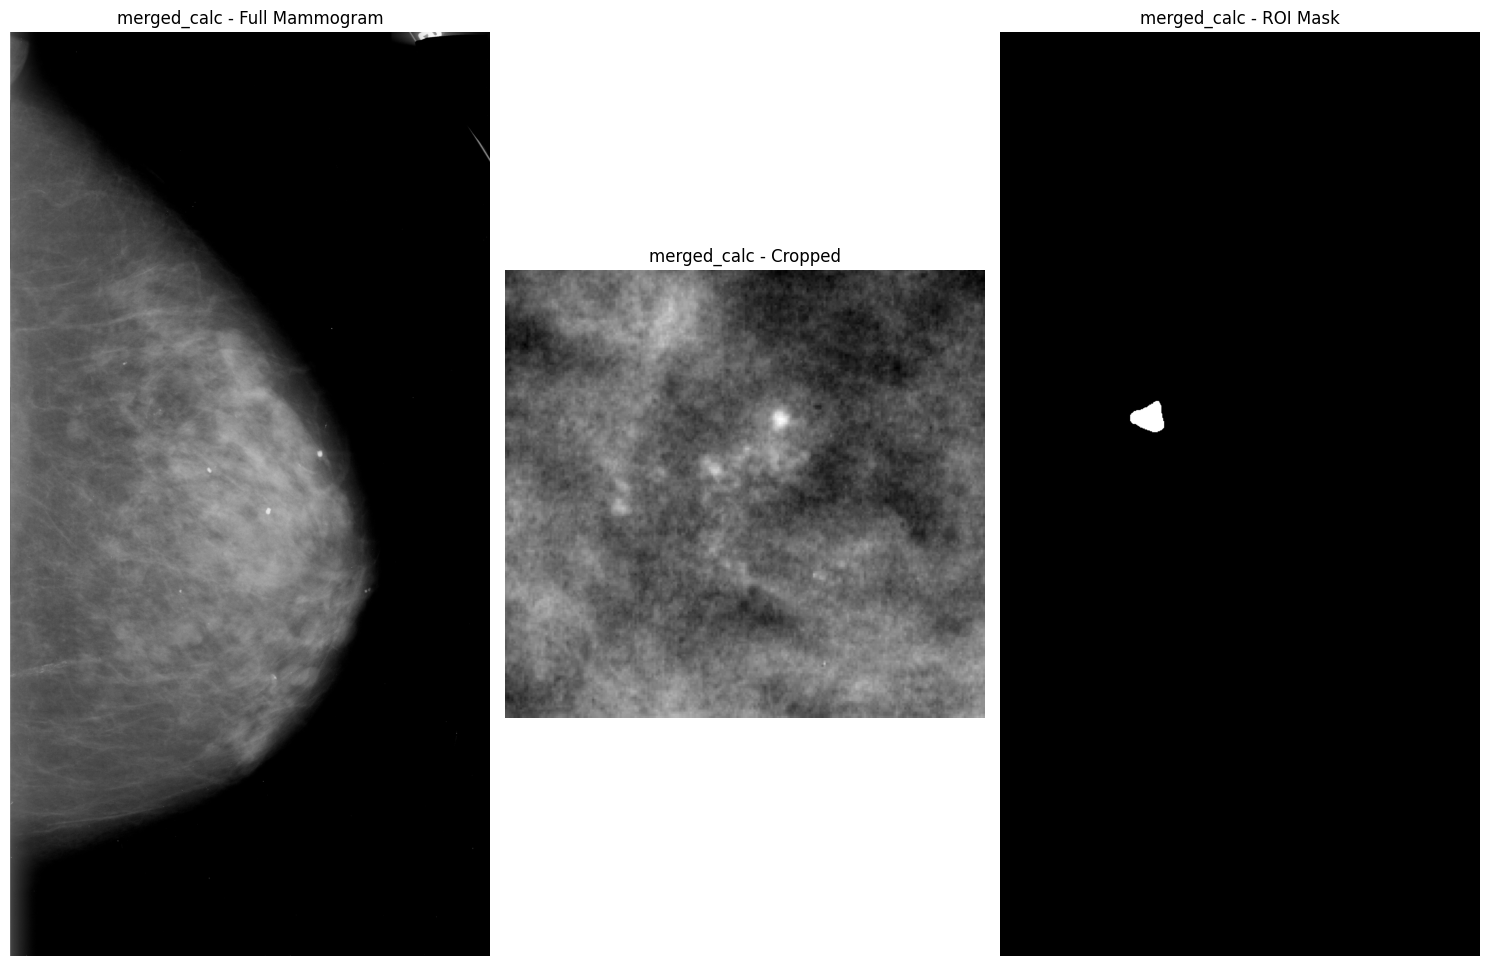

Plotting images for merged_mass...


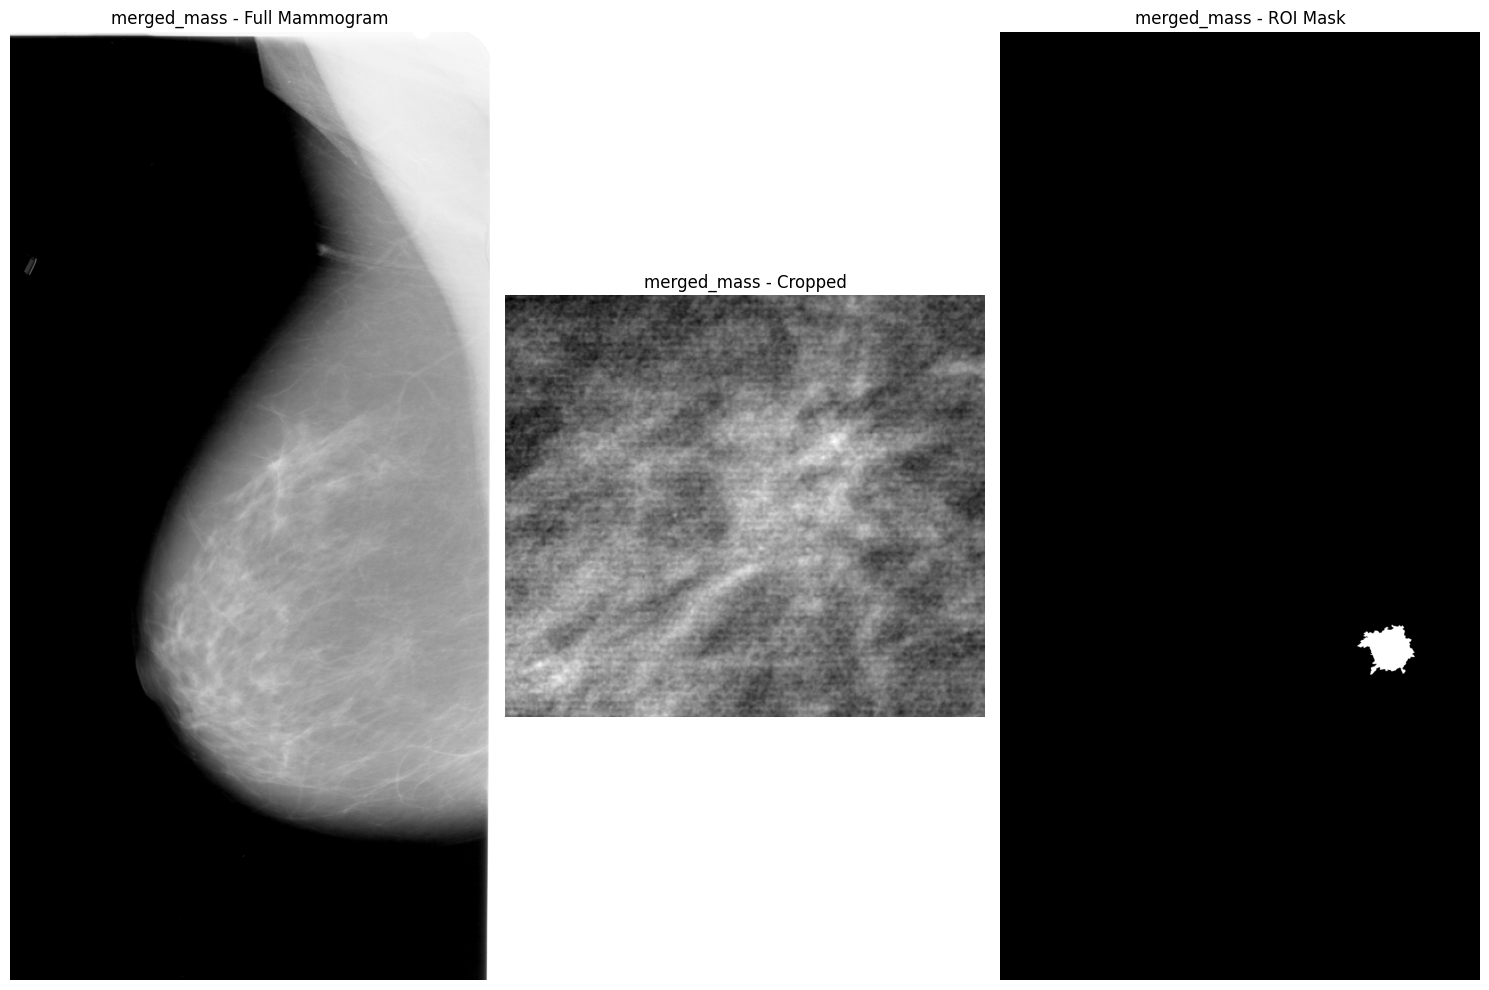

In [133]:
def plot_sample_images(dataset, dataset_name):
    """
    Plot sample images for a dataset to verify paths.
    Args:
        dataset (DataFrame): Dataset containing image paths.
        dataset_name (str): Name of the dataset.
    """
    plt.figure(figsize=(15, 15))
    types = [
        ('image file path', 'Full Mammogram'),
        ('cropped image file path', 'Cropped'),
        ('ROI mask file path', 'ROI Mask')
    ]

    for idx, (column, title) in enumerate(types):
        if column in dataset.columns and dataset[column].notnull().any():
            sample_path = dataset[column].dropna().iloc[0]
            img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                plt.subplot(1, 3, idx + 1)
                plt.imshow(img, cmap='gray')
                plt.title(f"{dataset_name} - {title}")
                plt.axis('off')
            else:
                print(f"Could not load image for {title} in {dataset_name}. Path: {sample_path}")
        else:
            print(f"No valid paths found for {title} in {dataset_name}.")
    plt.tight_layout()
    plt.show()


datasets_to_plot = {
    "merged_calc": merged_calc,
    "merged_mass": merged_mass,
}

for dataset_name, dataset in datasets_to_plot.items():
    print(f"Plotting images for {dataset_name}...")
    plot_sample_images(dataset, dataset_name)

### Real Feature Engineer starts now!

---

# **2. EDA and Data visualization**
In this exploratory data analysis (EDA), we will examine the two datasets obtained from the preprocessing steps: one related to mass abnormalities and the other to calcifications. The goal of this analysis is to understand the structure and characteristics of the datasets, including the distribution of features, relationships between variables, and potential correlations. 

In [134]:
# Inspect the shapes and data types of the datasets
datasets = {'merged_mass': merged_mass, 'merged_calc': merged_calc}

for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(f"Shape: {df.shape}")
    print(df.info())  # Data types and non-null counts
  
    print("-" * 50)

# Check for missing values
for name, df in datasets.items():
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("-" * 50)


Dataset: merged_mass
Shape: (4984, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   file_path                4984 non-null   object
 1   patient_id               4984 non-null   object
 2   breast_density           4984 non-null   int64 
 3   left or right breast     4984 non-null   object
 4   image view               4984 non-null   object
 5   abnormality id           4984 non-null   int64 
 6   mass shape               4974 non-null   object
 7   mass margins             4814 non-null   object
 8   assessment               4984 non-null   int64 
 9   pathology                4984 non-null   object
 10  subtlety                 4984 non-null   int64 
 11  image file path          4984 non-null   object
 12  cropped image file path  4984 non-null   object
 13  ROI mask file path       4984 non-null   object
 14  i

In [135]:
merged_mass.head()

file_path patient_id  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10068...    P_00281   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10090...    P_01423   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10098...    P_00106   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10130...    P_01232   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10130...    P_01232   

   breast_density left or right breast image view  abnormality id  \
0               3                 LEFT        MLO               1   
1               2                RIGHT         CC               1   
2               1                RIGHT        MLO               1   
3               2                RIGHT         CC               1   
4               2                RIGHT         CC               1   

                 mass shape   mass margins  assessment  \
0  ARCHITECTURAL_DISTORTION    ILL_DEFINED           4   
1                      OVAL    ILL_DEFINED           0   
2                LYMPH_NODE  CIRCUMSCRIBED           2   
3                 IRREGULAR     SPICULATED           5   
4                 IRREGULAR     SPICULATED           5   

                 pathology  subtlety  \
0                   BENIGN         2   
1                   BENIGN         5   
2  BENIGN_WITHOUT_CALLBACK         4   
3                MALIGNANT         5   
4                MALIGNANT         5   

                                     image file path  \
0  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
1  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
2  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
3  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
4  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   

                             cropped image file path  \
0  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
1  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
2  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
3  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
4  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   

                                  ROI mask file path  \
0  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
1  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
2  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
3  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
4  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   

                                          image_path BodyPartExamined  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100682...           BREAST   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100905...           BREAST   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100980...           BREAST   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.101302...           BREAST   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.101302...           BREAST   

                                    StudyInstanceUID  ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.306790226913702749912...           1   
1  1.3.6.1.4.1.9590.100.1.2.135084625711370131300...           1   
2  1.3.6.1.4.1.9590.100.1.2.322966358810778548708...           1   
3  1.3.6.1.4.1.9590.100.1.2.364339114411242938621...           2   
4  1.3.6.1.4.1.9590.100.1.2.364339114411242938621...           2   

       SeriesDescription                                  SeriesInstanceUID  
0  full mammogram images  1.3.6.1.4.1.9590.100.1.2.100682860911308271813...  
1        ROI mask images  1.3.6.1.4.1.9590.100.1.2.100905990410891350726...  
2  full mammogram images  1.3.6.1.4.1.9590.100.1.2.100980939123382399014...  
3         cropped images  1.3.6.1.4.1.9590.100.1.2.101302820113690396725...  
4        ROI mask images  1.3.6.1.4.1.9590.100.1.2.101302820113690396725...

In [136]:
merged_calc.head()

file_path patient_id  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10001...    P_01128   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10001...    P_01128   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10013...    P_01107   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10055...    P_00539   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10055...    P_00539   

   breast density left or right breast image view  abnormality id  \
0               3                RIGHT         CC               1   
1               3                RIGHT         CC               1   
2               2                 LEFT         CC               1   
3               3                RIGHT        MLO               3   
4               3                RIGHT        MLO               3   

     calc type calc distribution  assessment  pathology  subtlety  \
0  PLEOMORPHIC         CLUSTERED           4  MALIGNANT         2   
1  PLEOMORPHIC         CLUSTERED           4  MALIGNANT         2   
2  PLEOMORPHIC         CLUSTERED           4     BENIGN         2   
3  PLEOMORPHIC         CLUSTERED           4  MALIGNANT         3   
4  PLEOMORPHIC         CLUSTERED           4  MALIGNANT         3   

                                     image file path  \
0  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
1  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
2  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
3  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
4  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   

                             cropped image file path  \
0  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
1  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
2  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
3  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
4  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   

                                  ROI mask file path  \
0  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
1  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
2  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
3  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   
4  /kaggle/input/cbis-ddsm-breast-cancer-image-da...   

                                          image_path BodyPartExamined  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100018...           BREAST   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100018...           BREAST   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100131...           BREAST   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100552...           BREAST   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100552...           BREAST   

                                    StudyInstanceUID  ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.346810468613236696616...           2   
1  1.3.6.1.4.1.9590.100.1.2.346810468613236696616...           2   
2  1.3.6.1.4.1.9590.100.1.2.113816182611334006337...           1   
3  1.3.6.1.4.1.9590.100.1.2.735487009117821327380...           2   
4  1.3.6.1.4.1.9590.100.1.2.735487009117821327380...           2   

       SeriesDescription                                  SeriesInstanceUID  
0         cropped images  1.3.6.1.4.1.9590.100.1.2.100018879311824535125...  
1        ROI mask images  1.3.6.1.4.1.9590.100.1.2.100018879311824535125...  
2  full mammogram images  1.3.6.1.4.1.9590.100.1.2.100131208110604806117...  
3         cropped images  1.3.6.1.4.1.9590.100.1.2.100552942107662341409...  
4        ROI mask images  1.3.6.1.4.1.9590.100.1.2.100552942107662341409...

## Target Variable Pathology

The variable pathology is the target variable for both datasets (merged_mass and merged_calc). It categorizes cases into three classes:

*  Benign
*  Malignant
*  Benign without Callback
  
In this section, we will analyze the distribution of these classes, check for missing or incorrect values, and explore relationships between pathology and other features.

In [137]:
# Analyze the distribution of the target variable `pathology` in the `merged_mass` dataset
print("Distribution and percentage of 'pathology' in merged_mass:")

pathology_counts_mass = merged_mass['pathology'].value_counts()
pathology_percentage_mass = merged_mass['pathology'].value_counts(normalize=True) * 100

# Mapping numeric labels to meaningful labels
pathology_labels = {0: 'Benigno', 1: 'Maligno', 2: 'Benigno without Callback'}

# Display counts and percentages side by side with labels
for idx, (count, percentage) in enumerate(zip(pathology_counts_mass, pathology_percentage_mass)):
    label = pathology_labels[idx]
    print(f"{label}: {count} ({percentage:.2f}%)")

print("\n")

# Analyze the distribution of the target variable `pathology` in the `merged_calc` dataset
print("Distribution and percentage of 'pathology' in merged_calc:")

pathology_counts_calc = merged_calc['pathology'].value_counts()
pathology_percentage_calc = merged_calc['pathology'].value_counts(normalize=True) * 100

# Display counts and percentages side by side with labels
for idx, (count, percentage) in enumerate(zip(pathology_counts_calc, pathology_percentage_calc)):
    label = pathology_labels[idx]
    print(f"{label}: {count} ({percentage:.2f}%)")

Distribution and percentage of 'pathology' in merged_mass:
Benigno: 2308 (46.31%)
Maligno: 2275 (45.65%)
Benigno without Callback: 401 (8.05%)


Distribution and percentage of 'pathology' in merged_calc:
Benigno: 1594 (36.93%)
Maligno: 1540 (35.68%)
Benigno without Callback: 1182 (27.39%)


### Check for Missing or Incorrect Values

In [138]:
# Check for missing values in the 'pathology' column
print("Missing values in 'pathology' column (merged_mass):", merged_mass['pathology'].isnull().sum())
print("Missing values in 'pathology' column (merged_calc):", merged_calc['pathology'].isnull().sum())

# Check for unique values to identify any unexpected or incorrect entries
print("\nUnique values in 'pathology' (merged_mass):", merged_mass['pathology'].unique())
print("Unique values in 'pathology' (merged_calc):", merged_calc['pathology'].unique())

Missing values in 'pathology' column (merged_mass): 0
Missing values in 'pathology' column (merged_calc): 0

Unique values in 'pathology' (merged_mass): ['BENIGN' 'BENIGN_WITHOUT_CALLBACK' 'MALIGNANT']
Unique values in 'pathology' (merged_calc): ['MALIGNANT' 'BENIGN' 'BENIGN_WITHOUT_CALLBACK']


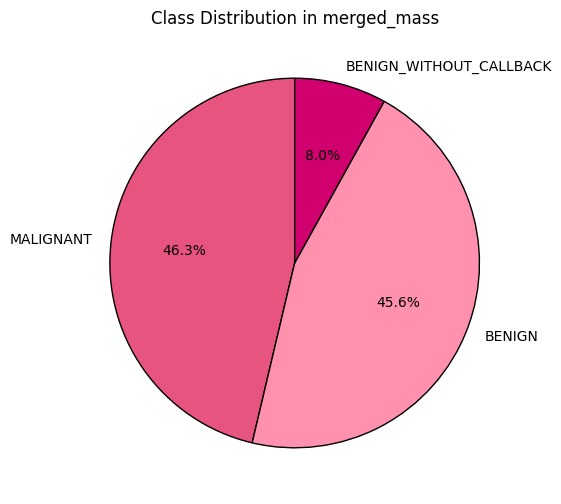

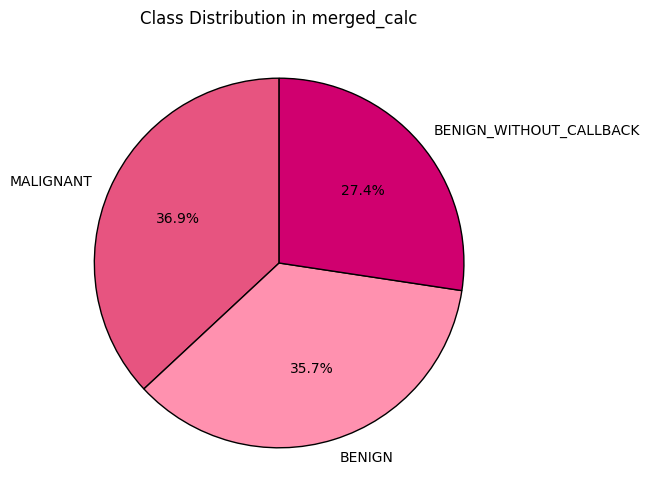

In [139]:
# Define a magenta/pink-focused color palette
custom_colors = ['#e75480', '#ff91af', '#d0006f']  # Magenta, soft pink, and deep magenta shades

# Pie chart for merged_mass
plt.figure(figsize=(6, 6))
merged_mass['pathology'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Class Distribution in merged_mass")
plt.ylabel('')  # Hide the y-axis label
plt.show()

# Pie chart for merged_calc
plt.figure(figsize=(6, 6))
merged_calc['pathology'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Class Distribution in merged_calc")
plt.ylabel('')  # Hide the y-axis label
plt.show()

### Relationships between pathology and other Features

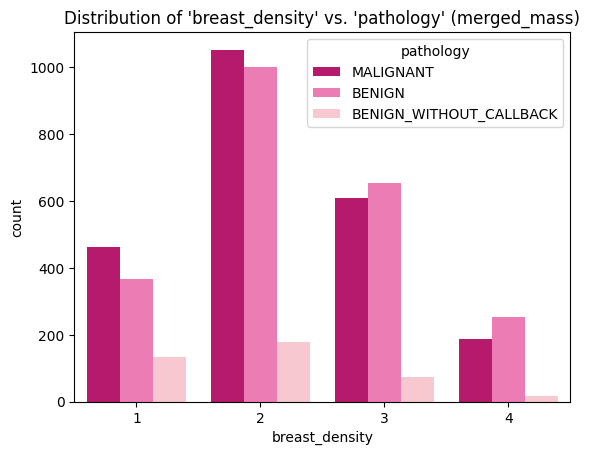

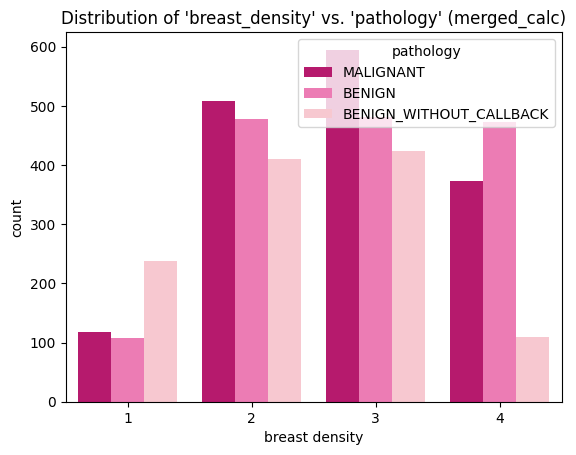

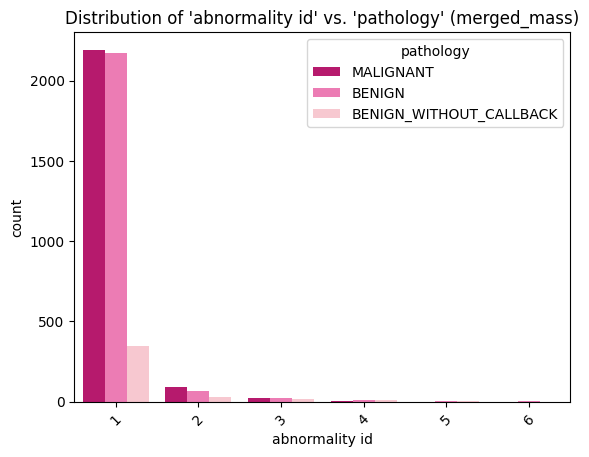

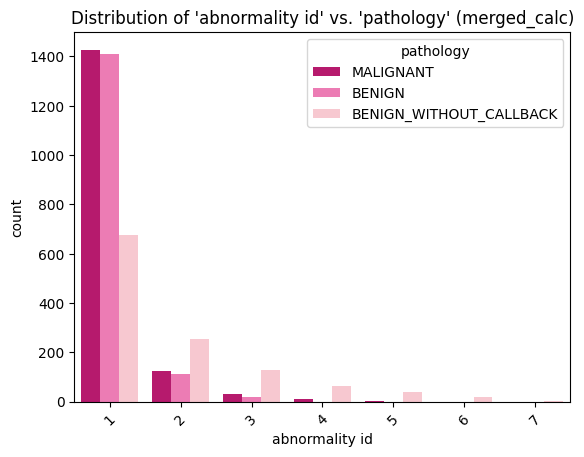

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a consistent order for the classes
class_order = ['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK']

# Define a consistent color mapping
color_mapping = {'MALIGNANT': '#d0006f', 'BENIGN': '#FF69B4', 'BENIGN_WITHOUT_CALLBACK': '#FFC0CB'}
custom_palette = [color_mapping[class_name] for class_name in class_order]

# Relationship between `breast_density` and `pathology` for merged_mass
sns.countplot(data=merged_mass, x='breast_density', hue='pathology', 
              palette=custom_palette, hue_order=class_order)
plt.title("Distribution of 'breast_density' vs. 'pathology' (merged_mass)")
plt.show()

# Relationship between `breast_density` and `pathology` for merged_calc
sns.countplot(data=merged_calc, x='breast density', hue='pathology', 
              palette=custom_palette, hue_order=class_order)
plt.title("Distribution of 'breast_density' vs. 'pathology' (merged_calc)")
plt.show()

# Relationship between `abnormality id` and `pathology` for merged_mass
sns.countplot(data=merged_mass, x='abnormality id', hue='pathology', 
              palette=custom_palette, hue_order=class_order)
plt.title("Distribution of 'abnormality id' vs. 'pathology' (merged_mass)")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

# Relationship between `abnormality id` and `pathology` for merged_calc
sns.countplot(data=merged_calc, x='abnormality id', hue='pathology', 
              palette=custom_palette, hue_order=class_order)
plt.title("Distribution of 'abnormality id' vs. 'pathology' (merged_calc)")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

### Independence Test Between pathology and breast_density

To evaluate the statistical relationship between pathology (the target variable) and other categorical variables like breast_density and abnormality id, we can use a chi-squared test of independence. This test determines whether there is a significant association between two categorical variables.

In [141]:
from scipy.stats import chi2_contingency

# Function to perform chi-squared test
def perform_chi2_test(data, column, target='pathology'):
    contingency_table = pd.crosstab(data[column], data[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Test for `breast_density` vs `pathology`
chi2_mass_breast_density, p_mass_breast_density = perform_chi2_test(merged_mass, 'breast_density')
chi2_calc_breast_density, p_calc_breast_density = perform_chi2_test(merged_calc, 'breast density')

# Test for `abnormality id` vs `pathology`
chi2_mass_abnormality, p_mass_abnormality = perform_chi2_test(merged_mass, 'abnormality id')
chi2_calc_abnormality, p_calc_abnormality = perform_chi2_test(merged_calc, 'abnormality id')

# Print results
print("Chi-squared test results:")
print(f"Mass dataset - Breast Density: Chi2 = {chi2_mass_breast_density:.2f}, p-value = {p_mass_breast_density:.4f}")
print(f"Calc dataset - Breast Density: Chi2 = {chi2_calc_breast_density:.2f}, p-value = {p_calc_breast_density:.4f}")
print(f"Mass dataset - Abnormality ID: Chi2 = {chi2_mass_abnormality:.2f}, p-value = {p_mass_abnormality:.4f}")
print(f"Calc dataset - Abnormality ID: Chi2 = {chi2_calc_abnormality:.2f}, p-value = {p_calc_abnormality:.4f}")

Chi-squared test results:
Mass dataset - Breast Density: Chi2 = 91.78, p-value = 0.0000
Calc dataset - Breast Density: Chi2 = 286.27, p-value = 0.0000
Mass dataset - Abnormality ID: Chi2 = 114.49, p-value = 0.0000
Calc dataset - Abnormality ID: Chi2 = 730.94, p-value = 0.0000


The chi-squared tests indicate a strong relationship between the target variable pathology and features like breast_density and abnormality id. High chi-squared values and low p-values suggest a significant dependency between these features and pathology. This implies that breast_density and abnormality id could be predictive features for classifying cases into benign, malignant, and benign without callback. Consequently, these features should be considered in predictive modeling and classification tasks.

## Analysis of Calcification Type

In this section, we explore the distribution of the categorical variable calcification type from the merged_calc dataset. We provide a pie chart showing the distribution and a table presenting the counts and percentages of each category.

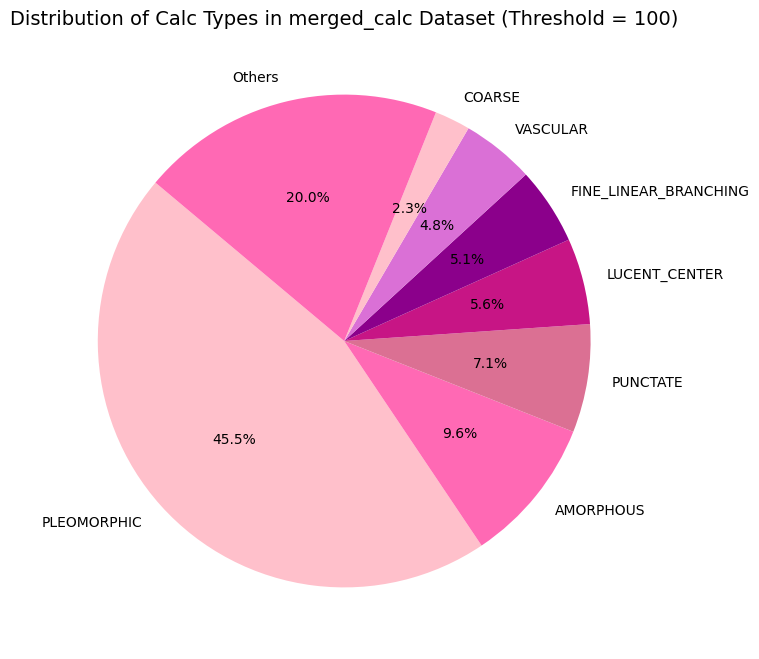

Calc Type  Frequency  Percentage
0                                         PLEOMORPHIC       1943   45.524836
1                                           AMORPHOUS        409    9.582943
2                                            PUNCTATE        303    7.099344
3                                       LUCENT_CENTER        241    5.646673
4                               FINE_LINEAR_BRANCHING        216    5.060918
5                                            VASCULAR        204    4.779756
6                                              COARSE        100    2.343018
7                   PLEOMORPHIC-FINE_LINEAR_BRANCHING         76    1.780694
8                     ROUND_AND_REGULAR-LUCENT_CENTER         74    1.733833
9                                PUNCTATE-PLEOMORPHIC         61    1.429241
10                                         DYSTROPHIC         56    1.312090
11           ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE         52    1.218369
12                                  ROUND_AND_REGULAR         51    1.194939
13                         ROUND_AND_REGULAR-EGGSHELL         50    1.171509
14                                    LUCENT_CENTERED         44    1.030928
15                              AMORPHOUS-PLEOMORPHIC         34    0.796626
16                  ROUND_AND_REGULAR-LUCENT_CENTERED         33    0.773196
17                                 PUNCTATE-AMORPHOUS         29    0.679475
18             COARSE-ROUND_AND_REGULAR-LUCENT_CENTER         24    0.562324
19                    LARGE_RODLIKE-ROUND_AND_REGULAR         24    0.562324
20                      ROUND_AND_REGULAR-PLEOMORPHIC         21    0.492034
21                             LUCENT_CENTER-PUNCTATE         20    0.468604
22                     PUNCTATE-FINE_LINEAR_BRANCHING         18    0.421743
23                                           EGGSHELL         18    0.421743
24                    VASCULAR-COARSE-LUCENT_CENTERED         18    0.421743
25                                    VASCULAR-COARSE         14    0.328022
26                         ROUND_AND_REGULAR-PUNCTATE         13    0.304592
27                                      LARGE_RODLIKE         10    0.234302
28                                      SKIN-PUNCTATE         10    0.234302
29                         PUNCTATE-ROUND_AND_REGULAR         10    0.234302
30                    SKIN-PUNCTATE-ROUND_AND_REGULAR         10    0.234302
31           COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED         10    0.234302
32                             PUNCTATE-LUCENT_CENTER          8    0.187441
33                        AMORPHOUS-ROUND_AND_REGULAR          8    0.187441
34                                               SKIN          6    0.140581
35                               COARSE-LUCENT_CENTER          6    0.140581
36         ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC          6    0.140581
37                                    MILK_OF_CALCIUM          6    0.140581
38                           COARSE-ROUND_AND_REGULAR          6    0.140581
39               ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS          6    0.140581
40                                 COARSE-PLEOMORPHIC          6    0.140581
41  VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULA...          5    0.117151
42                        ROUND_AND_REGULAR-AMORPHOUS          3    0.070291
43                      SKIN-COARSE-ROUND_AND_REGULAR          3    0.070291
44                            PLEOMORPHIC-PLEOMORPHIC          3    0.070291

In [142]:
# Count frequencies of each 'calc type' category
calc_type_counts = merged_calc['calc type'].value_counts()

# Set threshold for "Others" to combine categories with less than this number of occurrences
threshold = 100

# Separate categories with more than 'threshold' occurrences and those under "Others"
others_count = calc_type_counts[calc_type_counts < threshold].sum()
valid_counts = calc_type_counts[calc_type_counts >= threshold]

# Prepare data for pie chart
labels = valid_counts.index.tolist() + ['Others']
sizes = valid_counts.values.tolist() + [others_count]

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=['#FFC0CB', '#FF69B4', '#DB7093', '#C71585', '#8B008B', '#DA70D6'])
plt.title('Distribution of Calc Types in merged_calc Dataset (Threshold = 100)', fontsize=14)
plt.show()

# Creating a dataframe to display all calc type categories with their frequencies and percentages
calc_type_counts = merged_calc['calc type'].value_counts().reset_index()
calc_type_counts.columns = ['Calc Type', 'Frequency']

# Adding a column for percentage
calc_type_counts['Percentage'] = (calc_type_counts['Frequency'] / calc_type_counts['Frequency'].sum()) * 100

# Displaying the table
calc_type_counts

## Analysis of Calcification Distribution

In this section, we explore the distribution of the categorical variable calc distribution from the merged_calc dataset.
We provide a pie chart showing the distribution and a table presenting the counts and percentages of each category.

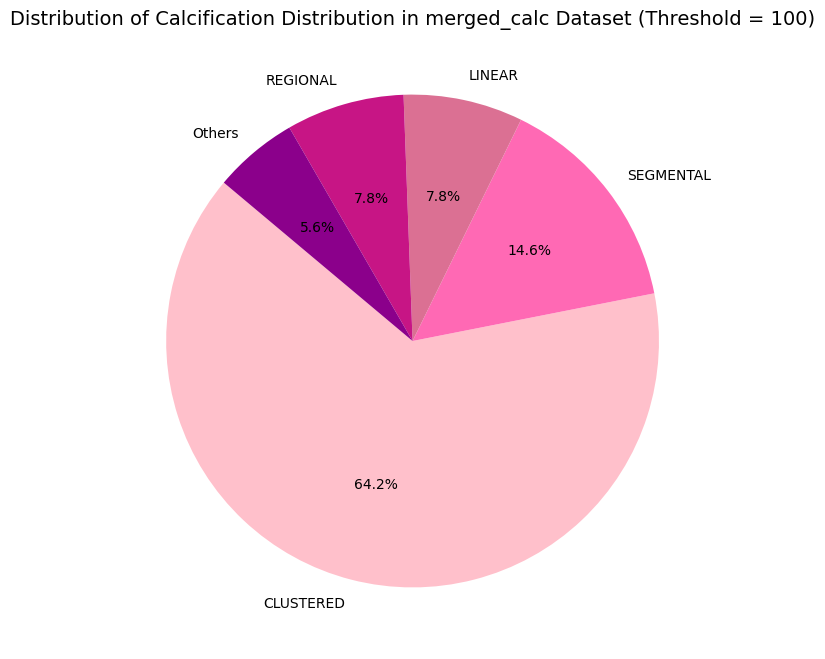

Calcification distribution  Frequency  Percentage
0                  CLUSTERED       2162   64.211464
1                  SEGMENTAL        493   14.642115
2                     LINEAR        264    7.840808
3                   REGIONAL        261    7.751708
4        DIFFUSELY_SCATTERED         91    2.702703
5           CLUSTERED-LINEAR         68    2.019602
6           LINEAR-SEGMENTAL         13    0.386100
7        CLUSTERED-SEGMENTAL         12    0.356400
8          REGIONAL-REGIONAL          3    0.089100

In [143]:
# Count frequencies of each 'calc type' category
calc_dist_counts = merged_calc['calc distribution'].value_counts()

# Set threshold for "Others" to combine categories with less than this number of occurrences
threshold = 100

# Separate categories with more than 'threshold' occurrences and those under "Others"
others_count = calc_dist_counts[calc_dist_counts < threshold].sum()
valid_counts = calc_dist_counts[calc_dist_counts >= threshold]

# Prepare data for pie chart
labels = valid_counts.index.tolist() + ['Others']
sizes = valid_counts.values.tolist() + [others_count]


# Plotting
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=['#FFC0CB', '#FF69B4', '#DB7093', '#C71585', '#8B008B', '#DA70D6'])
plt.title('Distribution of Calcification Distribution in merged_calc Dataset (Threshold = 100)', fontsize=14)
plt.show()

# Creating a dataframe to display all calc type categories with their frequencies and percentages
calc_dist_counts = merged_calc['calc distribution'].value_counts().reset_index()
calc_dist_counts.columns = ['Calcification distribution', 'Frequency']

# Adding a column for percentage
calc_dist_counts['Percentage'] = (calc_dist_counts['Frequency'] / calc_dist_counts['Frequency'].sum()) * 100

# Displaying the table
calc_dist_counts

## Heatmap of Mass Shape vs Pathology

This heatmap visualizes the distribution of combinations between mass shape and pathology in the merged_mass dataset. Each cell represents the frequency of different combinations.

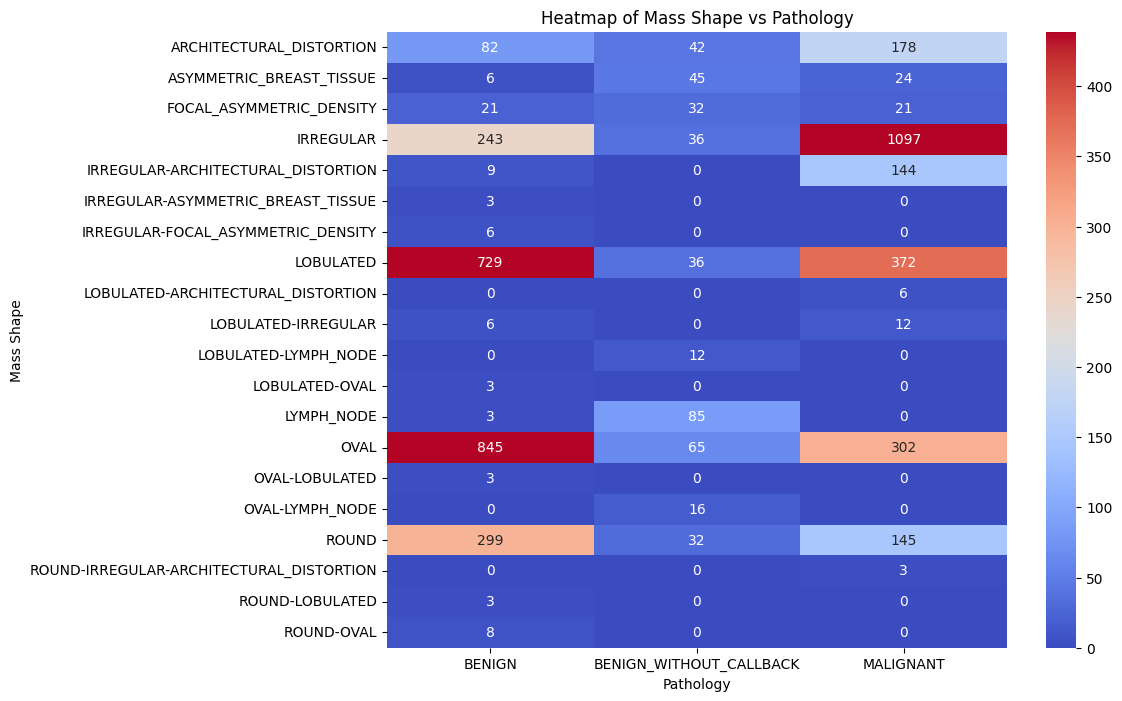

In [144]:
# Selecting only 'mass shape' and 'pathology' columns
columns_to_plot = ['mass shape', 'pathology']
data = merged_mass[columns_to_plot]

# Creating a pivot table to calculate the frequency of combinations
pivot_table = data.pivot_table(index='mass shape', columns='pathology', aggfunc='size', fill_value=0)

# Plotting the heatmap with coolwarm color palette
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d', vmin=0, vmax=pivot_table.max().max() * 0.4)
plt.title('Heatmap of Mass Shape vs Pathology')
plt.xlabel('Pathology')
plt.ylabel('Mass Shape')
plt.show()

## Heatmap of Mass Margin vs Pathology

This heatmap illustrates the distribution of combinations between mass margins and pathology. Each cell indicates the frequency of each combination present in the merged_mass dataset.

##### Structured Part

In [146]:
# Define image constants
FULL_IMG = "image file path"
CROPPED_IMG = "cropped image file path"
ROI_IMG = "ROI mask file path"

In [147]:
# for now we focus on a 2 class classification task, where class are balanced
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 

In [148]:
target_size = (224, 224, 3)

In [149]:
def extract_features(df, df_type="mass"):
    columns_to_remove = ['StudyInstanceUID', 'patient_id','SeriesInstanceUID']
    df = df.drop(columns=columns_to_remove, errors='ignore')
    
    # numerical variables are ordinal, so I'll keep them as they are
    categorical_columns_to_dummy = [
        col for col in df.columns 
        if df[col].nunique() < 50 and df[col].dtype in ['object', 'category'] and col != 'pathology'
    ]
    df = pd.get_dummies(df, columns=categorical_columns_to_dummy, drop_first=True)

    print(f"Dataset info: {df_type}")
    display(merged_calc.info())
    print("-" * 50)

    df['labels'] = df['pathology'].replace(class_mapper).infer_objects(copy=False)

    def get_images_by_type(df, image_type):
        #print(image_type)
        valid_rows = df[df[image_type].notna()]
        #print(valid_rows.shape)
        return np.array(valid_rows[image_type].tolist()), np.array(valid_rows["labels"].tolist())

    # Collect data by image tyoe in dict
    merged_dict = {
        FULL_IMG: get_images_by_type(df, FULL_IMG),
        CROPPED_IMG: get_images_by_type(df, CROPPED_IMG),
        ROI_IMG: get_images_by_type(df, ROI_IMG)
    }
    
    # Print stats
    print("Images counts by type")
    print(f"Full images in {df_type} dataset: {len(merged_dict[FULL_IMG][0])}, {len(merged_dict[FULL_IMG][1])}")
    print(f"Cropped images in {df_type} dataset: {len(merged_dict[CROPPED_IMG][0])}, {len(merged_dict[CROPPED_IMG][1])}")
    print(f"ROI images in {df_type} dataset: {len(merged_dict[ROI_IMG][0])}, {len(merged_dict[ROI_IMG][1])}")

    merged_labels = np.concatenate((merged_dict[FULL_IMG][1], merged_dict[CROPPED_IMG][1], merged_dict[ROI_IMG][1]))
    print(f"Total number of images in {df_type} dataset: {len(merged_labels)}")
    print("-" * 50)
    
    merged_labels_series = pd.Series(merged_labels)
    
    # Count the occurrences of each class
    label_counts = merged_labels_series.value_counts()
    
    # Assuming 0 = benign and 1 = malignant
    benign_count = label_counts.get(0, 0)
    malignant_count = label_counts.get(1, 0)
    
    print(f"Benign images in {df_type} dataset: {benign_count}")
    print(f"Malignant images in {df_type} dataset: {malignant_count}")

    return merged_dict, merged_labels

In [150]:
merged_mass_dict, merged_mass_labels = extract_features(merged_mass, df_type="mass")
print("=" * 50)
merged_calc_dict, merged_calc_labels = extract_features(merged_calc, df_type="calc")

Dataset info: mass
<class 'pandas.core.frame.DataFrame'>
Index: 4316 entries, 0 to 4637
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   file_path                4316 non-null   object
 1   patient_id               4316 non-null   object
 2   breast density           4316 non-null   int64 
 3   left or right breast     4316 non-null   object
 4   image view               4316 non-null   object
 5   abnormality id           4316 non-null   int64 
 6   calc type                4268 non-null   object
 7   calc distribution        3367 non-null   object
 8   assessment               4316 non-null   int64 
 9   pathology                4316 non-null   object
 10  subtlety                 4316 non-null   int64 
 11  image file path          4316 non-null   object
 12  cropped image file path  4316 non-null   object
 13  ROI mask file path       4316 non-null   object
 14  image_path               4

None

--------------------------------------------------
Images counts by type
Full images in mass dataset: 4984, 4984
Cropped images in mass dataset: 4984, 4984
ROI images in mass dataset: 4984, 4984
Total number of images in mass dataset: 14952
--------------------------------------------------
Benign images in mass dataset: 8028
Malignant images in mass dataset: 6924
Dataset info: calc
<class 'pandas.core.frame.DataFrame'>
Index: 4316 entries, 0 to 4637
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   file_path                4316 non-null   object
 1   patient_id               4316 non-null   object
 2   breast density           4316 non-null   int64 
 3   left or right breast     4316 non-null   object
 4   image view               4316 non-null   object
 5   abnormality id           4316 non-null   int64 
 6   calc type                4268 non-null   object
 7   calc distribution        3367 

/tmp/ipykernel_23/3788052193.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['labels'] = df['pathology'].replace(class_mapper).infer_objects(copy=False)


None

--------------------------------------------------
Images counts by type
Full images in calc dataset: 4316, 4316
Cropped images in calc dataset: 4316, 4316
ROI images in calc dataset: 4316, 4316
Total number of images in calc dataset: 12948
--------------------------------------------------
Benign images in calc dataset: 8166
Malignant images in calc dataset: 4782


/tmp/ipykernel_23/3788052193.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['labels'] = df['pathology'].replace(class_mapper).infer_objects(copy=False)


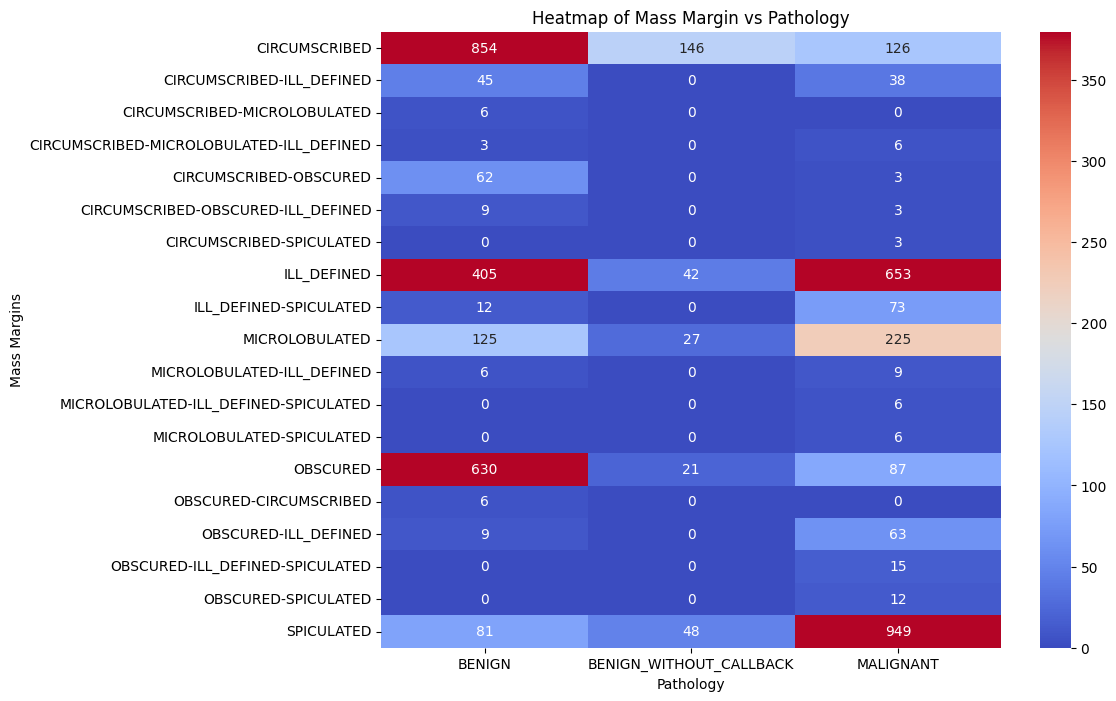

In [145]:
# Selecting only 'mass margin' and 'pathology' columns
columns_to_plot = ['mass margins', 'pathology']
data = merged_mass[columns_to_plot]

# Creating a pivot table to calculate the frequency of combinations
pivot_table = data.pivot_table(index='mass margins', columns='pathology', aggfunc='size', fill_value=0)

# Plotting the heatmap with coolwarm color palette and adjusted vmin
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d', vmin=0, vmax=pivot_table.max().max() * 0.4)
plt.title('Heatmap of Mass Margin vs Pathology')
plt.xlabel('Pathology')
plt.ylabel('Mass Margins')
plt.show()

# **3. Image preprocessing and data visualization**

**Import libs for image preprocessing**

In [151]:
# Import libs for preprocessing
from tqdm import tqdm
import random
from skimage.feature import local_binary_pattern
import time
import shutil
from skimage.exposure import adjust_gamma, equalize_hist

## **Image visualization**

Below are the functions used for visualizing images during preprocessing and analysis.

### **1. Visualizing Grayscale Images from File Path**

This function reads a grayscale image from a given file path and visualizes it using Matplotlib. It is especially useful for examining raw or preprocessed images.

In [152]:
def visualize_image_from_path(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap="gray")
    plt.title(f"Image shape: {image.shape}")
    plt.axis("off")
    plt.show()

### **2. Visualizing Grayscale Images in Memory**

If an image is already loaded in memory (e.g., as a NumPy array), this function allows for quick visualization without the need to load it again.

In [153]:
def visualize_image(image):
    plt.imshow(image, cmap="gray")
    plt.title(f"Image shape: {image.shape}")
    plt.axis("off")
    plt.show()

### **3. Visualizing 3-Channel Images**

The function visualizes the three components of a preprocessed image stored as a `.npy` file. Each channel represents a unique aspect of the preprocessing pipeline:

1. **Main Image**:
   - The primary grayscale representation of the original mammogram.
   - Often the base image for further analysis.

2. **Intensity Heatmap**:
   - An edge-detection or intensity-based heatmap highlighting regions of interest.

3. **Combined Gradient Magnitude**:
   - Represents the magnitude of intensity transitions across the image.
   - Useful for identifying structural patterns and regions with sharp intensity variations.

The visualization provides insights into how each preprocessing step contributes to the final dataset.

In [154]:
def visualize_3channel_image(image_path):
    image = np.load(image_path)

    # Extract channels
    main_image = image[:, :, 0]  # Main preprocessed image
    edges = image[:, :, 1]       # Edge-detected image
    gradient = image[:, :, 2]    # Gradient magnitude image

    # Plot the channels
    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Preprocessed Image: {os.path.basename(image_path)}")

    # Main image
    plt.subplot(1, 3, 1)
    plt.imshow(main_image, cmap="gray")
    plt.title("Main Image")
    plt.axis("off")

    # Edge detection
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap="gray")
    plt.title("Intensity Heatmap")
    plt.axis("off")

    # Gradient magnitude
    plt.subplot(1, 3, 3)
    plt.imshow(gradient, cmap="gray")
    plt.title("Combined Gradient Magnitude")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

### **4. Visualization of Detected Patch**

The `visualize_detected_patch` function provides a detailed visualization of the detected region on the full image and its corresponding cropped patch. 

**Key Steps**:
1. **Patch Rescaling**:
   - The cropped image is resized to match the detected scale.

2. **Highlighting Detected Region**:
   - The function uses the coordinates `(x, y)` and dimensions `(h, w)` of the scaled cropped image to draw a red rectangle on the full image.

3. **Side-by-Side Visualization**:
   - The first subplot shows the full image with the detected region highlighted.
   - The second subplot displays the corresponding cropped image for comparison.

This visualization helps verify the accuracy of detection and alignment between the cropped patch and the full image.

In [155]:
def visualize_detected_patch(full_image, cropped_image, coordinates, scale):
    """
    Visualize the detected patch on the full image.
    """
    # Rescale the cropped image to the detected scale
    h, w = cropped_image.shape
    scaled_cropped_image = cv2.resize(cropped_image, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

    # Get the coordinates of the matched region
    x, y = coordinates
    h, w = scaled_cropped_image.shape

    # Plot the full image with the matched region highlighted
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Detected Region on Full Image")
    plt.imshow(full_image, cmap="gray")
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none', lw=2))
    plt.axis("off")

    # Plot the cropped image
    plt.subplot(1, 2, 2)
    plt.title("Cropped Image")
    plt.imshow(cropped_image, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

### **5. Visualization of Sample from Dataset**

The `visualize_sample_from_df` function displays a side-by-side comparison of three types of images (`FULL_IMG`, `CROPPED_IMG`, and `ROI_IMG`) for a given sample index.

**Key Steps**:
1. **Input Handling**:
   - Accepts a `merged_dict` containing paths to the images and an `idx` for the sample to visualize.

2. **Image Loading and Display**:
   - Loads the images in grayscale using `cv2.imread()`.
   - Displays the images in a single row of three subplots:
     - **FULL_IMG**: The complete mammogram image.
     - **CROPPED_IMG**: A cropped region of interest (e.g., suspected area).
     - **ROI_IMG**: A mask or enhanced visualization of the region of interest.

3. **Subplot Features**:
   - Titles include the shape of each image for easy verification.
   - Axes are turned off for cleaner visuals.

This visualization helps in analyzing and comparing different representations of the mammogram dataset, ensuring that preprocessing steps and image dimensions are correct.

In [156]:
def visualize_sample_from_df(merged_dict, idx=0):
    plt.figure(figsize=(15, 15))

    # full subplot
    full = cv2.imread(merged_dict[FULL_IMG][0][idx], cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, 3, 1)
    plt.imshow(full, cmap='gray')
    plt.title(f"FULL_IMG shape: {full.shape}")
    plt.axis('off')

    # cropped subplot
    cropped = cv2.imread(merged_dict[CROPPED_IMG][0][idx], cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, 3, 2)
    plt.imshow(cropped, cmap='gray')
    plt.title(f"CROPPED_IMG shape: {cropped.shape}")
    plt.axis('off')

    # roi subplot
    roi = cv2.imread(merged_dict[ROI_IMG][0][idx], cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, 3, 3)
    plt.imshow(roi, cmap='gray')
    plt.title(f"ROI_IMG shape: {roi.shape}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

Example of usage with sample from `mass` dataset:

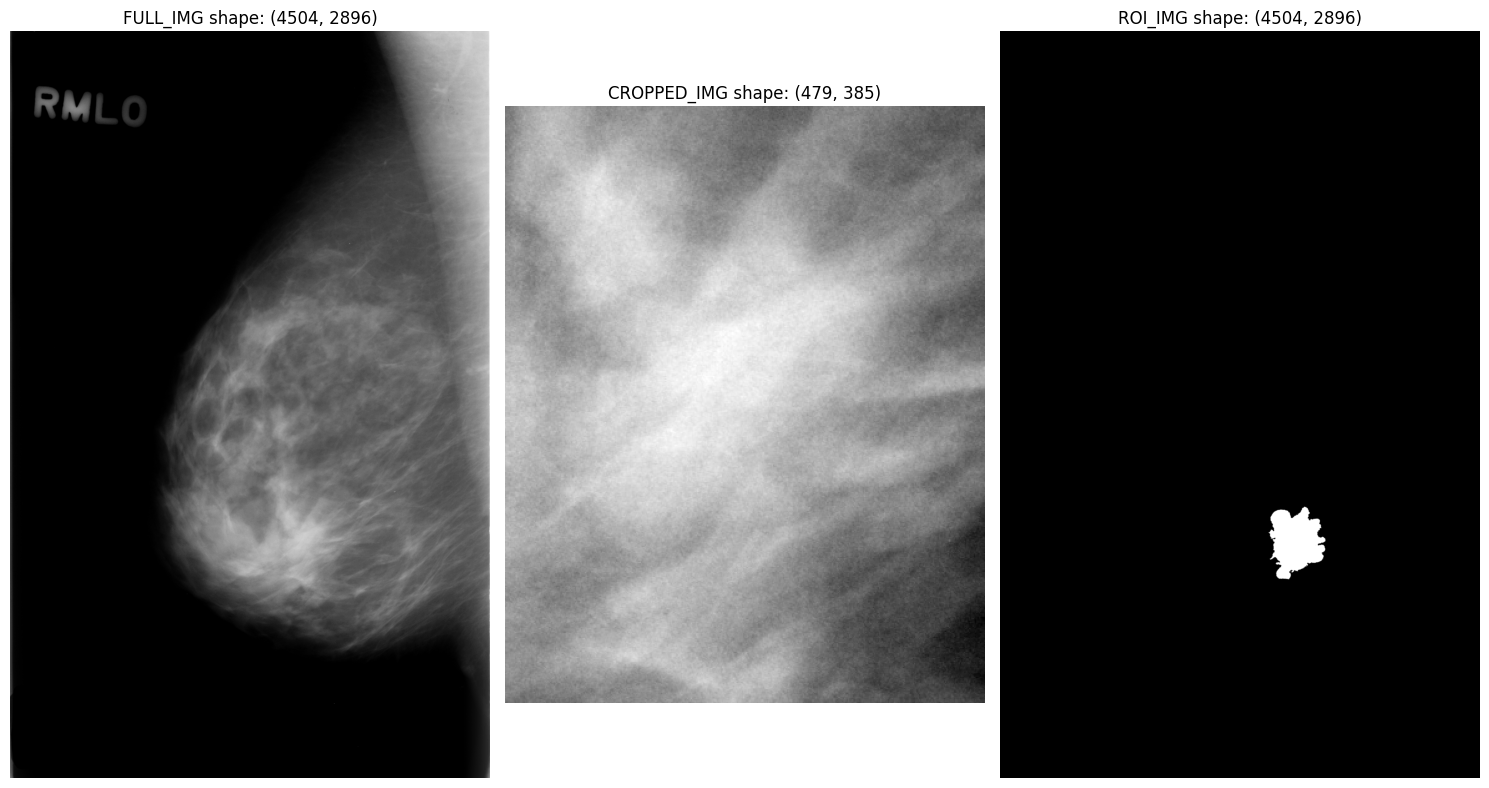

In [157]:
visualize_sample_from_df(merged_mass_dict, idx=5)

Example of usage with sample from `calc` dataset:

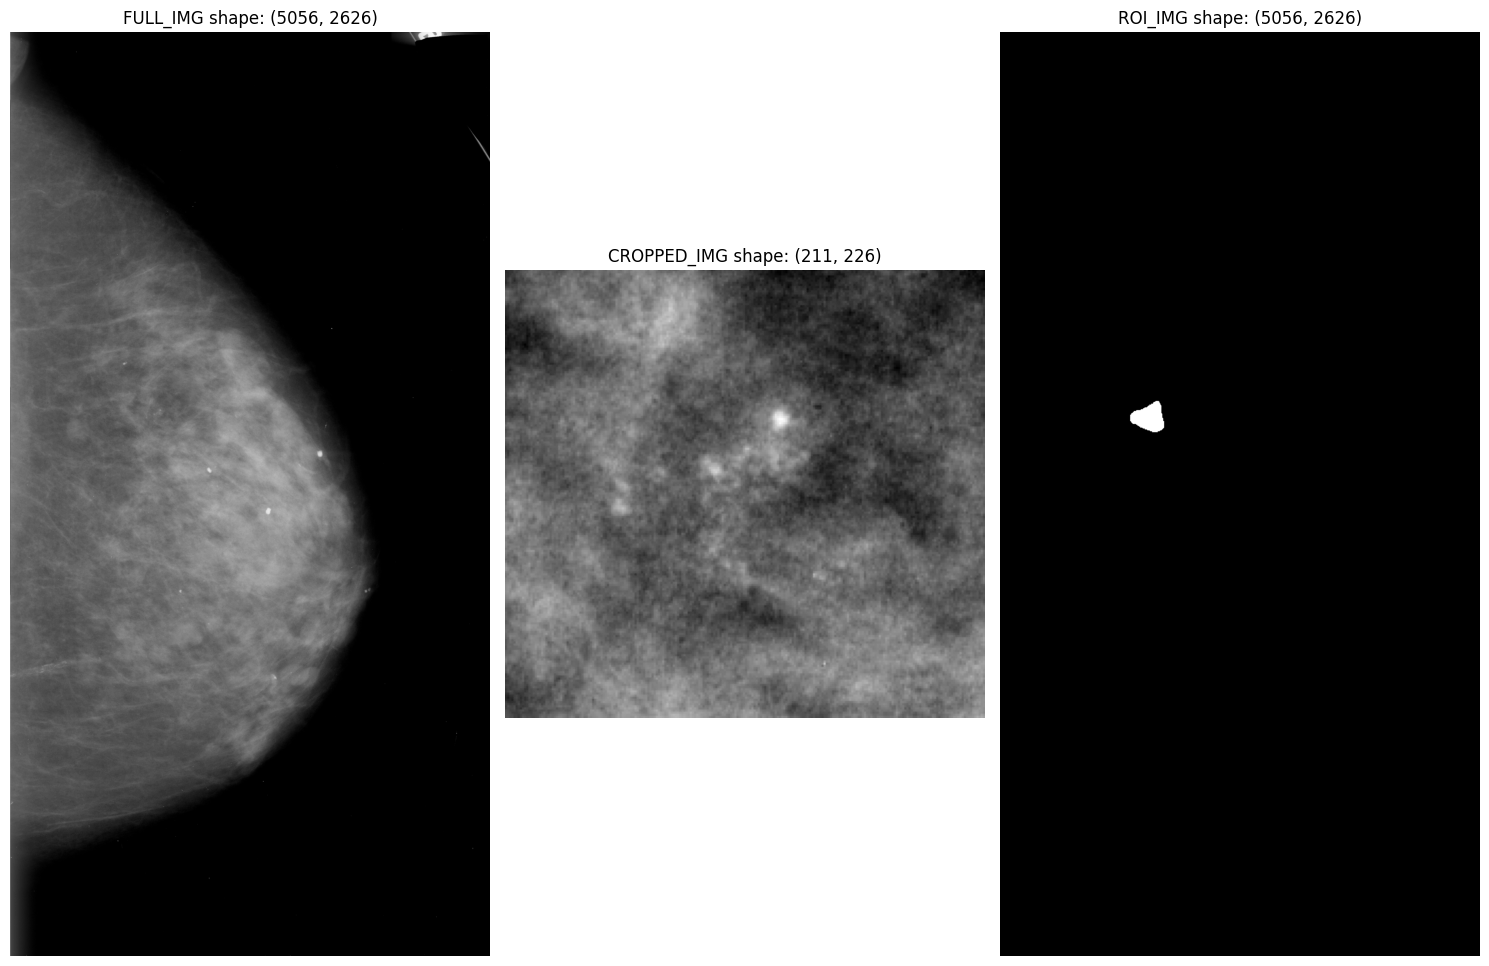

In [158]:
visualize_sample_from_df(merged_calc_dict, idx=0)

## **Preprocess FULL MAMMOGRAM images**

Show the original image before preprocessing:

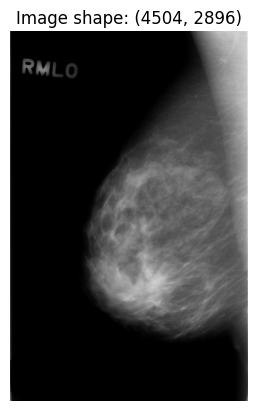

In [159]:
visualize_image_from_path(merged_mass_dict[FULL_IMG][0][5])

### **Contrast Adjustment Function**

The `adjust_contrast` function improves the visibility and clarity of mammogram images using **Gamma Correction** and **Histogram Equalization**. These techniques enhance subtle features in the image, aiding in analysis and classification.

---

#### **1. Gamma Correction**
Gamma correction applies a non-linear transformation to pixel intensities to enhance contrast:

$$
I_{\text{new}} = c \cdot \left(\frac{I}{255}\right)^\gamma
$$

- $I$: Original pixel intensity (range 0–255).
- $I_{\text{new}}$: Transformed pixel intensity.
- $c$: Scaling constant (commonly 1).
- $\gamma$: Gamma value:
  - $\gamma > 1$: Increases contrast by emphasizing high-intensity regions and reducing low-intensity ones.
  - $\gamma < 1$: Reduces contrast by brightening low-intensity regions.

**Gamma Correction** helps highlight key regions in the image, such as masses or calcifications in mammograms.

**Source**:  
[MathWorks Documentation on Gamma Correction: Gamma Correction Explanation](https://www.mathworks.com/help/images/gamma-correction.html)

---

#### **2. Histogram Equalization**

**Histogram Equalization** enhances the contrast of an image by redistributing pixel intensity values to achieve a uniform histogram.

**Input Histogram**  
The intensity values of an image range from $0$ to $L−1$, where $L$ is the total number of intensity levels (commonly 256 for 8-bit grayscale images). The histogram is defined as:

$$
h(I)=n_i
$$

Where:  
- $I$ is the intensity level.  
- $n_i$ is the number of pixels in the image with intensity $I$.

---

**Probability Distribution Function (PDF)**  
The PDF is the normalized histogram:

$$
P(I) = \frac{h(I)}{N}
$$

Where:  
- $N$: Total number of pixels.

---

**Cumulative Distribution Function (CDF)**  
Compute the cumulative sum of the PDF:

$$
C(I) = \sum_{j=0}^I P(j)
$$

Where:  
- $C(I)$: Cumulative probability for intensity $I$.

---

**Intensity Transformation**  
Map the original intensity values to new values:

$$
I_{\text{new}} = \text{round}((L - 1) \cdot C(I))
$$

Where:  
- $L$: Total number of intensity levels (e.g., 256 for 8-bit grayscale).  
- $\text{round}$: Ensures $I_{\text{new}}$ is an integer.

---

**Output Image**  
The result is an image with a uniform histogram, improving contrast by stretching the intensity range in low-contrast areas.

**Source**:  
[OpenCV Documentation on Histogram Equalization](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html)

---

**Output**:
The function rescales the image to an 8-bit integer format (0–255) for visualization and processing. This ensures consistent intensity distribution and highlights important features in mammogram images for downstream analysis.


In [160]:
def adjust_contrast(full_image, gamma=1.5):
    
    # Step 1: Gamma Correction
    gamma_corrected = adjust_gamma(full_image, gamma=gamma)  # Increase contrast
    
    # Step 2: Histogram Equalization
    equalized_image = equalize_hist(gamma_corrected)  # Normalize intensity values
    
    # Convert equalized image back to uint8 (original scale)
    equalized_image_uint8 = (equalized_image * 255).astype(np.uint8)
    
    return equalized_image_uint8

Example of contrast adjustment on mass image sample:

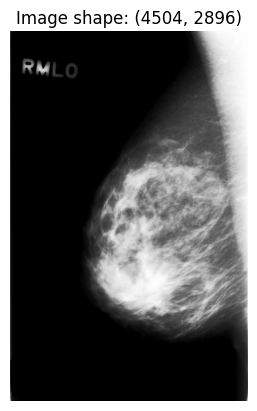

In [161]:
image = cv2.imread(merged_mass_dict[FULL_IMG][0][5], cv2.IMREAD_GRAYSCALE)
visualize_image(adjust_contrast(image))

### **Breast Orientation Determination**

We assumed that the bigger amount of "whiter pixels" will define breast orientation. 

So the function `determine_breast_orientation` determines the orientation of the breast in a mammography scan by analyzing the pixel intensity distribution. The goal is to identify whether the breast is positioned on the *left* or *right* side of the image.

**Purpose**:

This preprocessing step ensures that the orientation of mammogram images is standardized. By identifying the breast position, we can apply a consistent preprocessing step (e.g., flipping images so the breast is always on the left).

This approach is effective only for grayscale images where breast tissue has significantly higher intensity values compared to the background.

In [162]:
def determine_breast_orientation(image):
    """
    Determine the orientation of the breast on a mammography scan based on pixel intensity.
    """
    h, w = image.shape
    mid = w // 2

    # Sum pixel intensities in left and right regions
    left_sum = np.sum(image[:, :mid])
    right_sum = np.sum(image[:, mid:])

    # Determine orientation
    return "left" if left_sum > right_sum else "right"

Example of the mass sample that is positioned on the `right`:

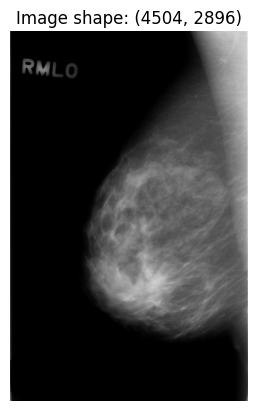

Breast is located on 'right' side.


In [163]:
visualize_image_from_path(merged_mass_dict[FULL_IMG][0][5])
image_right = cv2.imread(merged_mass_dict[FULL_IMG][0][5], cv2.IMREAD_GRAYSCALE)
print(f"Breast is located on '{determine_breast_orientation(image_right)}' side.")

Example of the mass sample that is positioned on the `left`:

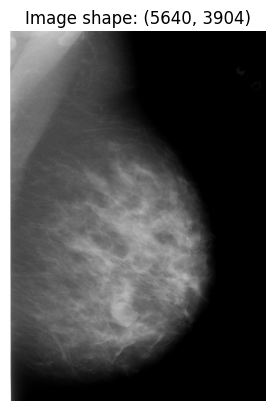

Breast is located on 'left' side.


In [164]:
visualize_image_from_path(merged_mass_dict[FULL_IMG][0][6])
image_left = cv2.imread(merged_mass_dict[FULL_IMG][0][6], cv2.IMREAD_GRAYSCALE)
print(f"Breast is located on '{determine_breast_orientation(image_left)}' side.")

### **Standardize Mammogram Orientation: Breast Positioned on the Left**

This process ensures that all mammogram images have a consistent orientation with the breast located on the left side of the image. Standardization is achieved by analyzing the pixel intensity distribution and flipping the image horizontally if the breast is detected on the right.

Breast is located on 'right' side.


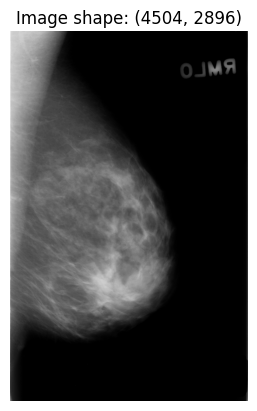

In [165]:
orientation = determine_breast_orientation(image_right)
print(f"Breast is located on '{orientation}' side.")
# Flip horizontally to make breast on the left
if orientation == "right":
    image_right_flipped = cv2.flip(image_right, 1)
visualize_image(image_right_flipped)

### **Corner Masking: Reducing Unnecessary Information**

In mammogram preprocessing, applying corner masks is a significant step aimed at reducing unnecessary or irrelevant information, such as textual annotations, labels, or artifacts that typically appear in the corners of X-ray images. After flipping the breast to the left orientation for consistency, we applied masks to the **top-right** and **bottom-right** corners. These areas often contain information irrelevant to the classification process.

This preprocessing step focuses the model's attention on the breast region, <u>potentially improving the model's performance</u> by reducing distractions and eliminating noise from the input data. By removing non-diagnostic elements, such as X-ray text, we ensure that the features learned by the model are primarily based on medically relevant structures, <u>enhancing the robustness and interpretability of the classification model</u>.

In [166]:
def apply_corner_masks(image, mask_ratio=0.2):
    """
    Apply masks to all corners of the image.
    """
    h, w = image.shape
    mask = np.ones((h, w), dtype=np.uint8)

    # Define mask dimensions
    mask_width = int(w * mask_ratio)
    mask_height = int(h * mask_ratio)

    # Mask the top-right corner
    mask[:mask_height, w - mask_width:] = 0
    # Mask the bottom-right corner
    mask[h - mask_height:, w - mask_width:] = 0

    # Apply the mask to the image
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    return masked_image

Image after applying corner mask:

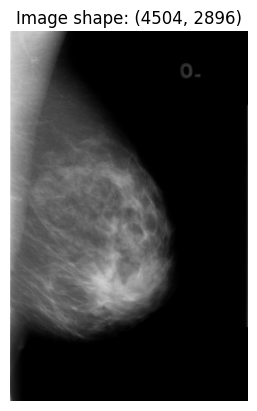

In [167]:
visualize_image(apply_corner_masks(image_right_flipped))

## **Image Preprocessing Structure: 3-Channel Input Images for Custom CNN**

The creation of 3-channel input images serves to enhance the information provided to a classification model, enabling it to learn from a richer set of features beyond the original grayscale image. By preprocessing mammogram images into a multi-channel format, we effectively augment the input with complementary information, potentially improving model robustness, accuracy, and the ability to generalize.

### **Image Preprocessing Pipeline**

| **Step**                      | **Description**                                                                                                                                                 |
|-------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Breast Orientation Standardization** | Determines if the breast is on the left or right side and flips the image horizontally if needed, ensuring consistent orientation across the dataset.       |
| **Corner Masking**            | Applies masks to remove unnecessary textual annotations or artifacts in the corners of the image, reducing noise and irrelevant information.                   |
| **Resizing**                  | Resizes the image to a consistent target size, ensuring uniformity in input dimensions for batch processing in CNNs.                                           |
| **Contrast Enhancement**      | Enhances image visibility by applying gamma correction and histogram equalization to highlight diagnostically relevant features.                              |
| **Heatmap Generation**        | Generates a grayscale heatmap by applying a color map to the normalized image, emphasizing intensity variations in the image.                                   |
| **Gradient Magnitude Calculation** | Computes the gradient magnitude using the Sobel operator, highlighting edges and textures that represent structural features in the image.                    |
| **Feature Combination**       | Combines the main preprocessed image, grayscale heatmap, and gradient magnitude into a 3-channel representation, providing complementary information.          |
| **Normalization**             | Normalizes the 3-channel image to the range [0, 1], ensuring consistent input values for the CNN and improving numerical stability during training.            |

### **Benefits of the Pipeline**

This preprocessing pipeline provides a richer representation of mammogram images, combining intensity, contrast, and structural information. It improves classification model robustness in several ways:
- **Feature Diversity**: By including complementary information from different channels, the model can learn more comprehensive patterns associated with benign and malignant cases.
- **Noise Reduction**: Corner masking and intensity normalization reduce irrelevant information, focusing the model's attention on diagnostically significant regions.
- **Enhanced Generalization**: Consistent preprocessing (e.g., flipping and resizing) minimizes variability, allowing the model to generalize better across unseen data.

Overall, this multi-channel approach ensures that the custom CNN receives a well-prepared and information-rich input, enhancing its ability to detect and classify abnormalities with higher accuracy and reliability.

### **Structure of `.npy` Files for Classification Models**

The `.npy` files used in our classification models are preprocessed 3-channel images, where each channel provides distinct and complementary information about the mammogram. This structured representation enhances the model's ability to differentiate between benign and malignant cases.


#### **Components of the `.npy` Files**

Each `.npy` file contains a 3-dimensional NumPy array with the following structure:
- **Shape**: $(H, W, 3)$, where $H$ and $W$ are the height and width of the image, and $3$ represents the three distinct channels.


#### **Channels**:

1. **Main Preprocessed Image (Channel 1)**:
   - This is the core grayscale image after applying contrast enhancement techniques such as gamma correction and histogram equalization.
   - Highlights diagnostically significant areas by improving intensity and contrast.

---

2. **Intensity Heatmap (Channel 2)**:
   - Derived by applying a colormap (e.g., Jet) to the normalized main image and then converting it to grayscale.
   - **Steps**:
     1. **Intensity Normalization**:
        Normalize pixel intensities to $[0, 1]$ using:
        $$
        I_{\text{norm}}(x, y) = \frac{I(x, y) - I_{\min}}{I_{\max} - I_{\min}}
        $$
        - $I(x, y)$: Original pixel intensity.
        - $I_{\min}, I_{\max}$: Minimum and maximum pixel intensities.
     2. **Colormap Transformation**:
        Map the normalized intensity values to RGB using a colormap $C(I_{\text{norm}})$, e.g., Jet colormap:
        $$
        C(I_{\text{norm}}) = \begin{bmatrix}
        R(I_{\text{norm}}) \\
        G(I_{\text{norm}}) \\
        B(I_{\text{norm}})
        \end{bmatrix}
        $$
        - $R, G, B$: Red, Green, and Blue channels.
     3. **Grayscale Conversion**:
        Convert the RGB heatmap to grayscale using:
        $$
        I_{\text{heatmap}}(x, y) = 0.2989 \cdot R + 0.5870 \cdot G + 0.1140 \cdot B
        $$
   - **Purpose**:
     - Enhances intensity variations, aiding in the identification of subtle features such as calcifications or masses.

---

3. **Weighted Combined Image (Channel 3)**:
   - A weighted combination of the main grayscale image and the gradient magnitude, focusing on edge and boundary details.
   - **Steps**:
     1. **Gradient Magnitude**:
        Compute gradients along $x$- and $y$-directions using Sobel filters:
        $$
        \text{gradient\_magnitude} = \sqrt{dx^2 + dy^2}
        $$
        - $dx, dy$: Gradients along $x$- and $y$-axes.
     2. **Weighted Combination**:
        Combine the main image and gradient magnitude:
        $$
        \text{combined} = 0.7 \cdot \text{image\_main} + 0.3 \cdot \text{gradient\_magnitude}
        $$
   - **Purpose**:
     - Combines intensity and structural details to highlight boundaries, edges, and textural features.

---

#### **Purpose of the `.npy` Structure**

This 3-channel format ensures that the classification model receives complementary information:
- **Channel 1** provides intensity and contrast details.
- **Channel 2** emphasizes regional variations and highlights areas of interest.
- **Channel 3** combines gradient and intensity information, focusing on structural and boundary details.

By combining these features into a single input, the `.npy` files allow the classification model to process diverse diagnostic cues in a unified manner, leading to improved accuracy and robustness in distinguishing between benign and malignant cases.

In [168]:
def get_3channel_image(image, target_size, mask_ratio=0.2):
    # Determine breast orientation
    orientation = determine_breast_orientation(image)
    # Flip horizontally to make breast on the left
    if orientation == "right":
        image = cv2.flip(image, 1)

    # Apply corner masks
    image_masked = apply_corner_masks(image, mask_ratio)

    # Resize the image
    image_resized = cv2.resize(image_masked, target_size, interpolation=cv2.INTER_AREA)

    # Contrast enhancement
    image_main = adjust_contrast(image_resized, gamma=1.5)
        
    # Normalize the intensity values to 0-255
    normalized_image = cv2.normalize(image_main, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    normalized_image = normalized_image.astype(np.uint8)
    
    # Apply a heatmap (e.g., Jet colormap) and convert to grayscale
    heatmap = cv2.applyColorMap(normalized_image, cv2.COLORMAP_JET)
    heatmap_grayscale = cv2.cvtColor(heatmap, cv2.COLOR_BGR2GRAY)  # Convert to single channel
        
    # Gradient magnitude (Sobel filters)
    dx = cv2.Sobel(image_main, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(image_main, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(dx**2 + dy**2).astype(np.uint8) 
    combined = cv2.addWeighted(image_main, 0.7, gradient_magnitude, 0.3, 0)

    # Stack the features into a 3-channel image
    combined_image = np.stack([image_main, heatmap_grayscale, combined], axis=-1)

    # Normalize to [0, 1]
    combined_image = combined_image / 255.0
    
    return combined_image

In [169]:
def preprocess_full_image(image_path, label, target_size=(224, 224), base_path="preprocessed_dataset", mask_ratio=0.2, is_originaly_full=True):
    """
    Preprocess a single image:
    1. Correct orientation.
    2. Apply corner masks.
    3. Resize, enhance, and generate edge/gradient channels.
    Saves the processed image to the appropriate folder.
    """
    try:  
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if image is None:
            raise ValueError(f"Image not found or unreadable: {image_path}")

        combined_image = get_3channel_image(image, target_size)

        # Use the original image path structure for naming
        unique_id = random.randint(10000, 99999)
        relative_path = os.path.relpath(image_path, start='/kaggle/input')
        relative_path_no_ext = relative_path.replace('/', '_').replace('\\', '_')
        output_path = os.path.join(base_path, f"{relative_path_no_ext}_{label}_preprocessed_{unique_id}.npy")
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        # Save the preprocessed image
        np.save(output_path, combined_image)
        return output_path  # Return output path for later retrieval

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return f"Error processing {image_path}: {e}"

In [170]:
def preprocess_full_sample(merged_dict, idx=0):
    # Define sample full image
    image_path = merged_dict[FULL_IMG][0][idx]
    image_label = merged_dict[FULL_IMG][1][idx]
    
    # Preprocess single full image
    preprocessed_image_3channel = preprocess_full_image(image_path, image_label)
    
    # Visualize sample of full image preprocessing
    visualize_image_from_path(image_path)
    visualize_3channel_image(preprocessed_image_3channel)

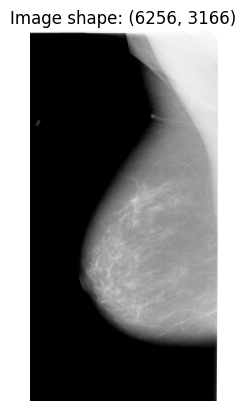

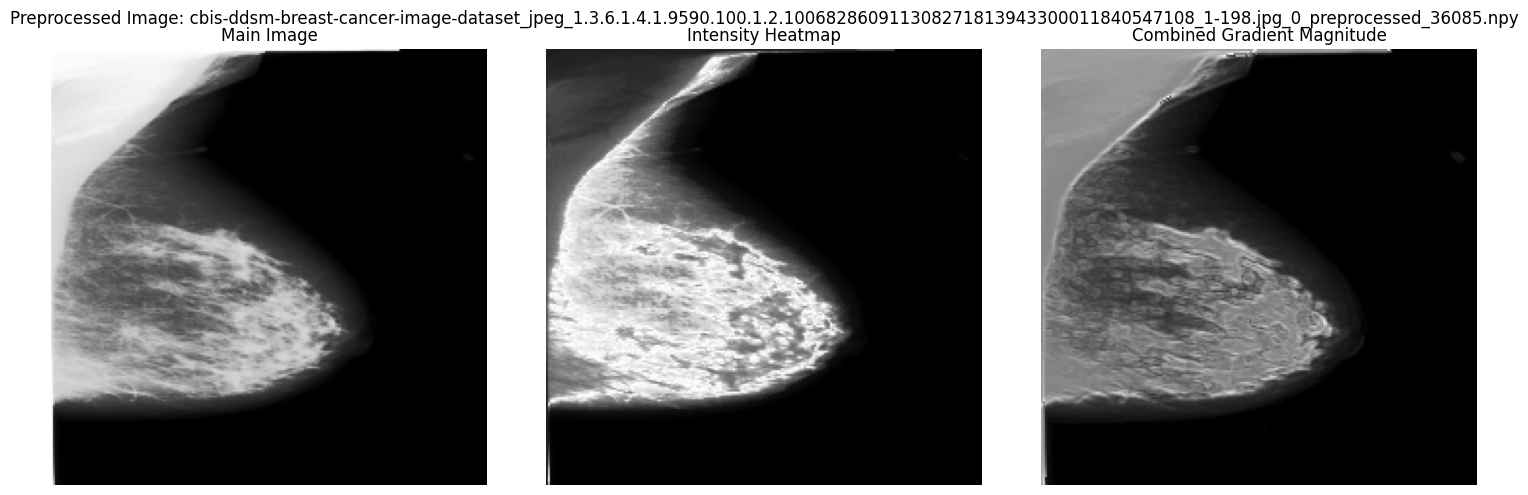

In [171]:
preprocess_full_sample(merged_mass_dict, idx=0)

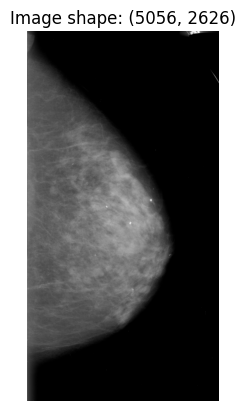

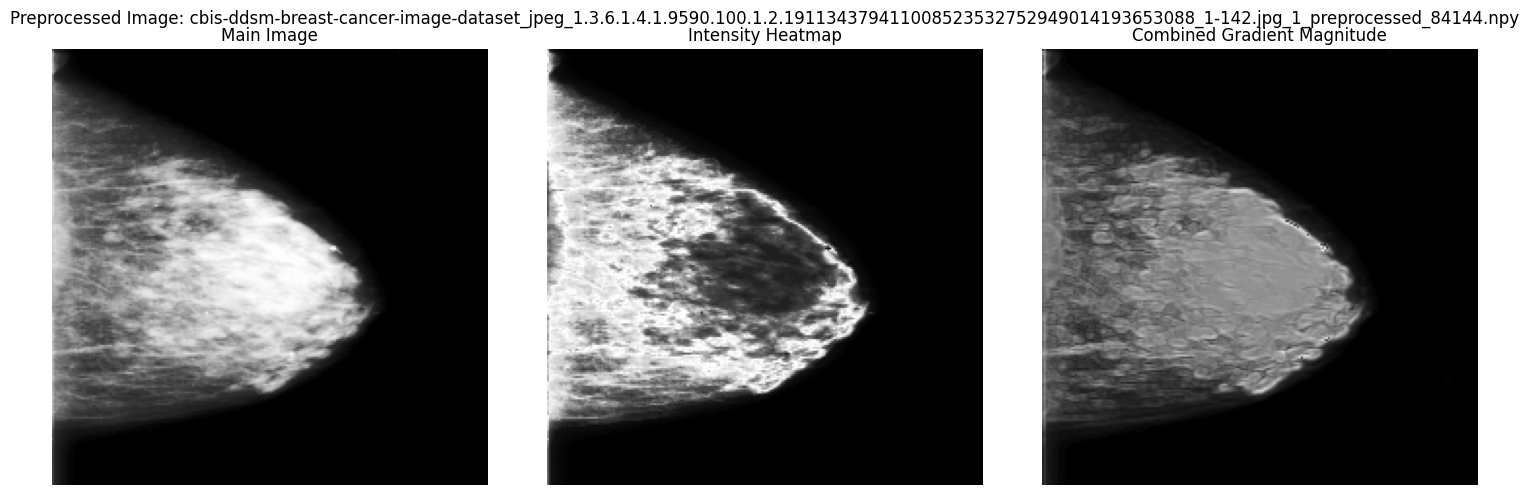

In [172]:
preprocess_full_sample(merged_calc_dict, idx=0)

### **Preprocess CROPPED images (preparation)**

We need to find out the the right position of the patch (cropped image) on the full mammogram image.

**Task**:
1. Find the scale of the patch
2. Verify the bounds of the patch (find the best similarity score).

In [173]:
def multi_scale_template_matching(img, template, scale_range, num_scales):
    """
    Perform multi-scale template matching using Canny edge detection, with handling for scale 0.0.

    Args:
        img (np.ndarray): Full image (grayscale).
        template (np.ndarray): Cropped image template (grayscale).
        scale_range (tuple): Range of scaling factors (e.g., (0.5, 2.0)).
        num_scales (int): Number of scales to explore.

    Returns:
        dict: Best match result (coordinates, score, scale, and matched template).
    """
    best_match = {"score": float("-inf"), "coordinates": None, "scale": None}
    best_template = None

    # Generate scaling factors
    if isinstance(scale_range, float):
        scales = [scale_range]
    else: 
        scales = np.linspace(scale_range[0], scale_range[1], num_scales)

    for scale in scales:
        # Skip scaling if scale is 0.0 (no resizing)
        if scale == 0.0:
            resized_template = template
        else:
            # Resize the template for the given scale
            resized_height = int(template.shape[0] * scale)
            resized_width = int(template.shape[1] * scale)

            # Skip invalid scales where resized dimensions are zero
            if resized_height <= 0 or resized_width <= 0:
                print(f"Skipping scale {scale} due to invalid dimensions: {resized_width}x{resized_height}")
                continue

            resized_template = cv2.resize(template, (resized_width, resized_height), interpolation=cv2.INTER_LINEAR)

        # Perform template matching using the edge-detected images
        result = cv2.matchTemplate(img, resized_template, cv2.TM_CCOEFF_NORMED)
        _, max_val, _, max_loc = cv2.minMaxLoc(result)

        # Update the best match if the current one is better
        if max_val > best_match["score"]:
            best_match["score"] = max_val
            best_match["coordinates"] = max_loc
            best_match["scale"] = scale
            best_template = resized_template

    best_match["matched_template"] = best_template
    return best_match["coordinates"], best_match["scale"], best_match["score"]

In [174]:
def detect_cropped_on_full(full_path, cropped_path, scale_range=1.0, gamma=1.5):
    # Load full and cropped images
    full_image = adjust_contrast(cv2.imread(full_path, cv2.IMREAD_GRAYSCALE), gamma=gamma)
    cropped_image = cv2.imread(cropped_path, cv2.IMREAD_GRAYSCALE)
    
    # Multi-scale template matching for refined detection
    coordinates, scale, score = multi_scale_template_matching(full_image, cropped_image, scale_range=scale_range, num_scales=20)
    print(f"The scale of cropped image on full mammogram: {scale}")
    print(f"The similarity score between patch and mathcing area: {score}")
    
    # Visualize the detected patch
    visualize_detected_patch(full_image, cropped_image, coordinates, scale)

In [175]:
def find_matching_for_image_range(merged_dict, max_idx=5, gamma=1.5):
    for i in range(0, max_idx):
        detect_cropped_on_full(merged_dict[FULL_IMG][0][i], merged_dict[CROPPED_IMG][0][i], scale_range=(1.0, 3.0), gamma=gamma)

In [176]:
def find_single_match(merged_dict, idx=0, gamma=1.25):
    # Check if works for single scale value (1.0): yeees
    detect_cropped_on_full(merged_dict[FULL_IMG][0][2], merged_dict[CROPPED_IMG][0][2], gamma=gamma)

The scale of cropped image on full mammogram: 1.0
The similarity score between patch and mathcing area: 0.9825000762939453


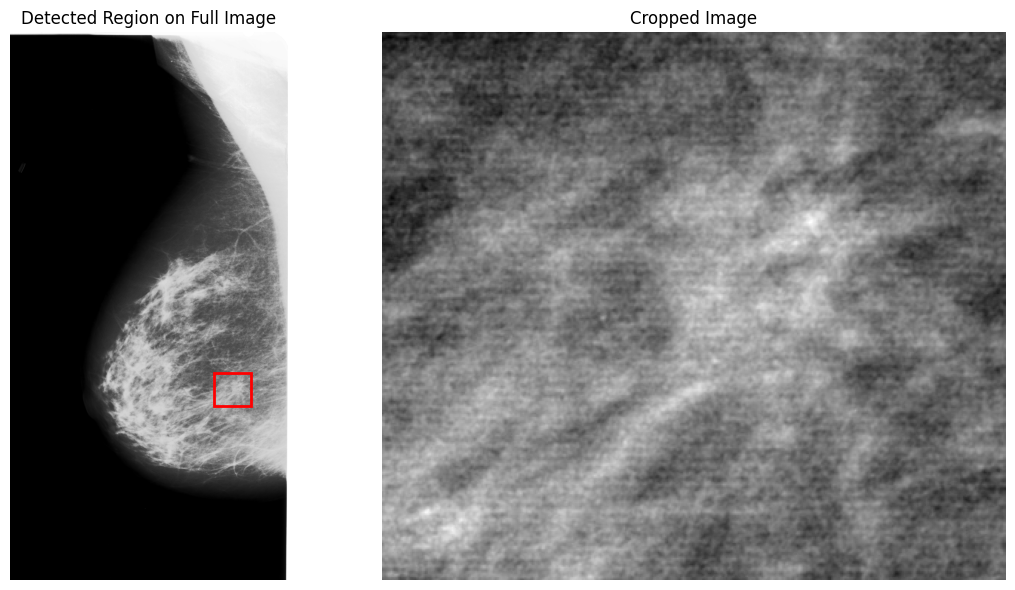

The scale of cropped image on full mammogram: 1.0
The similarity score between patch and mathcing area: 0.9221992492675781


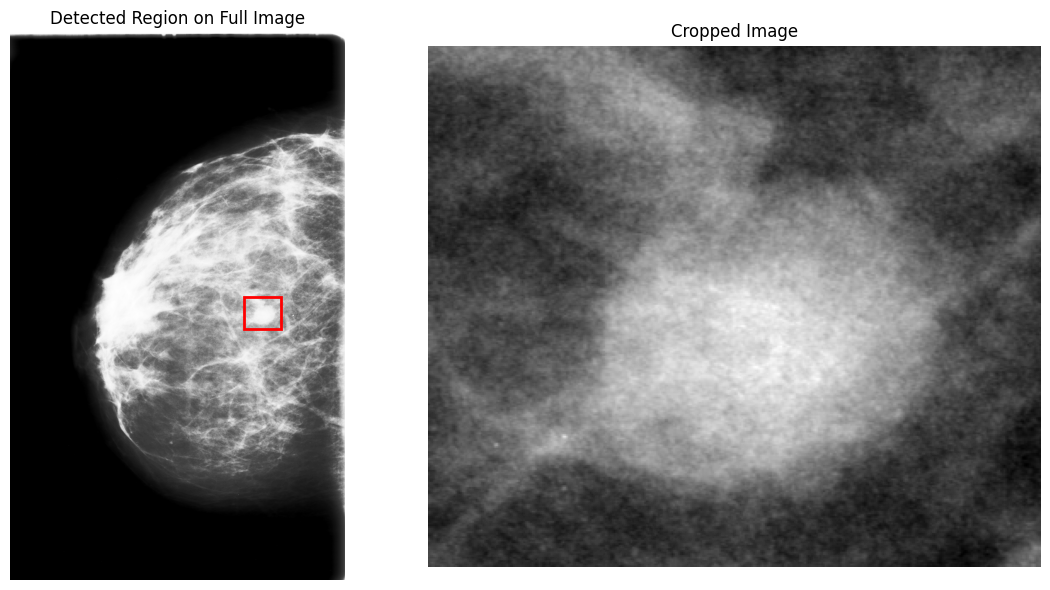

The scale of cropped image on full mammogram: 1.0
The similarity score between patch and mathcing area: 0.9850463271141052


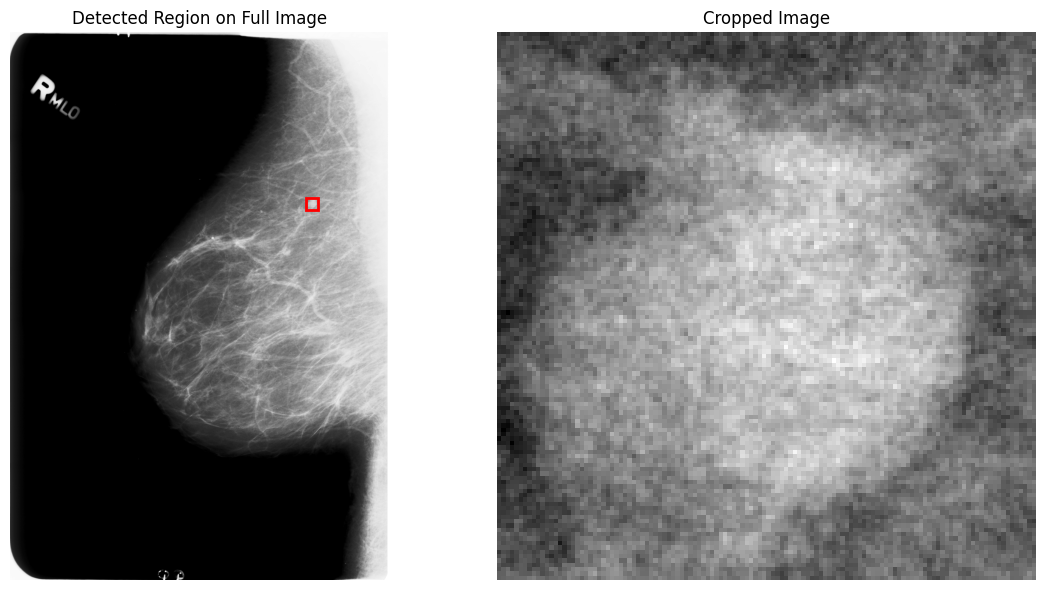

The scale of cropped image on full mammogram: 1.0
The similarity score between patch and mathcing area: 0.9218418002128601


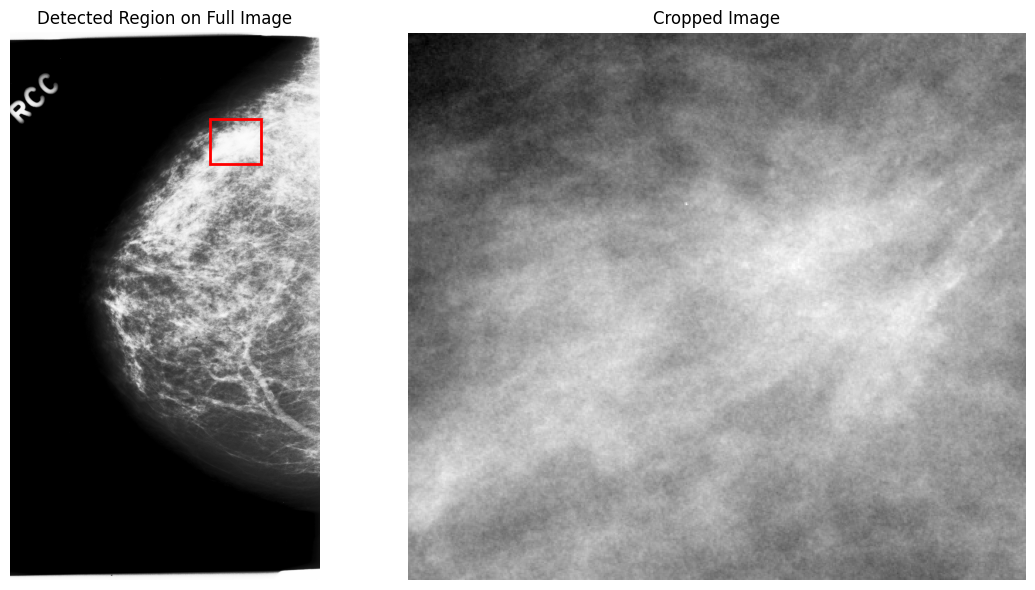

The scale of cropped image on full mammogram: 1.0
The similarity score between patch and mathcing area: 0.9218418002128601


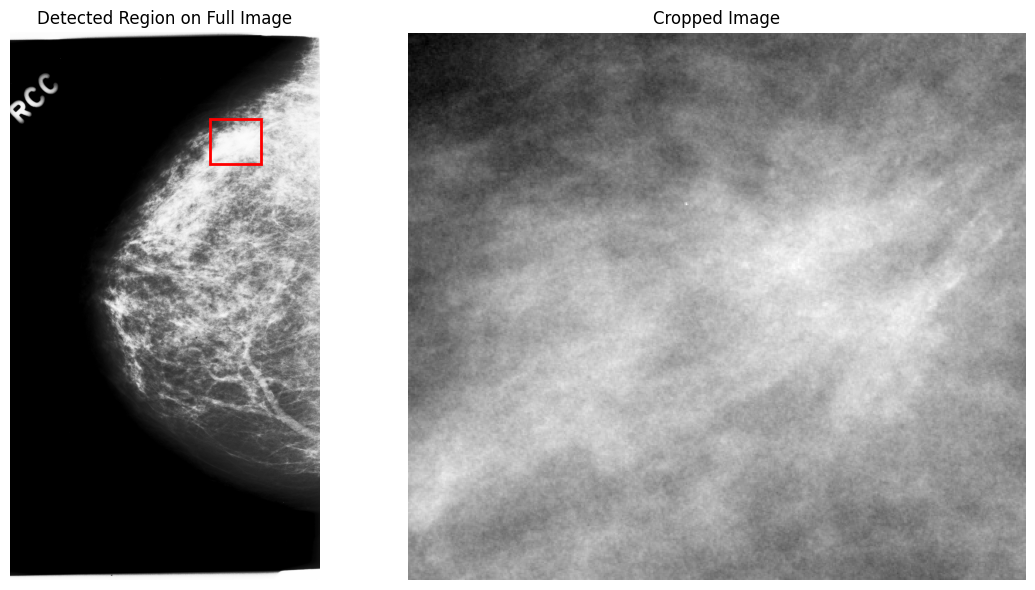

In [177]:
find_matching_for_image_range(merged_mass_dict)

The scale of cropped image on full mammogram: 1.0
The similarity score between patch and mathcing area: 0.9817215800285339


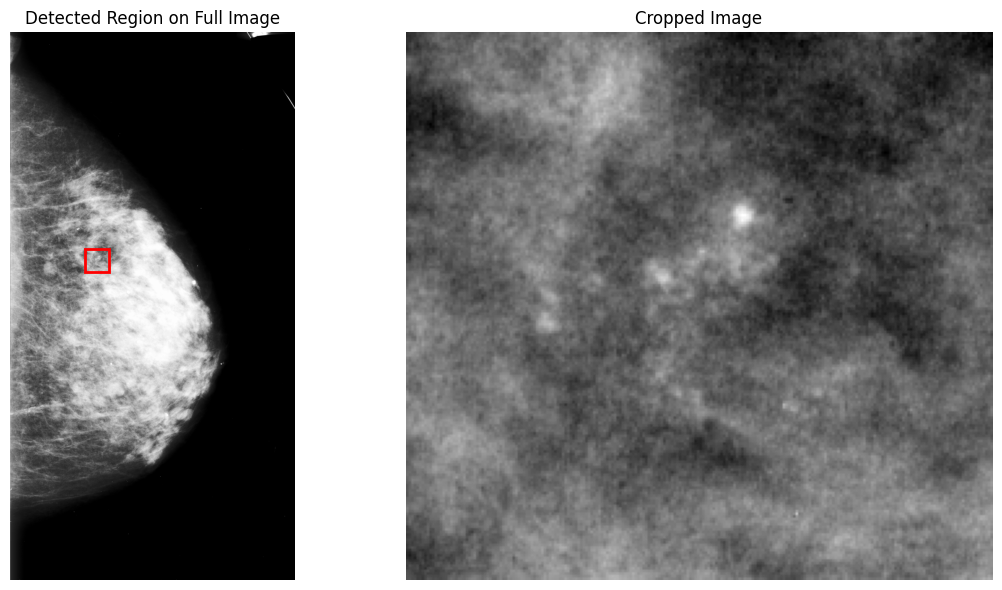

The scale of cropped image on full mammogram: 1.0
The similarity score between patch and mathcing area: 0.9817215800285339


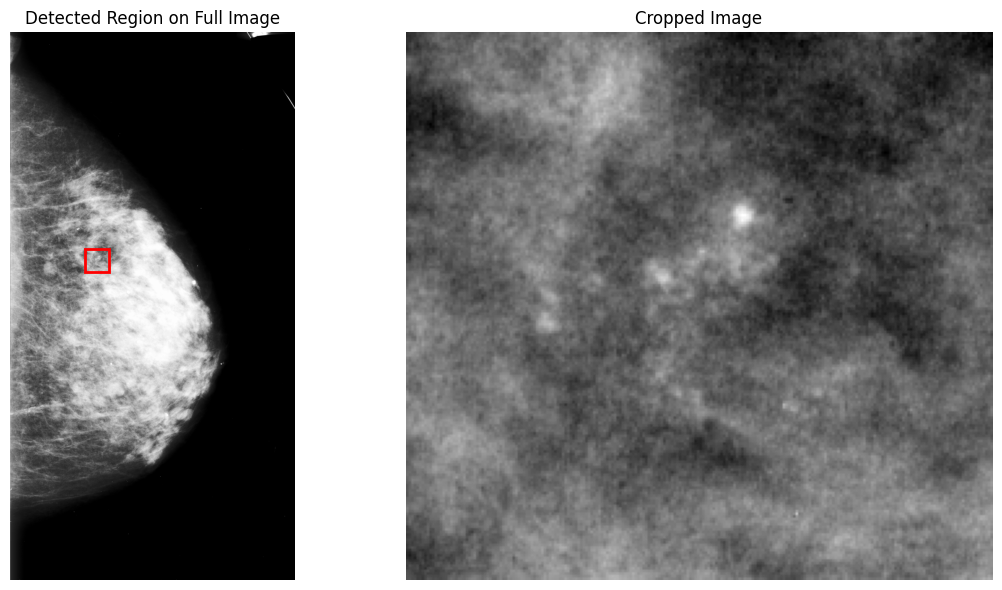

The scale of cropped image on full mammogram: 1.0
The similarity score between patch and mathcing area: 0.9633696675300598


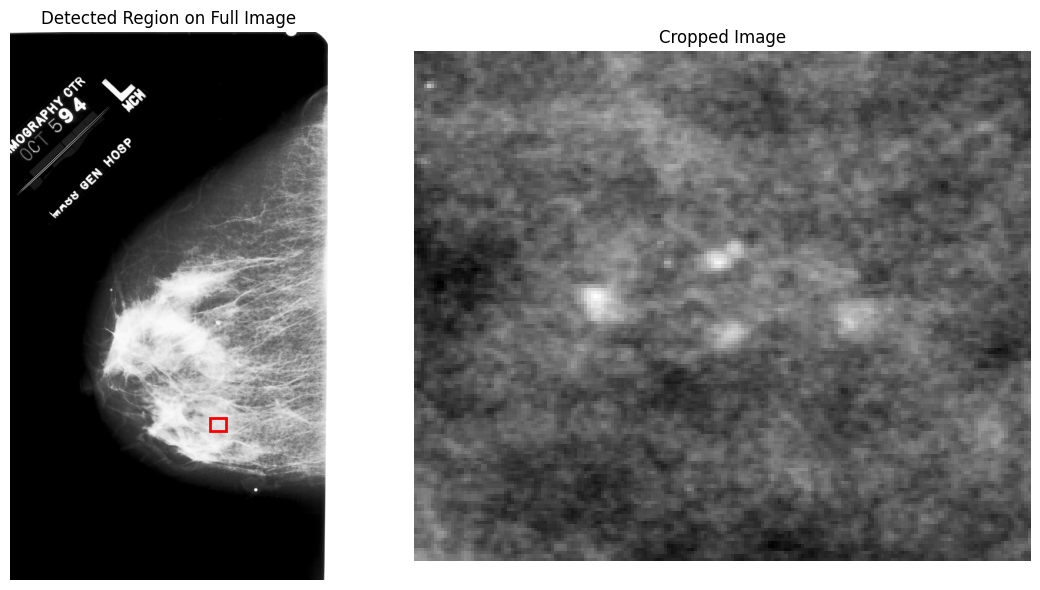

The scale of cropped image on full mammogram: 1.8421052631578947
The similarity score between patch and mathcing area: 0.8932605385780334


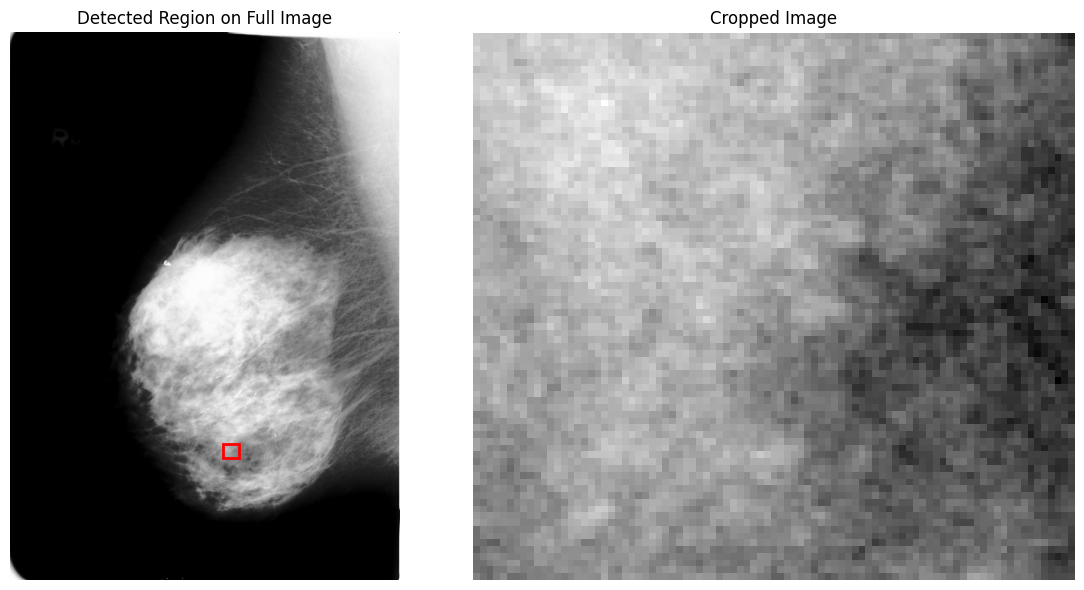

The scale of cropped image on full mammogram: 1.8421052631578947
The similarity score between patch and mathcing area: 0.8932605385780334


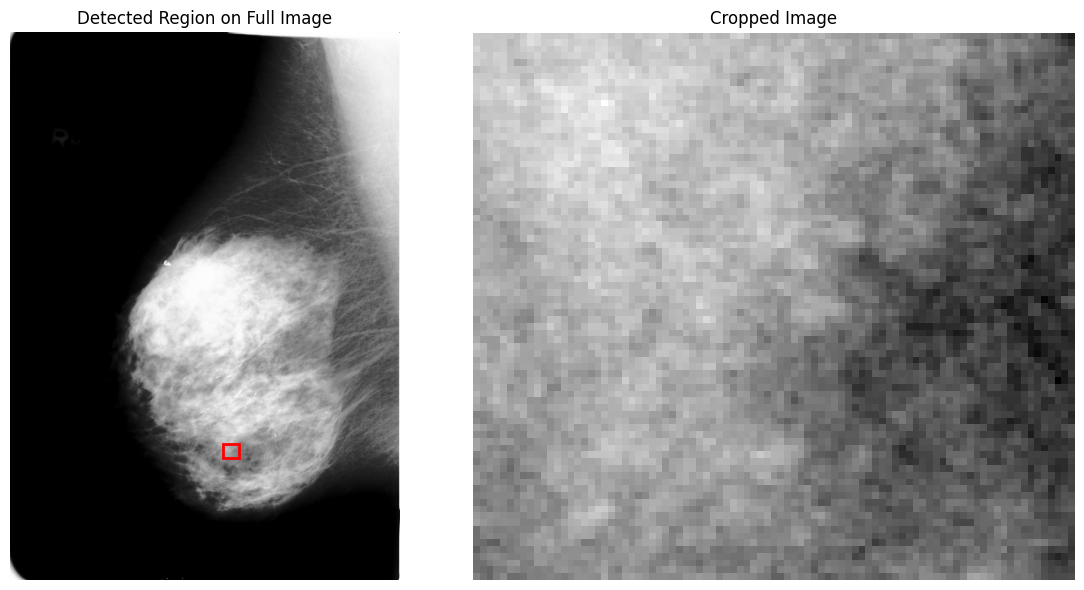

In [178]:
find_matching_for_image_range(merged_calc_dict)

The scale of cropped image on full mammogram: 1.0
The similarity score between patch and mathcing area: 0.9850587248802185


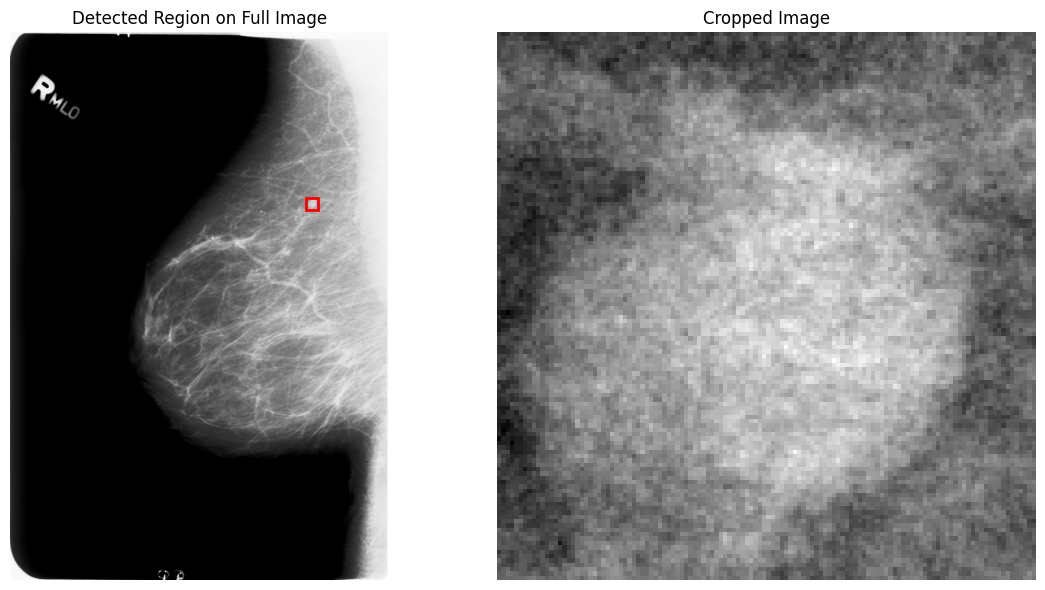

In [179]:
find_single_match(merged_mass_dict, idx=0, gamma=1.25)

The scale of cropped image on full mammogram: 1.0
The similarity score between patch and mathcing area: 0.9633696675300598


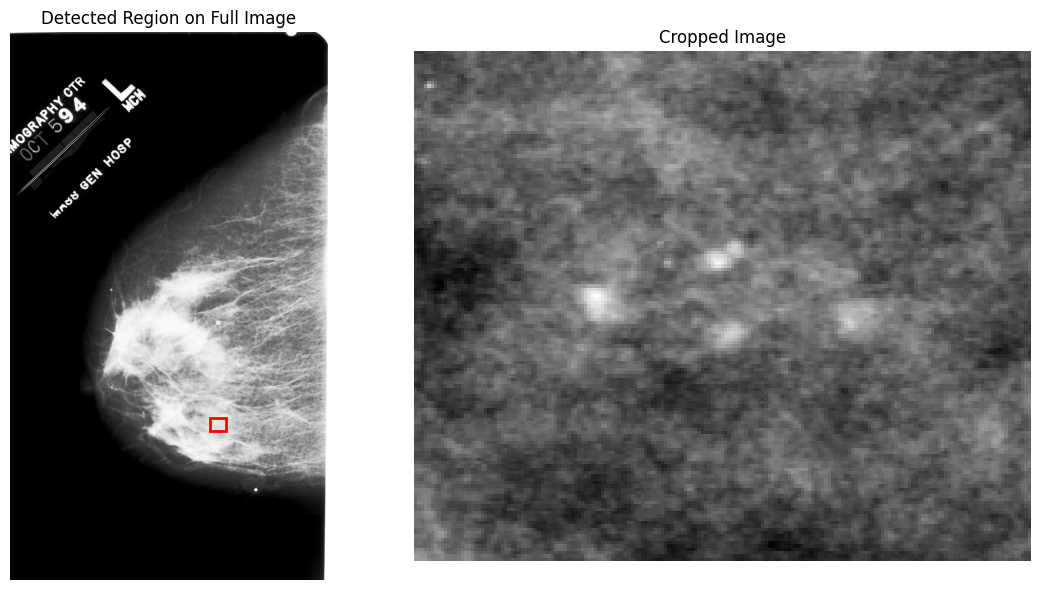

In [180]:
find_single_match(merged_calc_dict, idx=6, gamma=1.25)

By running some experiments this is obvious that the scale of the cropped image on full mammogram is `score=1.0`. So to overlay a cropped image over full we will use this scale.

In contrast adjustment we are using `gamma=1.5`. By running some experiments the `gamma=1.25` can show better result of similaity `score`, but not significant.

The **Mass** and **Calc** datasets in mammography are two distinct categories typically found in breast cancer screening datasets, such as the **CBIS-DDSM** dataset. Both datasets contain annotated images used for training and evaluation of breast cancer detection algorithms, but they focus on different types of abnormalities:

---

**1. Mass Dataset**
- **Definition**: A "mass" is a dense, solid lesion in breast tissue. It often appears as a region of varying shape, margins, and density that can indicate a suspicious area for breast cancer.
- **Appearance**:
  - Generally appears as a rounded, oval, or irregular **opaque structure** in mammography.
  - May have well-circumscribed, microlobulated, or spiculated (irregular/blurred) margins.
  - Densities can vary depending on tissue composition.
- **Characteristics**:
  - Masses are more **uniformly solid** structures.
  - They can be **benign** (e.g., cysts or fibroadenomas) or **malignant** (tumors).
  - Shape, border definition, and internal architecture are key diagnostic features.
- **Clinical Examples**: Fibroadenomas, cysts, and malignant tumors (e.g., invasive ductal carcinoma).
- **Annotation**:
  - Annotated as **regions of interest (ROI)** with bounding boxes and contours.
  - Typically labeled with "benign" or "malignant" to indicate their pathology.

---

**2. Calc Dataset**
- **Definition**: "Calc" refers to **calcifications**, which are small calcium deposits that form in the breast tissue. They appear as bright white specks or clusters on a mammogram.
- **Appearance**:
  - Calcifications are tiny, high-intensity specks or dots in the image.
  - May appear as **microcalcifications** (small, clustered) or **macrocalcifications** (larger, scattered).
  - Microcalcifications in **clusters** can be an early sign of breast cancer.
- **Characteristics**:
  - Calcifications are **not solid masses** but mineral deposits.
  - Often associated with **ductal carcinoma in situ (DCIS)**, an early form of breast cancer.
  - The **distribution** (clustered, scattered) and **morphology** (shape and size) are crucial diagnostic features.
- **Clinical Examples**: 
  - **Benign**: Associated with aging, fibrocystic changes, or previous injuries.
  - **Malignant**: Suspicious microcalcifications with irregular shape, fine linear patterns, or tight clusters.
- **Annotation**:
  - Labeled with regions highlighting the calcifications and often labeled as "benign" or "malignant."
  - Pathology annotations are often tied to the clusters' size, distribution, and shape.

---

**Key Differences Between Mass and Calc Datasets**
| **Attribute**            | **Mass Dataset**                          | **Calc Dataset**                         |
|---------------------------|-------------------------------------------|------------------------------------------|
| **Focus**                | Dense solid lesions (masses).            | Small calcium deposits (calcifications). |
| **Appearance**           | Rounded, oval, or irregular dense areas. | Bright white specks or clusters.         |
| **Diagnostic Importance**| Shape, border, and internal texture.     | Size, shape, and distribution patterns.  |
| **Clinical Examples**    | Tumors, cysts, fibroadenomas.            | Microcalcifications in DCIS, benign aging.|
| **Annotation**           | Regions with bounding boxes or contours. | Regions with calcified clusters.         |
| **Pathology**            | Often associated with invasive cancers.  | Commonly associated with early-stage cancers. |

---

**Use Cases in Machine Learning**
- **Mass Dataset**: Focused on detecting, segmenting, and classifying large, dense lesions. 
- **Calc Dataset**: Focused on detecting and characterizing tiny calcifications with high sensitivity.

In practice, training machine learning models on both datasets can improve the robustness of breast cancer detection systems since masses and calcifications represent different diagnostic challenges.

**We won't use the calcifications cause we have different classification task. It may not have a major impact on the classifictaion models training.**

**Step 3: Data Augmentation**

To proceed with <u>data augmentation</u> for *mass dataset* we will use the following <u>strategies</u>:

1. **Overlay ROIs:** Use ROI masks to augment full scans by overlaying them back on their corresponding positions.
2. **Augment ROI Placement:** Shift, scale, or rotate ROIs before overlaying them back onto the full scans.
3. **Overlay Cropped Images Randomly:** Treat cropped images as pseudo-ROIs and randomly overlay them onto the full scans for augmentation.

**3.1 Overlay ROIs**

In [181]:
def overlay_roi_on_full(full_path, roi_path, gamma=1.5, edge_thickness=2, edge_color=(255, 255, 255), enable_visualization=True):
    """
    Overlay a white-shaped mask on the full mammogram image, highlighting the ROI contour.
    """
    # Load the full image and ROI mask
    full_image = adjust_contrast(cv2.imread(full_path, cv2.IMREAD_GRAYSCALE), gamma=gamma)
    roi_mask = cv2.imread(roi_path, cv2.IMREAD_GRAYSCALE)

    # print(f"Full image shape: {full_image.shape}")
    # print(f"ROI shape: {roi_mask.shape}")

    # Ensure the ROI mask is binary (0 or 1)
    roi_mask_binary = (roi_mask > 0).astype(np.uint8)

    # Rescale the ROI mask to match full image dimensions (if needed)
    if roi_mask.shape != full_image.shape:
        roi_mask_binary = cv2.resize(roi_mask_binary, (full_image.shape[1], full_image.shape[0]), interpolation=cv2.INTER_NEAREST)
        # print("Resized ROI mask to match full image dimensions.")

    # Find contours in the resized ROI mask
    contours, _ = cv2.findContours(roi_mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        raise ValueError("No mass found in the ROI mask.")

    # Find the largest contour (assuming it's the mass)
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    # print(f"Mass bounding box: x={x}, y={y}, w={w}, h={h}")

    # Highlight the mass shape on the full image
    overlay_image = full_image.copy()

    # Draw the contour directly on the overlay image
    cv2.drawContours(overlay_image, [largest_contour], -1, 255, thickness=-1)  # Fill with white

    # Draw edges for better visualization
    cv2.drawContours(overlay_image, [largest_contour], -1, edge_color, thickness=edge_thickness)

    # Display the result
    if enable_visualization:
        plt.imshow(overlay_image, cmap='gray')
        plt.title("Accurate ROI Overlay on Full Mammogram")
        plt.axis("off")
        plt.show()

    coordinates = (x, y)

    return overlay_image, coordinates

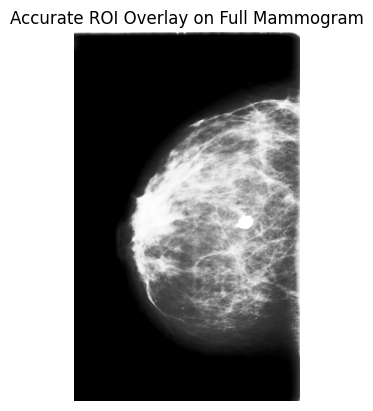

In [182]:
image, coordinates = overlay_roi_on_full(merged_mass_dict[FULL_IMG][0][1], merged_mass_dict[ROI_IMG][0][1], gamma=1.5)

**3.2 Augment ROI Placement**

In [183]:
def random_geometric_transform(roi_mask, shift_range=20, scale_range=(0.8, 1.2), rotation_range=15):
    """
    Apply random geometric transformations (shift, scale, rotate) to the ROI mask.
    
    Args:
        roi_mask (numpy.ndarray): The binary ROI mask.
        shift_range (int): Maximum number of pixels to shift the ROI in any direction.
        scale_range (tuple): Min and max scale factors.
        rotation_range (int): Maximum rotation angle in degrees.
    
    Returns:
        numpy.ndarray: Transformed ROI mask.
    """
    h, w = roi_mask.shape[:2]
    
    # Random shift
    tx = random.randint(-shift_range, shift_range)
    ty = random.randint(-shift_range, shift_range)
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    roi_translated = cv2.warpAffine(roi_mask, translation_matrix, (w, h))
    
    # Random scale
    scale_factor = random.uniform(*scale_range)
    scaled_width = int(w * scale_factor)
    scaled_height = int(h * scale_factor)
    roi_scaled = cv2.resize(roi_translated, (scaled_width, scaled_height), interpolation=cv2.INTER_NEAREST)
    
    # Center the scaled ROI within a padded mask of the original size
    padded_roi = np.zeros_like(roi_mask, dtype=np.uint8)
    start_x = max((roi_mask.shape[1] - roi_scaled.shape[1]) // 2, 0)
    start_y = max((roi_mask.shape[0] - roi_scaled.shape[0]) // 2, 0)
    end_x = start_x + roi_scaled.shape[1]
    end_y = start_y + roi_scaled.shape[0]
    
    # Ensure the scaled ROI fits within the padded area
    end_x = min(end_x, w)
    end_y = min(end_y, h)
    padded_roi[start_y:end_y, start_x:end_x] = roi_scaled[: end_y - start_y, : end_x - start_x]
    
    # Random rotation
    center = (w // 2, h // 2)
    angle = random.uniform(-rotation_range, rotation_range)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    roi_rotated = cv2.warpAffine(padded_roi, rotation_matrix, (w, h))
    
    return roi_rotated


def overlay_roi_on_full_with_transform(
    full_path, roi_path, gamma=1.5, edge_thickness=2, edge_color=(255, 255, 255),
    shift_range=20, scale_range=(0.8, 1.2), rotation_range=15, enable_visualization=True
):
    """
    Overlay a randomly transformed ROI mask on the full mammogram image.
    """
    # Load the full image and ROI mask
    full_image = adjust_contrast(cv2.imread(full_path, cv2.IMREAD_GRAYSCALE), gamma=gamma)
    roi_mask = cv2.imread(roi_path, cv2.IMREAD_GRAYSCALE)

    # print(f"Full image shape: {full_image.shape}")
    # print(f"ROI shape: {roi_mask.shape}")

    # Ensure the ROI mask is binary (0 or 1)
    roi_mask_binary = (roi_mask > 0).astype(np.uint8)

    # Rescale the ROI mask to match full image dimensions (if needed)
    if roi_mask.shape != full_image.shape:
        roi_mask_binary = cv2.resize(roi_mask_binary, (full_image.shape[1], full_image.shape[0]), interpolation=cv2.INTER_NEAREST)
        # print("Resized ROI mask to match full image dimensions.")

    # Apply random geometric transformations
    transformed_roi_mask = random_geometric_transform(roi_mask_binary, shift_range, scale_range, rotation_range)

    # Find contours in the transformed ROI mask
    contours, _ = cv2.findContours(transformed_roi_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        raise ValueError("No mass found in the transformed ROI mask.")

    # Find the largest contour (assuming it's the mass)
    largest_contour = max(contours, key=cv2.contourArea)

    # Highlight the transformed mass shape on the full image
    overlay_image = full_image.copy()

    # Draw the contour directly on the overlay image
    cv2.drawContours(overlay_image, [largest_contour], -1, 255, thickness=-1)  # Fill with white

    # Draw edges for better visualization
    cv2.drawContours(overlay_image, [largest_contour], -1, edge_color, thickness=edge_thickness)

    # Display the result
    if enable_visualization:
        plt.imshow(overlay_image, cmap='gray')
        plt.title("Transformed ROI Overlay on Full Mammogram")
        plt.axis("off")
        plt.show()

    return overlay_image

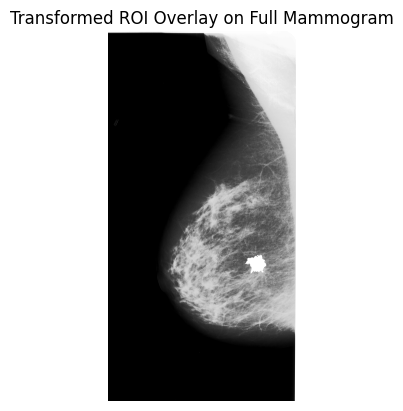

In [184]:
overlay_image = overlay_roi_on_full_with_transform(
    full_path=merged_mass_dict[FULL_IMG][0][0],
    roi_path=merged_mass_dict[ROI_IMG][0][0],
    gamma=1.5,                # Adjust contrast
    edge_thickness=3,         # Thickness of edge for contour
    shift_range=30,           # Maximum shift in pixels
    scale_range=(0.5, 1.5),   # Scaling range
    rotation_range=10         # Maximum rotation in degrees
)

**3.3 Overlay Cropped Images Randomly**

In [185]:
def overlay_cropped_on_full(
    full_path, 
    cropped_path, 
    coordinates, 
    gamma=1.5, 
    max_rotation_range=15, 
    max_scale_range=(0.8, 1.2), 
    max_shift_range=30, 
    alpha=0.8, 
    beta=0.2, 
    enable_visualization=True
):
    """
    Overlay a cropped image on the full mammogram based on approximate placement coordinates.

    Args:
        full_path (str): Path to the full mammogram image.
        cropped_path (str): Path to the cropped image.
        coordinates (tuple): Approximate (x, y) placement coordinates for the cropped image.
        gamma (float): Gamma value for contrast adjustment.
        max_rotation_range (int): Maximum rotation angle in degrees.
        max_scale_range (tuple): Min and max scaling factors.
        max_shift_range (int): Maximum shift range in pixels.
        alpha (float): Weight for the full mammogram image in blending.
        beta (float): Weight for the cropped image in blending.

    Returns:
        numpy.ndarray: Augmented image with the cropped patch placed at given coordinates.
    """
    # Load the full image and cropped image
    full_image = adjust_contrast(cv2.imread(full_path, cv2.IMREAD_GRAYSCALE), gamma=gamma)
    cropped_image = adjust_contrast(cv2.imread(cropped_path, cv2.IMREAD_GRAYSCALE), gamma)

    if full_image is None or cropped_image is None:
        raise ValueError("One of the input images couldn't be loaded.")

    # print(f"Full image shape: {full_image.shape}")
    # print(f"Cropped image shape: {cropped_image.shape}")

    # Random Transformations on Cropped Image
    # 1. Random Scaling
    scale_factor = random.uniform(*max_scale_range)
    new_width = int(cropped_image.shape[1] * scale_factor)
    new_height = int(cropped_image.shape[0] * scale_factor)
    cropped_image_rescaled = cv2.resize(cropped_image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # 2. Random Rotation
    center = (cropped_image_rescaled.shape[1] // 2, cropped_image_rescaled.shape[0] // 2)
    angle = random.uniform(-max_rotation_range, max_rotation_range)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    cropped_image_rotated = cv2.warpAffine(
        cropped_image_rescaled, 
        rotation_matrix, 
        (new_width, new_height), 
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=0
    )

    # Random Shifting
    shift_x = random.randint(-max_shift_range, max_shift_range)
    shift_y = random.randint(-max_shift_range, max_shift_range)

    # Update placement coordinates with random shifts
    x, y = coordinates
    x += shift_x
    y += shift_y

    # Ensure the cropped image fits within the bounds of the full image
    end_x = min(x + cropped_image_rotated.shape[1], full_image.shape[1])
    end_y = min(y + cropped_image_rotated.shape[0], full_image.shape[0])
    start_x = max(x, 0)
    start_y = max(y, 0)

    # Trim cropped image if it exceeds the boundaries
    trimmed_width = end_x - start_x
    trimmed_height = end_y - start_y
    cropped_image_trimmed = cropped_image_rotated[:trimmed_height, :trimmed_width]

    # Extract the target region in the full image for intensity matching
    target_region = full_image[start_y:end_y, start_x:end_x]

    # Match intensity of the cropped image to the target region
    target_mean = np.mean(target_region)
    cropped_mean = np.mean(cropped_image_trimmed)

    if cropped_mean > 0:  # Avoid division by zero
        cropped_image_trimmed = (cropped_image_trimmed.astype(np.float32) * (target_mean / cropped_mean)).clip(0, 255).astype(np.uint8)

    # Overlay the cropped image with blending
    blended_image = full_image.copy()
    blended_region = cv2.addWeighted(
        target_region, alpha, cropped_image_trimmed, beta, 0
    )
    blended_image[start_y:end_y, start_x:end_x] = blended_region

    # Display the result
    if enable_visualization:
        plt.imshow(blended_image, cmap='gray')
        plt.title("Transformed Cropped Overlay on Full Image")
        plt.axis("off")
        plt.show()

    return blended_image

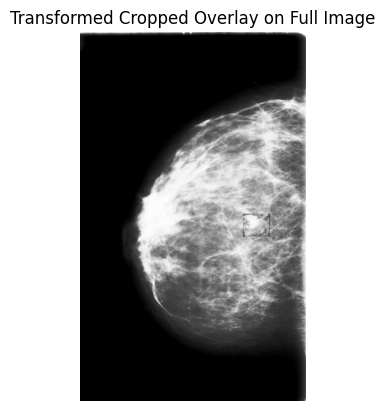

In [186]:
blended_image = overlay_cropped_on_full(
    full_path=merged_mass_dict[FULL_IMG][0][1],
    cropped_path=merged_mass_dict[CROPPED_IMG][0][1],
    gamma=1.5,  # Gamma for contrast adjustment
    coordinates=coordinates,  # Approximate (x, y) placement
    max_rotation_range=15,
    max_scale_range=(0.5, 1.5),
    max_shift_range=50,  # Allow shifting up to 50 pixels in any direction
    alpha=0.8,
    beta=0.2
)

**Step 4: Preprocess full dataset**

In [187]:
def preprocess_dataset(image_paths, labels, base_path, target_size=(224, 224), mask_ratio=0.2):
    """
    Preprocess a dataset sequentially:
    - Corrects orientation.
    - Applies corner masks.
    - Saves preprocessed images to their respective class folders.
    - Returns a list of paths to the preprocessed images.
    """
    print("Preprocessing dataset sequentially...")
    error_count = 0
    processed_files = []

    #print(f"Total images: {len(image_paths)}")
    assert len(image_paths) == len(labels), "Mismatch in the number of images and labels!"
    #print(f"Unique images: {len(set(image_paths))}")

    for image_path, label in tqdm(zip(image_paths, labels), total=len(image_paths)):
        #print(f"Processing image: {image_path}, Label: {label}")
        result = preprocess_full_image(image_path, label, target_size=target_size, base_path=base_path, mask_ratio=mask_ratio)
        if "Error" in result:
            error_count += 1
            print(result)
        else:
            processed_files.append(result)

    print(f"Preprocessed images saved in {base_path}")
    print(f"Number of errors during processing: {error_count}")
    print(f"Total processed files: {len(processed_files)}")

    return processed_files  # Return the list of processed file paths

In [188]:
base_path = "preprocessed_dataset"
target_size = (224, 224)

In [189]:
preprocess_dataset(
    image_paths=merged_mass_dict[FULL_IMG][0],
    labels=merged_mass_dict[FULL_IMG][1],
    base_path=base_path,
    target_size=target_size
)

print(f"Preprocessing complete! Preprocessed images saved in: {base_path}")

Preprocessing dataset sequentially...


100%|██████████| 4984/4984 [09:25<00:00,  8.81it/s]

Preprocessed images saved in preprocessed_dataset
Number of errors during processing: 0
Total processed files: 4984
Preprocessing complete! Preprocessed images saved in: preprocessed_dataset


In [190]:
def data_augmentation(merged_dict, output_dir, initial_idx=0):
    full_paths, full_labels = merged_dict[FULL_IMG]
    cropped_paths, cropped_labels = merged_dict[CROPPED_IMG]
    roi_paths, roi_labels = merged_dict[ROI_IMG]

    processed_files = []
    augmentation_tracker = []
    error_count = 0

    os.makedirs(output_dir, exist_ok=True)

    # Progress through all indices
    for idx in tqdm(range(initial_idx, len(full_paths)), desc="Augmentation Progress"):
        image_label = full_labels[idx]
        index_tracker = {"index": idx, "strategies": []}
        coordinates = None

        try:
            # ---- Strategy 1: Overlay ROI Mask ----
            strategy_1_start = time.time()
            strategy_1_status = {"strategy": "Strategy 1", "status": "Failed", "error": None, "time": None}
            try:
                overlay_image1, coordinates = overlay_roi_on_full(
                    full_path=full_paths[idx], 
                    roi_path=roi_paths[idx], 
                    gamma=1.5, 
                    enable_visualization=False
                )
                augmented_image1 = get_3channel_image(overlay_image1)
                output_path1 = os.path.join(output_dir, f"augmented_strategy1_{idx}.npy")
                np.save(output_path1, augmented_image1)
                processed_files.append(output_path1)
                strategy_1_status["status"] = "Success"
            except Exception as e:
                strategy_1_status["error"] = str(e)
                error_count += 1
            finally:
                strategy_1_status["time"] = round(time.time() - strategy_1_start, 3)
                index_tracker["strategies"].append(strategy_1_status)

            # ---- Strategy 2: Geometric Transform on ROI ----
            strategy_2_start = time.time()
            strategy_2_status = {"strategy": "Strategy 2", "status": "Failed", "error": None, "time": None}
            try:
                overlay_image2 = overlay_roi_on_full_with_transform(
                    full_path=full_paths[idx],
                    roi_path=roi_paths[idx],
                    gamma=1.5,
                    edge_thickness=3,
                    shift_range=30,
                    scale_range=(0.5, 1.5),
                    rotation_range=10, 
                    enable_visualization=False
                )
                augmented_image2 = get_3channel_image(overlay_image2)
                output_path2 = os.path.join(output_dir, f"augmented_strategy2_{idx}.npy")
                # np.save(output_path2, augmented_image2)
                processed_files.append(output_path2)
                strategy_2_status["status"] = "Success"
            except Exception as e:
                strategy_2_status["error"] = str(e)
                error_count += 1
            finally:
                strategy_2_status["time"] = round(time.time() - strategy_2_start, 3)
                index_tracker["strategies"].append(strategy_2_status)

            # ---- Strategy 3: Cropped Overlay with Shifting ----
            strategy_3_start = time.time()
            strategy_3_status = {"strategy": "Strategy 3", "status": "Skipped", "error": None, "time": None}
            if coordinates is not None:
                try:
                    blended_image = overlay_cropped_on_full(
                        full_path=full_paths[idx],
                        cropped_path=cropped_paths[idx],
                        gamma=1.5,
                        coordinates=coordinates,
                        max_rotation_range=15,
                        max_scale_range=(0.5, 1.5),
                        max_shift_range=50,
                        alpha=0.8,
                        beta=0.2, 
                        enable_visualization=False
                    )
                    augmented_image3 = get_3channel_image(blended_image)
                    output_path3 = os.path.join(output_dir, f"augmented_strategy3_{idx}.npy")
                    # np.save(output_path3, augmented_image3)
                    processed_files.append(output_path3)
                    strategy_3_status["status"] = "Success"
                except Exception as e:
                    strategy_3_status["error"] = str(e)
                    error_count += 1
                finally:
                    strategy_3_status["time"] = round(time.time() - strategy_3_start, 3)
                    index_tracker["strategies"].append(strategy_3_status)

            # Append tracking for this index
            augmentation_tracker.append(index_tracker)

        except Exception as e:
            print(f"Unexpected error at index {idx}: {str(e)}")
            error_count += 1

    print("\nData Augmentation Completed!")
    print(f"Total Errors: {error_count}")
    return processed_files, augmentation_tracker

In [191]:
output_dir = "/kaggle/working/augmented_dataset"
data_augmentation(merged_mass_dict, output_dir)

Augmentation Progress: 100%|██████████| 4984/4984 [2:19:27<00:00,  1.68s/it]  


In [ ]:
dataset_path = "/kaggle/input/augmented-dataset"
npy_file_paths = []

# Traverse the dataset directory and find all .npy files
for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".npy"):
            full_path = os.path.join(root, file)
            print(full_path)

In [ ]:
input_dir = "/kaggle/input/augmented-dataset"
output_dir = "/kaggle/working/orgazined-dataset"

# Define output directories for Benign and Malignant
benign_dir = os.path.join(output_dir, "Benign")
malignant_dir = os.path.join(output_dir, "Malignant")

# Create the output directories if they don't exist
os.makedirs(benign_dir, exist_ok=True)
os.makedirs(malignant_dir, exist_ok=True)

# Traverse the dataset directory and find all .npy files
for filename in os.listdir(input_dir):
    file_path = os.path.join(input_dir, filename)
    if filename.endswith(".npy"):
        try:
            image_idx = file_path[:-4].split("_")[-1]
            print(image_idx)
            label = merged_mass_dict[FULL_IMG][1][int(image_idx)]
            new_filename = f"{full_path[:-4]}_{label}.npy"
            # Define input and output paths
            if label == 1:
                dst = os.path.join(output_dir, "Malignant", new_filename)
            else:
                dst = os.path.join(output_dir, "Benign", new_filename)
        
            # Copy and rename the file
            shutil.move(full_path, dst)
        except Exception as e:
            print(f"Error processing file {file_name}: {str(e)}")